In [1]:
# All imports

from __future__ import print_function, division
import keras
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, multiply, GaussianNoise
from keras.layers import BatchNormalization, Activation, Embedding, ZeroPadding2D
from keras.layers import MaxPooling2D, merge
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras import losses
from keras.utils import to_categorical
import keras.backend as K
import matplotlib.pyplot as plt
import numpy as np
import glob


import numba
from numba import njit, prange

from keras import backend as K
from keras.layers import Layer

import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, ReduceLROnPlateau, Callback, TensorBoard
from keras import backend as keras
from skimage import util

from skimage.measure import label
from scipy.io import loadmat
from scipy.ndimage import zoom
#from scipy.misc import imresize
import pywt

import csv
import random
import time
%matplotlib inline  

from scipy import ndimage, misc

import pywt
#import hdf5storage

import scipy.io as sio
from skimage.filters import threshold_otsu

#import pylidc as pl
#from keras.backend.tensorflow_backend import set_session
import tensorflow as tf

import pywt
import numpy as np
#import pydicom
import matplotlib.pyplot as plt
import SimpleITK as sitk
import skimage.io as io
#from sklearn.decomposition import PCA
import collections, numpy
import warnings
from scipy import ndimage, misc
warnings.filterwarnings('ignore')

#import pymrt as mrt
#import pymrt.geometry
import ipyvolume as ipv
import copy


import os
import glob
import uuid
import numpy as np
from keras.utils import plot_model
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger


#from image_gen import ImageDataGenerator
#from load_data import loadDataMontgomery, loadDataJSRT
#from build_model import build_UNet2D_4L

import pandas as pd
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint


import tensorflow as tf
from keras.backend.tensorflow_backend import set_session

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
set_session(sess)



import numpy
import warnings
from keras.layers import Convolution3D, Input, merge, RepeatVector, Activation
from keras.models import Model
from keras.layers.advanced_activations import PReLU
from keras import activations, initializers, regularizers
from keras.engine import Layer, InputSpec
from keras.utils.conv_utils import conv_output_length
#from keras.utils.np_utils import conv_output_length
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import keras.backend as K
from keras.engine.topology import Layer
import functools
import tensorflow as tf
import pickle
import time

Using TensorFlow backend.


In [2]:
# [BLOCK 0] All the Models and helper functions are defined here 3D Unet model, Auto-Encoder and Shape-Projection

from scipy import ndimage, misc

neighbour_code_to_normals = [
    [[0, 0, 0]],
    [[0.125, 0.125, 0.125]],
    [[-0.125, -0.125, 0.125]],
    [[-0.25, -0.25, 0.0], [0.25, 0.25, -0.0]],
    [[0.125, -0.125, 0.125]],
    [[-0.25, -0.0, -0.25], [0.25, 0.0, 0.25]],
    [[0.125, -0.125, 0.125], [-0.125, -0.125, 0.125]],
    [[0.5, 0.0, -0.0], [0.25, 0.25, 0.25], [0.125, 0.125, 0.125]],
    [[-0.125, 0.125, 0.125]],
    [[0.125, 0.125, 0.125], [-0.125, 0.125, 0.125]],
    [[-0.25, 0.0, 0.25], [-0.25, 0.0, 0.25]],
    [[0.5, 0.0, 0.0], [-0.25, -0.25, 0.25], [-0.125, -0.125, 0.125]],
    [[0.25, -0.25, 0.0], [0.25, -0.25, 0.0]],
    [[0.5, 0.0, 0.0], [0.25, -0.25, 0.25], [-0.125, 0.125, -0.125]],
    [[-0.5, 0.0, 0.0], [-0.25, 0.25, 0.25], [-0.125, 0.125, 0.125]],
    [[0.5, 0.0, 0.0], [0.5, 0.0, 0.0]],
    [[0.125, -0.125, -0.125]],
    [[0.0, -0.25, -0.25], [0.0, 0.25, 0.25]],
    [[-0.125, -0.125, 0.125], [0.125, -0.125, -0.125]],
    [[0.0, -0.5, 0.0], [0.25, 0.25, 0.25], [0.125, 0.125, 0.125]],
    [[0.125, -0.125, 0.125], [0.125, -0.125, -0.125]],
    [[0.0, 0.0, -0.5], [0.25, 0.25, 0.25], [-0.125, -0.125, -0.125]],
    [[-0.125, -0.125, 0.125], [0.125, -0.125, 0.125], [0.125, -0.125, -0.125]],
    [[-0.125, -0.125, -0.125], [-0.25, -0.25, -0.25], [0.25, 0.25, 0.25], [0.125, 0.125, 0.125]],
    [[-0.125, 0.125, 0.125], [0.125, -0.125, -0.125]],
    [[0.0, -0.25, -0.25], [0.0, 0.25, 0.25], [-0.125, 0.125, 0.125]],
    [[-0.25, 0.0, 0.25], [-0.25, 0.0, 0.25], [0.125, -0.125, -0.125]],
    [[0.125, 0.125, 0.125], [0.375, 0.375, 0.375], [0.0, -0.25, 0.25], [-0.25, 0.0, 0.25]],
    [[0.125, -0.125, -0.125], [0.25, -0.25, 0.0], [0.25, -0.25, 0.0]],
    [[0.375, 0.375, 0.375], [0.0, 0.25, -0.25], [-0.125, -0.125, -0.125], [-0.25, 0.25, 0.0]],
    [[-0.5, 0.0, 0.0], [-0.125, -0.125, -0.125], [-0.25, -0.25, -0.25], [0.125, 0.125, 0.125]],
    [[-0.5, 0.0, 0.0], [-0.125, -0.125, -0.125], [-0.25, -0.25, -0.25]],
    [[0.125, -0.125, 0.125]],
    [[0.125, 0.125, 0.125], [0.125, -0.125, 0.125]],
    [[0.0, -0.25, 0.25], [0.0, 0.25, -0.25]],
    [[0.0, -0.5, 0.0], [0.125, 0.125, -0.125], [0.25, 0.25, -0.25]],
    [[0.125, -0.125, 0.125], [0.125, -0.125, 0.125]],
    [[0.125, -0.125, 0.125], [-0.25, -0.0, -0.25], [0.25, 0.0, 0.25]],
    [[0.0, -0.25, 0.25], [0.0, 0.25, -0.25], [0.125, -0.125, 0.125]],
    [[-0.375, -0.375, 0.375], [-0.0, 0.25, 0.25], [0.125, 0.125, -0.125], [-0.25, -0.0, -0.25]],
    [[-0.125, 0.125, 0.125], [0.125, -0.125, 0.125]],
    [[0.125, 0.125, 0.125], [0.125, -0.125, 0.125], [-0.125, 0.125, 0.125]],
    [[-0.0, 0.0, 0.5], [-0.25, -0.25, 0.25], [-0.125, -0.125, 0.125]],
    [[0.25, 0.25, -0.25], [0.25, 0.25, -0.25], [0.125, 0.125, -0.125], [-0.125, -0.125, 0.125]],
    [[0.125, -0.125, 0.125], [0.25, -0.25, 0.0], [0.25, -0.25, 0.0]],
    [[0.5, 0.0, 0.0], [0.25, -0.25, 0.25], [-0.125, 0.125, -0.125], [0.125, -0.125, 0.125]],
    [[0.0, 0.25, -0.25], [0.375, -0.375, -0.375], [-0.125, 0.125, 0.125], [0.25, 0.25, 0.0]],
    [[-0.5, 0.0, 0.0], [-0.25, -0.25, 0.25], [-0.125, -0.125, 0.125]],
    [[0.25, -0.25, 0.0], [-0.25, 0.25, 0.0]],
    [[0.0, 0.5, 0.0], [-0.25, 0.25, 0.25], [0.125, -0.125, -0.125]],
    [[0.0, 0.5, 0.0], [0.125, -0.125, 0.125], [-0.25, 0.25, -0.25]],
    [[0.0, 0.5, 0.0], [0.0, -0.5, 0.0]],
    [[0.25, -0.25, 0.0], [-0.25, 0.25, 0.0], [0.125, -0.125, 0.125]],
    [[-0.375, -0.375, -0.375], [-0.25, 0.0, 0.25], [-0.125, -0.125, -0.125], [-0.25, 0.25, 0.0]],
    [[0.125, 0.125, 0.125], [0.0, -0.5, 0.0], [-0.25, -0.25, -0.25], [-0.125, -0.125, -0.125]],
    [[0.0, -0.5, 0.0], [-0.25, -0.25, -0.25], [-0.125, -0.125, -0.125]],
    [[-0.125, 0.125, 0.125], [0.25, -0.25, 0.0], [-0.25, 0.25, 0.0]],
    [[0.0, 0.5, 0.0], [0.25, 0.25, -0.25], [-0.125, -0.125, 0.125], [-0.125, -0.125, 0.125]],
    [[-0.375, 0.375, -0.375], [-0.25, -0.25, 0.0], [-0.125, 0.125, -0.125], [-0.25, 0.0, 0.25]],
    [[0.0, 0.5, 0.0], [0.25, 0.25, -0.25], [-0.125, -0.125, 0.125]],
    [[0.25, -0.25, 0.0], [-0.25, 0.25, 0.0], [0.25, -0.25, 0.0], [0.25, -0.25, 0.0]],
    [[-0.25, -0.25, 0.0], [-0.25, -0.25, 0.0], [-0.125, -0.125, 0.125]],
    [[0.125, 0.125, 0.125], [-0.25, -0.25, 0.0], [-0.25, -0.25, 0.0]],
    [[-0.25, -0.25, 0.0], [-0.25, -0.25, 0.0]],
    [[-0.125, -0.125, 0.125]],
    [[0.125, 0.125, 0.125], [-0.125, -0.125, 0.125]],
    [[-0.125, -0.125, 0.125], [-0.125, -0.125, 0.125]],
    [[-0.125, -0.125, 0.125], [-0.25, -0.25, 0.0], [0.25, 0.25, -0.0]],
    [[0.0, -0.25, 0.25], [0.0, -0.25, 0.25]],
    [[0.0, 0.0, 0.5], [0.25, -0.25, 0.25], [0.125, -0.125, 0.125]],
    [[0.0, -0.25, 0.25], [0.0, -0.25, 0.25], [-0.125, -0.125, 0.125]],
    [[0.375, -0.375, 0.375], [0.0, -0.25, -0.25], [-0.125, 0.125, -0.125], [0.25, 0.25, 0.0]],
    [[-0.125, -0.125, 0.125], [-0.125, 0.125, 0.125]],
    [[0.125, 0.125, 0.125], [-0.125, -0.125, 0.125], [-0.125, 0.125, 0.125]],
    [[-0.125, -0.125, 0.125], [-0.25, 0.0, 0.25], [-0.25, 0.0, 0.25]],
    [[0.5, 0.0, 0.0], [-0.25, -0.25, 0.25], [-0.125, -0.125, 0.125], [-0.125, -0.125, 0.125]],
    [[-0.0, 0.5, 0.0], [-0.25, 0.25, -0.25], [0.125, -0.125, 0.125]],
    [[-0.25, 0.25, -0.25], [-0.25, 0.25, -0.25], [-0.125, 0.125, -0.125], [-0.125, 0.125, -0.125]],
    [[-0.25, 0.0, -0.25], [0.375, -0.375, -0.375], [0.0, 0.25, -0.25], [-0.125, 0.125, 0.125]],
    [[0.5, 0.0, 0.0], [-0.25, 0.25, -0.25], [0.125, -0.125, 0.125]],
    [[-0.25, 0.0, 0.25], [0.25, 0.0, -0.25]],
    [[-0.0, 0.0, 0.5], [-0.25, 0.25, 0.25], [-0.125, 0.125, 0.125]],
    [[-0.125, -0.125, 0.125], [-0.25, 0.0, 0.25], [0.25, 0.0, -0.25]],
    [[-0.25, -0.0, -0.25], [-0.375, 0.375, 0.375], [-0.25, -0.25, 0.0], [-0.125, 0.125, 0.125]],
    [[0.0, 0.0, -0.5], [0.25, 0.25, -0.25], [-0.125, -0.125, 0.125]],
    [[-0.0, 0.0, 0.5], [0.0, 0.0, 0.5]],
    [[0.125, 0.125, 0.125], [0.125, 0.125, 0.125], [0.25, 0.25, 0.25], [0.0, 0.0, 0.5]],
    [[0.125, 0.125, 0.125], [0.25, 0.25, 0.25], [0.0, 0.0, 0.5]],
    [[-0.25, 0.0, 0.25], [0.25, 0.0, -0.25], [-0.125, 0.125, 0.125]],
    [[-0.0, 0.0, 0.5], [0.25, -0.25, 0.25], [0.125, -0.125, 0.125], [0.125, -0.125, 0.125]],
    [[-0.25, 0.0, 0.25], [-0.25, 0.0, 0.25], [-0.25, 0.0, 0.25], [0.25, 0.0, -0.25]],
    [[0.125, -0.125, 0.125], [0.25, 0.0, 0.25], [0.25, 0.0, 0.25]],
    [[0.25, 0.0, 0.25], [-0.375, -0.375, 0.375], [-0.25, 0.25, 0.0], [-0.125, -0.125, 0.125]],
    [[-0.0, 0.0, 0.5], [0.25, -0.25, 0.25], [0.125, -0.125, 0.125]],
    [[0.125, 0.125, 0.125], [0.25, 0.0, 0.25], [0.25, 0.0, 0.25]],
    [[0.25, 0.0, 0.25], [0.25, 0.0, 0.25]],
    [[-0.125, -0.125, 0.125], [0.125, -0.125, 0.125]],
    [[0.125, 0.125, 0.125], [-0.125, -0.125, 0.125], [0.125, -0.125, 0.125]],
    [[-0.125, -0.125, 0.125], [0.0, -0.25, 0.25], [0.0, 0.25, -0.25]],
    [[0.0, -0.5, 0.0], [0.125, 0.125, -0.125], [0.25, 0.25, -0.25], [-0.125, -0.125, 0.125]],
    [[0.0, -0.25, 0.25], [0.0, -0.25, 0.25], [0.125, -0.125, 0.125]],
    [[0.0, 0.0, 0.5], [0.25, -0.25, 0.25], [0.125, -0.125, 0.125], [0.125, -0.125, 0.125]],
    [[0.0, -0.25, 0.25], [0.0, -0.25, 0.25], [0.0, -0.25, 0.25], [0.0, 0.25, -0.25]],
    [[0.0, 0.25, 0.25], [0.0, 0.25, 0.25], [0.125, -0.125, -0.125]],
    [[-0.125, 0.125, 0.125], [0.125, -0.125, 0.125], [-0.125, -0.125, 0.125]],
    [[-0.125, 0.125, 0.125], [0.125, -0.125, 0.125], [-0.125, -0.125, 0.125], [0.125, 0.125, 0.125]],
    [[-0.0, 0.0, 0.5], [-0.25, -0.25, 0.25], [-0.125, -0.125, 0.125], [-0.125, -0.125, 0.125]],
    [[0.125, 0.125, 0.125], [0.125, -0.125, 0.125], [0.125, -0.125, -0.125]],
    [[-0.0, 0.5, 0.0], [-0.25, 0.25, -0.25], [0.125, -0.125, 0.125], [0.125, -0.125, 0.125]],
    [[0.125, 0.125, 0.125], [-0.125, -0.125, 0.125], [0.125, -0.125, -0.125]],
    [[0.0, -0.25, -0.25], [0.0, 0.25, 0.25], [0.125, 0.125, 0.125]],
    [[0.125, 0.125, 0.125], [0.125, -0.125, -0.125]],
    [[0.5, 0.0, -0.0], [0.25, -0.25, -0.25], [0.125, -0.125, -0.125]],
    [[-0.25, 0.25, 0.25], [-0.125, 0.125, 0.125], [-0.25, 0.25, 0.25], [0.125, -0.125, -0.125]],
    [[0.375, -0.375, 0.375], [0.0, 0.25, 0.25], [-0.125, 0.125, -0.125], [-0.25, 0.0, 0.25]],
    [[0.0, -0.5, 0.0], [-0.25, 0.25, 0.25], [-0.125, 0.125, 0.125]],
    [[-0.375, -0.375, 0.375], [0.25, -0.25, 0.0], [0.0, 0.25, 0.25], [-0.125, -0.125, 0.125]],
    [[-0.125, 0.125, 0.125], [-0.25, 0.25, 0.25], [0.0, 0.0, 0.5]],
    [[0.125, 0.125, 0.125], [0.0, 0.25, 0.25], [0.0, 0.25, 0.25]],
    [[0.0, 0.25, 0.25], [0.0, 0.25, 0.25]],
    [[0.5, 0.0, -0.0], [0.25, 0.25, 0.25], [0.125, 0.125, 0.125], [0.125, 0.125, 0.125]],
    [[0.125, -0.125, 0.125], [-0.125, -0.125, 0.125], [0.125, 0.125, 0.125]],
    [[-0.25, -0.0, -0.25], [0.25, 0.0, 0.25], [0.125, 0.125, 0.125]],
    [[0.125, 0.125, 0.125], [0.125, -0.125, 0.125]],
    [[-0.25, -0.25, 0.0], [0.25, 0.25, -0.0], [0.125, 0.125, 0.125]],
    [[0.125, 0.125, 0.125], [-0.125, -0.125, 0.125]],
    [[0.125, 0.125, 0.125], [0.125, 0.125, 0.125]],
    [[0.125, 0.125, 0.125]],
    [[0.125, 0.125, 0.125]],
    [[0.125, 0.125, 0.125], [0.125, 0.125, 0.125]],
    [[0.125, 0.125, 0.125], [-0.125, -0.125, 0.125]],
    [[-0.25, -0.25, 0.0], [0.25, 0.25, -0.0], [0.125, 0.125, 0.125]],
    [[0.125, 0.125, 0.125], [0.125, -0.125, 0.125]],
    [[-0.25, -0.0, -0.25], [0.25, 0.0, 0.25], [0.125, 0.125, 0.125]],
    [[0.125, -0.125, 0.125], [-0.125, -0.125, 0.125], [0.125, 0.125, 0.125]],
    [[0.5, 0.0, -0.0], [0.25, 0.25, 0.25], [0.125, 0.125, 0.125], [0.125, 0.125, 0.125]],
    [[0.0, 0.25, 0.25], [0.0, 0.25, 0.25]],
    [[0.125, 0.125, 0.125], [0.0, 0.25, 0.25], [0.0, 0.25, 0.25]],
    [[-0.125, 0.125, 0.125], [-0.25, 0.25, 0.25], [0.0, 0.0, 0.5]],
    [[-0.375, -0.375, 0.375], [0.25, -0.25, 0.0], [0.0, 0.25, 0.25], [-0.125, -0.125, 0.125]],
    [[0.0, -0.5, 0.0], [-0.25, 0.25, 0.25], [-0.125, 0.125, 0.125]],
    [[0.375, -0.375, 0.375], [0.0, 0.25, 0.25], [-0.125, 0.125, -0.125], [-0.25, 0.0, 0.25]],
    [[-0.25, 0.25, 0.25], [-0.125, 0.125, 0.125], [-0.25, 0.25, 0.25], [0.125, -0.125, -0.125]],
    [[0.5, 0.0, -0.0], [0.25, -0.25, -0.25], [0.125, -0.125, -0.125]],
    [[0.125, 0.125, 0.125], [0.125, -0.125, -0.125]],
    [[0.0, -0.25, -0.25], [0.0, 0.25, 0.25], [0.125, 0.125, 0.125]],
    [[0.125, 0.125, 0.125], [-0.125, -0.125, 0.125], [0.125, -0.125, -0.125]],
    [[-0.0, 0.5, 0.0], [-0.25, 0.25, -0.25], [0.125, -0.125, 0.125], [0.125, -0.125, 0.125]],
    [[0.125, 0.125, 0.125], [0.125, -0.125, 0.125], [0.125, -0.125, -0.125]],
    [[-0.0, 0.0, 0.5], [-0.25, -0.25, 0.25], [-0.125, -0.125, 0.125], [-0.125, -0.125, 0.125]],
    [[-0.125, 0.125, 0.125], [0.125, -0.125, 0.125], [-0.125, -0.125, 0.125], [0.125, 0.125, 0.125]],
    [[-0.125, 0.125, 0.125], [0.125, -0.125, 0.125], [-0.125, -0.125, 0.125]],
    [[0.0, 0.25, 0.25], [0.0, 0.25, 0.25], [0.125, -0.125, -0.125]],
    [[0.0, -0.25, -0.25], [0.0, 0.25, 0.25], [0.0, 0.25, 0.25], [0.0, 0.25, 0.25]],
    [[0.0, 0.0, 0.5], [0.25, -0.25, 0.25], [0.125, -0.125, 0.125], [0.125, -0.125, 0.125]],
    [[0.0, -0.25, 0.25], [0.0, -0.25, 0.25], [0.125, -0.125, 0.125]],
    [[0.0, -0.5, 0.0], [0.125, 0.125, -0.125], [0.25, 0.25, -0.25], [-0.125, -0.125, 0.125]],
    [[-0.125, -0.125, 0.125], [0.0, -0.25, 0.25], [0.0, 0.25, -0.25]],
    [[0.125, 0.125, 0.125], [-0.125, -0.125, 0.125], [0.125, -0.125, 0.125]],
    [[-0.125, -0.125, 0.125], [0.125, -0.125, 0.125]],
    [[0.25, 0.0, 0.25], [0.25, 0.0, 0.25]],
    [[0.125, 0.125, 0.125], [0.25, 0.0, 0.25], [0.25, 0.0, 0.25]],
    [[-0.0, 0.0, 0.5], [0.25, -0.25, 0.25], [0.125, -0.125, 0.125]],
    [[0.25, 0.0, 0.25], [-0.375, -0.375, 0.375], [-0.25, 0.25, 0.0], [-0.125, -0.125, 0.125]],
    [[0.125, -0.125, 0.125], [0.25, 0.0, 0.25], [0.25, 0.0, 0.25]],
    [[-0.25, -0.0, -0.25], [0.25, 0.0, 0.25], [0.25, 0.0, 0.25], [0.25, 0.0, 0.25]],
    [[-0.0, 0.0, 0.5], [0.25, -0.25, 0.25], [0.125, -0.125, 0.125], [0.125, -0.125, 0.125]],
    [[-0.25, 0.0, 0.25], [0.25, 0.0, -0.25], [-0.125, 0.125, 0.125]],
    [[0.125, 0.125, 0.125], [0.25, 0.25, 0.25], [0.0, 0.0, 0.5]],
    [[0.125, 0.125, 0.125], [0.125, 0.125, 0.125], [0.25, 0.25, 0.25], [0.0, 0.0, 0.5]],
    [[-0.0, 0.0, 0.5], [0.0, 0.0, 0.5]],
    [[0.0, 0.0, -0.5], [0.25, 0.25, -0.25], [-0.125, -0.125, 0.125]],
    [[-0.25, -0.0, -0.25], [-0.375, 0.375, 0.375], [-0.25, -0.25, 0.0], [-0.125, 0.125, 0.125]],
    [[-0.125, -0.125, 0.125], [-0.25, 0.0, 0.25], [0.25, 0.0, -0.25]],
    [[-0.0, 0.0, 0.5], [-0.25, 0.25, 0.25], [-0.125, 0.125, 0.125]],
    [[-0.25, 0.0, 0.25], [0.25, 0.0, -0.25]],
    [[0.5, 0.0, 0.0], [-0.25, 0.25, -0.25], [0.125, -0.125, 0.125]],
    [[-0.25, 0.0, -0.25], [0.375, -0.375, -0.375], [0.0, 0.25, -0.25], [-0.125, 0.125, 0.125]],
    [[-0.25, 0.25, -0.25], [-0.25, 0.25, -0.25], [-0.125, 0.125, -0.125], [-0.125, 0.125, -0.125]],
    [[-0.0, 0.5, 0.0], [-0.25, 0.25, -0.25], [0.125, -0.125, 0.125]],
    [[0.5, 0.0, 0.0], [-0.25, -0.25, 0.25], [-0.125, -0.125, 0.125], [-0.125, -0.125, 0.125]],
    [[-0.125, -0.125, 0.125], [-0.25, 0.0, 0.25], [-0.25, 0.0, 0.25]],
    [[0.125, 0.125, 0.125], [-0.125, -0.125, 0.125], [-0.125, 0.125, 0.125]],
    [[-0.125, -0.125, 0.125], [-0.125, 0.125, 0.125]],
    [[0.375, -0.375, 0.375], [0.0, -0.25, -0.25], [-0.125, 0.125, -0.125], [0.25, 0.25, 0.0]],
    [[0.0, -0.25, 0.25], [0.0, -0.25, 0.25], [-0.125, -0.125, 0.125]],
    [[0.0, 0.0, 0.5], [0.25, -0.25, 0.25], [0.125, -0.125, 0.125]],
    [[0.0, -0.25, 0.25], [0.0, -0.25, 0.25]],
    [[-0.125, -0.125, 0.125], [-0.25, -0.25, 0.0], [0.25, 0.25, -0.0]],
    [[-0.125, -0.125, 0.125], [-0.125, -0.125, 0.125]],
    [[0.125, 0.125, 0.125], [-0.125, -0.125, 0.125]],
    [[-0.125, -0.125, 0.125]],
    [[-0.25, -0.25, 0.0], [-0.25, -0.25, 0.0]],
    [[0.125, 0.125, 0.125], [-0.25, -0.25, 0.0], [-0.25, -0.25, 0.0]],
    [[-0.25, -0.25, 0.0], [-0.25, -0.25, 0.0], [-0.125, -0.125, 0.125]],
    [[-0.25, -0.25, 0.0], [-0.25, -0.25, 0.0], [-0.25, -0.25, 0.0], [0.25, 0.25, -0.0]],
    [[0.0, 0.5, 0.0], [0.25, 0.25, -0.25], [-0.125, -0.125, 0.125]],
    [[-0.375, 0.375, -0.375], [-0.25, -0.25, 0.0], [-0.125, 0.125, -0.125], [-0.25, 0.0, 0.25]],
    [[0.0, 0.5, 0.0], [0.25, 0.25, -0.25], [-0.125, -0.125, 0.125], [-0.125, -0.125, 0.125]],
    [[-0.125, 0.125, 0.125], [0.25, -0.25, 0.0], [-0.25, 0.25, 0.0]],
    [[0.0, -0.5, 0.0], [-0.25, -0.25, -0.25], [-0.125, -0.125, -0.125]],
    [[0.125, 0.125, 0.125], [0.0, -0.5, 0.0], [-0.25, -0.25, -0.25], [-0.125, -0.125, -0.125]],
    [[-0.375, -0.375, -0.375], [-0.25, 0.0, 0.25], [-0.125, -0.125, -0.125], [-0.25, 0.25, 0.0]],
    [[0.25, -0.25, 0.0], [-0.25, 0.25, 0.0], [0.125, -0.125, 0.125]],
    [[0.0, 0.5, 0.0], [0.0, -0.5, 0.0]],
    [[0.0, 0.5, 0.0], [0.125, -0.125, 0.125], [-0.25, 0.25, -0.25]],
    [[0.0, 0.5, 0.0], [-0.25, 0.25, 0.25], [0.125, -0.125, -0.125]],
    [[0.25, -0.25, 0.0], [-0.25, 0.25, 0.0]],
    [[-0.5, 0.0, 0.0], [-0.25, -0.25, 0.25], [-0.125, -0.125, 0.125]],
    [[0.0, 0.25, -0.25], [0.375, -0.375, -0.375], [-0.125, 0.125, 0.125], [0.25, 0.25, 0.0]],
    [[0.5, 0.0, 0.0], [0.25, -0.25, 0.25], [-0.125, 0.125, -0.125], [0.125, -0.125, 0.125]],
    [[0.125, -0.125, 0.125], [0.25, -0.25, 0.0], [0.25, -0.25, 0.0]],
    [[0.25, 0.25, -0.25], [0.25, 0.25, -0.25], [0.125, 0.125, -0.125], [-0.125, -0.125, 0.125]],
    [[-0.0, 0.0, 0.5], [-0.25, -0.25, 0.25], [-0.125, -0.125, 0.125]],
    [[0.125, 0.125, 0.125], [0.125, -0.125, 0.125], [-0.125, 0.125, 0.125]],
    [[-0.125, 0.125, 0.125], [0.125, -0.125, 0.125]],
    [[-0.375, -0.375, 0.375], [-0.0, 0.25, 0.25], [0.125, 0.125, -0.125], [-0.25, -0.0, -0.25]],
    [[0.0, -0.25, 0.25], [0.0, 0.25, -0.25], [0.125, -0.125, 0.125]],
    [[0.125, -0.125, 0.125], [-0.25, -0.0, -0.25], [0.25, 0.0, 0.25]],
    [[0.125, -0.125, 0.125], [0.125, -0.125, 0.125]],
    [[0.0, -0.5, 0.0], [0.125, 0.125, -0.125], [0.25, 0.25, -0.25]],
    [[0.0, -0.25, 0.25], [0.0, 0.25, -0.25]],
    [[0.125, 0.125, 0.125], [0.125, -0.125, 0.125]],
    [[0.125, -0.125, 0.125]],
    [[-0.5, 0.0, 0.0], [-0.125, -0.125, -0.125], [-0.25, -0.25, -0.25]],
    [[-0.5, 0.0, 0.0], [-0.125, -0.125, -0.125], [-0.25, -0.25, -0.25], [0.125, 0.125, 0.125]],
    [[0.375, 0.375, 0.375], [0.0, 0.25, -0.25], [-0.125, -0.125, -0.125], [-0.25, 0.25, 0.0]],
    [[0.125, -0.125, -0.125], [0.25, -0.25, 0.0], [0.25, -0.25, 0.0]],
    [[0.125, 0.125, 0.125], [0.375, 0.375, 0.375], [0.0, -0.25, 0.25], [-0.25, 0.0, 0.25]],
    [[-0.25, 0.0, 0.25], [-0.25, 0.0, 0.25], [0.125, -0.125, -0.125]],
    [[0.0, -0.25, -0.25], [0.0, 0.25, 0.25], [-0.125, 0.125, 0.125]],
    [[-0.125, 0.125, 0.125], [0.125, -0.125, -0.125]],
    [[-0.125, -0.125, -0.125], [-0.25, -0.25, -0.25], [0.25, 0.25, 0.25], [0.125, 0.125, 0.125]],
    [[-0.125, -0.125, 0.125], [0.125, -0.125, 0.125], [0.125, -0.125, -0.125]],
    [[0.0, 0.0, -0.5], [0.25, 0.25, 0.25], [-0.125, -0.125, -0.125]],
    [[0.125, -0.125, 0.125], [0.125, -0.125, -0.125]],
    [[0.0, -0.5, 0.0], [0.25, 0.25, 0.25], [0.125, 0.125, 0.125]],
    [[-0.125, -0.125, 0.125], [0.125, -0.125, -0.125]],
    [[0.0, -0.25, -0.25], [0.0, 0.25, 0.25]],
    [[0.125, -0.125, -0.125]],
    [[0.5, 0.0, 0.0], [0.5, 0.0, 0.0]],
    [[-0.5, 0.0, 0.0], [-0.25, 0.25, 0.25], [-0.125, 0.125, 0.125]],
    [[0.5, 0.0, 0.0], [0.25, -0.25, 0.25], [-0.125, 0.125, -0.125]],
    [[0.25, -0.25, 0.0], [0.25, -0.25, 0.0]],
    [[0.5, 0.0, 0.0], [-0.25, -0.25, 0.25], [-0.125, -0.125, 0.125]],
    [[-0.25, 0.0, 0.25], [-0.25, 0.0, 0.25]],
    [[0.125, 0.125, 0.125], [-0.125, 0.125, 0.125]],
    [[-0.125, 0.125, 0.125]],
    [[0.5, 0.0, -0.0], [0.25, 0.25, 0.25], [0.125, 0.125, 0.125]],
    [[0.125, -0.125, 0.125], [-0.125, -0.125, 0.125]],
    [[-0.25, -0.0, -0.25], [0.25, 0.0, 0.25]],
    [[0.125, -0.125, 0.125]],
    [[-0.25, -0.25, 0.0], [0.25, 0.25, -0.0]],
    [[-0.125, -0.125, 0.125]],
    [[0.125, 0.125, 0.125]],
    [[0, 0, 0]]]

def segnet(
        input_shape,
        n_labels,
        kernel=3,
        pool_size=(2, 2),
        output_mode="softmax"):
    # encoder
    inputs = Input(shape=input_shape)

    conv_1 = Convolution2D(64, (kernel, kernel), padding="same")(inputs)
    conv_1 = BatchNormalization()(conv_1)
    conv_1 = Activation("relu")(conv_1)
    conv_2 = Convolution2D(64, (kernel, kernel), padding="same")(conv_1)
    conv_2 = BatchNormalization()(conv_2)
    conv_2 = Activation("relu")(conv_2)

    pool_1, mask_1 = MaxPoolingWithArgmax2D(pool_size)(conv_2)

    conv_3 = Convolution2D(128, (kernel, kernel), padding="same")(pool_1)
    conv_3 = BatchNormalization()(conv_3)
    conv_3 = Activation("relu")(conv_3)
    conv_4 = Convolution2D(128, (kernel, kernel), padding="same")(conv_3)
    conv_4 = BatchNormalization()(conv_4)
    conv_4 = Activation("relu")(conv_4)

    pool_2, mask_2 = MaxPoolingWithArgmax2D(pool_size)(conv_4)

    conv_5 = Convolution2D(256, (kernel, kernel), padding="same")(pool_2)
    conv_5 = BatchNormalization()(conv_5)
    conv_5 = Activation("relu")(conv_5)
    conv_6 = Convolution2D(256, (kernel, kernel), padding="same")(conv_5)
    conv_6 = BatchNormalization()(conv_6)
    conv_6 = Activation("relu")(conv_6)
    conv_7 = Convolution2D(256, (kernel, kernel), padding="same")(conv_6)
    conv_7 = BatchNormalization()(conv_7)
    conv_7 = Activation("relu")(conv_7)

    pool_3, mask_3 = MaxPoolingWithArgmax2D(pool_size)(conv_7)

    conv_8 = Convolution2D(512, (kernel, kernel), padding="same")(pool_3)
    conv_8 = BatchNormalization()(conv_8)
    conv_8 = Activation("relu")(conv_8)
    conv_9 = Convolution2D(512, (kernel, kernel), padding="same")(conv_8)
    conv_9 = BatchNormalization()(conv_9)
    conv_9 = Activation("relu")(conv_9)
    conv_10 = Convolution2D(512, (kernel, kernel), padding="same")(conv_9)
    conv_10 = BatchNormalization()(conv_10)
    conv_10 = Activation("relu")(conv_10)

    pool_4, mask_4 = MaxPoolingWithArgmax2D(pool_size)(conv_10)

    conv_11 = Convolution2D(512, (kernel, kernel), padding="same")(pool_4)
    conv_11 = BatchNormalization()(conv_11)
    conv_11 = Activation("relu")(conv_11)
    conv_12 = Convolution2D(512, (kernel, kernel), padding="same")(conv_11)
    conv_12 = BatchNormalization()(conv_12)
    conv_12 = Activation("relu")(conv_12)
    conv_13 = Convolution2D(512, (kernel, kernel), padding="same")(conv_12)
    conv_13 = BatchNormalization()(conv_13)
    conv_13 = Activation("relu")(conv_13)

    pool_5, mask_5 = MaxPoolingWithArgmax2D(pool_size)(conv_13)
    print("Build enceder done..")

    # decoder

    unpool_1 = MaxUnpooling2D(pool_size)([pool_5, mask_5])

    conv_14 = Convolution2D(512, (kernel, kernel), padding="same")(unpool_1)
    conv_14 = BatchNormalization()(conv_14)
    conv_14 = Activation("relu")(conv_14)
    conv_15 = Convolution2D(512, (kernel, kernel), padding="same")(conv_14)
    conv_15 = BatchNormalization()(conv_15)
    conv_15 = Activation("relu")(conv_15)
    conv_16 = Convolution2D(512, (kernel, kernel), padding="same")(conv_15)
    conv_16 = BatchNormalization()(conv_16)
    conv_16 = Activation("relu")(conv_16)

    unpool_2 = MaxUnpooling2D(pool_size)([conv_16, mask_4])

    conv_17 = Convolution2D(512, (kernel, kernel), padding="same")(unpool_2)
    conv_17 = BatchNormalization()(conv_17)
    conv_17 = Activation("relu")(conv_17)
    conv_18 = Convolution2D(512, (kernel, kernel), padding="same")(conv_17)
    conv_18 = BatchNormalization()(conv_18)
    conv_18 = Activation("relu")(conv_18)
    conv_19 = Convolution2D(256, (kernel, kernel), padding="same")(conv_18)
    conv_19 = BatchNormalization()(conv_19)
    conv_19 = Activation("relu")(conv_19)

    unpool_3 = MaxUnpooling2D(pool_size)([conv_19, mask_3])

    conv_20 = Convolution2D(256, (kernel, kernel), padding="same")(unpool_3)
    conv_20 = BatchNormalization()(conv_20)
    conv_20 = Activation("relu")(conv_20)
    conv_21 = Convolution2D(256, (kernel, kernel), padding="same")(conv_20)
    conv_21 = BatchNormalization()(conv_21)
    conv_21 = Activation("relu")(conv_21)
    conv_22 = Convolution2D(128, (kernel, kernel), padding="same")(conv_21)
    conv_22 = BatchNormalization()(conv_22)
    conv_22 = Activation("relu")(conv_22)

    unpool_4 = MaxUnpooling2D(pool_size)([conv_22, mask_2])

    conv_23 = Convolution2D(128, (kernel, kernel), padding="same")(unpool_4)
    conv_23 = BatchNormalization()(conv_23)
    conv_23 = Activation("relu")(conv_23)
    conv_24 = Convolution2D(64, (kernel, kernel), padding="same")(conv_23)
    conv_24 = BatchNormalization()(conv_24)
    conv_24 = Activation("relu")(conv_24)

    unpool_5 = MaxUnpooling2D(pool_size)([conv_24, mask_1])

    conv_25 = Convolution2D(64, (kernel, kernel), padding="same")(unpool_5)
    conv_25 = BatchNormalization()(conv_25)
    conv_25 = Activation("relu")(conv_25)

    conv_26 = Convolution2D(n_labels, (1, 1), padding="valid")(conv_25)
    conv_26 = BatchNormalization()(conv_26)
    conv_26 = Reshape(
            (input_shape[0]*input_shape[1], n_labels),
            input_shape=(input_shape[0], input_shape[1], n_labels))(conv_26)

    outputs = Activation(output_mode)(conv_26)
    print("Build decoder done..")

    model = Model(inputs=inputs, outputs=outputs, name="SegNet")

    return model

def compute_average_surface_distance(surface_distances):
    """Returns the average surface distance.
    Computes the average surface distances by correctly taking the area of each
  surface element into account. Call compute_surface_distances(...) before, to
  obtain the `surface_distances` dict.
  Args:
    surface_distances: dict with "distances_gt_to_pred", "distances_pred_to_gt"
    "surfel_areas_gt", "surfel_areas_pred" created by
    compute_surface_distances()
  Returns:
    A tuple with two float values: the average distance (in mm) from the
    ground truth surface to the predicted surface and the average distance from
    the predicted surface to the ground truth surface.
  """
    distances_gt_to_pred = surface_distances["distances_gt_to_pred"]
    distances_pred_to_gt = surface_distances["distances_pred_to_gt"]
    #surfel_areas_gt = surface_distances["surfel_areas_gt"]
    #surfel_areas_pred = surface_distances["surfel_areas_pred"]
#     average_distance_gt_to_pred = (
#       np.sum(distances_gt_to_pred * surfel_areas_gt) / np.sum(surfel_areas_gt))
#     average_distance_pred_to_gt = (
#       np.sum(distances_pred_to_gt * surfel_areas_pred) /
#       np.sum(surfel_areas_pred))
    average_distance_gt_to_pred = np.mean(distances_gt_to_pred)
    average_distance_pred_to_gt = np.mean(distances_pred_to_gt)
    
    average_distance_gt_to_pred_99 = np.mean(distances_gt_to_pred[:int(len(distances_gt_to_pred)*0.99)])
    average_distance_pred_to_gt_99 = np.mean(distances_pred_to_gt[:int(len(distances_pred_to_gt)*0.99)])
    
    average_distance_gt_to_pred_95 = np.mean(distances_gt_to_pred[:int(len(distances_gt_to_pred)*0.95)])
    average_distance_pred_to_gt_95 = np.mean(distances_pred_to_gt[:int(len(distances_pred_to_gt)*0.95)])
    
    average_distance_gt_to_pred_90 = np.mean(distances_gt_to_pred[:int(len(distances_gt_to_pred)*0.90)])
    average_distance_pred_to_gt_90 = np.mean(distances_pred_to_gt[:int(len(distances_pred_to_gt)*0.90)])
    
    return (average_distance_gt_to_pred, average_distance_pred_to_gt, 
            average_distance_gt_to_pred_99, average_distance_pred_to_gt_99, 
            average_distance_gt_to_pred_95, average_distance_pred_to_gt_95,
            average_distance_gt_to_pred_90, average_distance_pred_to_gt_90
           )

def compute_robust_hausdorff(surface_distances, percent):
    """Computes the robust Hausdorff distance.
    Computes the robust Hausdorff distance. "Robust", because it uses the
    `percent` percentile of the distances instead of the maximum distance. The
    percentage is computed by correctly taking the area of each surface element into account.
    Args: surface_distances: dict with "distances_gt_to_pred", "distances_pred_to_gt"
    "surfel_areas_gt", "surfel_areas_pred" created by compute_surface_distances() percent: a float value between 0 and 100.
    Returns: a float value. The robust Hausdorff distance in mm.
    """
    distances_gt_to_pred = surface_distances["distances_gt_to_pred"]
    distances_pred_to_gt = surface_distances["distances_pred_to_gt"]
    surfel_areas_gt = surface_distances["surfel_areas_gt"]
    surfel_areas_pred = surface_distances["surfel_areas_pred"]
    
    if len(distances_gt_to_pred) > 0:  # pylint: disable=g-explicit-length-test
        surfel_areas_cum_gt = np.cumsum(surfel_areas_gt) / np.sum(surfel_areas_gt)
        idx = np.searchsorted(surfel_areas_cum_gt, percent/100.0)
        perc_distance_gt_to_pred = distances_gt_to_pred[ min(idx, len(distances_gt_to_pred)-1)]
    else:
        perc_distance_gt_to_pred = np.Inf

    if len(distances_pred_to_gt) > 0:  # pylint: disable=g-explicit-length-test
        surfel_areas_cum_pred = (np.cumsum(surfel_areas_pred) /
                             np.sum(surfel_areas_pred))
        idx = np.searchsorted(surfel_areas_cum_pred, percent/100.0)
        perc_distance_pred_to_gt = distances_pred_to_gt[min(idx, len(distances_pred_to_gt)-1)]
    else:
        perc_distance_pred_to_gt = np.Inf
    return max(perc_distance_gt_to_pred, perc_distance_pred_to_gt)

def compute_surface_distances(mask_gt, mask_pred, spacing_mm):
    """Compute closest distances from all surface points to the other surface.
      Finds all surface elements "surfels" in the ground truth mask `mask_gt` and
      the predicted mask `mask_pred`, computes their area in mm^2 and the distance
      to the closest point on the other surface. It returns two sorted lists of
      distances together with the corresponding surfel areas. If one of the masks
      is empty, the corresponding lists are empty and all distances in the other
      list are `inf`.
      Args:
        mask_gt: 3-dim Numpy array of type bool. The ground truth mask.
        mask_pred: 3-dim Numpy array of type bool. The predicted mask.
        spacing_mm: 3-element list-like structure. Voxel spacing in x0, x1 and x2
            direction.
      Returns:
        A dict with:
        "distances_gt_to_pred": 1-dim numpy array of type float. The distances in mm
            from all ground truth surface elements to the predicted surface,
            sorted from smallest to largest.
        "distances_pred_to_gt": 1-dim numpy array of type float. The distances in mm
            from all predicted surface elements to the ground truth surface,
            sorted from smallest to largest.
        "surfel_areas_gt": 1-dim numpy array of type float. The area in mm^2 of
            the ground truth surface elements in the same order as
            distances_gt_to_pred
        "surfel_areas_pred": 1-dim numpy array of type float. The area in mm^2 of
            the predicted surface elements in the same order as
            distances_pred_to_gt
      """
    # compute the area for all 256 possible surface elements
    # (given a 2x2x2 neighbourhood) according to the spacing_mm
    neighbour_code_to_surface_area = np.zeros([256])
    for code in range(256):
        normals = np.array(neighbour_code_to_normals[code])
        sum_area = 0
        for normal_idx in range(normals.shape[0]):
            # normal vector
            n = np.zeros([3])
            n[0] = normals[normal_idx, 0] * spacing_mm[1] * spacing_mm[2]
            n[1] = normals[normal_idx, 1] * spacing_mm[0] * spacing_mm[2]
            n[2] = normals[normal_idx, 2] * spacing_mm[0] * spacing_mm[1]
            area = np.linalg.norm(n)
            sum_area += area
        neighbour_code_to_surface_area[code] = sum_area
    
    # compute the bounding box of the masks to trim
    # the volume to the smallest possible processing subvolume
    mask_all = mask_gt | mask_pred
    bbox_min = np.zeros(3, np.int64)
    bbox_max = np.zeros(3, np.int64)
    
    # max projection to the x0-axis
    proj_0 = np.max(np.max(mask_all, axis=2), axis=1)
    idx_nonzero_0 = np.nonzero(proj_0)[0]
    if len(idx_nonzero_0) == 0:  # pylint: disable=g-explicit-length-test
        return {"distances_gt_to_pred": np.array([]),
            "distances_pred_to_gt": np.array([]),
            "surfel_areas_gt": np.array([]),
            "surfel_areas_pred": np.array([])}
    
    bbox_min[0] = np.min(idx_nonzero_0)
    bbox_max[0] = np.max(idx_nonzero_0)
    
    # max projection to the x1-axis
    proj_1 = np.max(np.max(mask_all, axis=2), axis=0)
    idx_nonzero_1 = np.nonzero(proj_1)[0]
    bbox_min[1] = np.min(idx_nonzero_1)
    bbox_max[1] = np.max(idx_nonzero_1)
    
    # max projection to the x2-axis
    proj_2 = np.max(np.max(mask_all, axis=1), axis=0)
    idx_nonzero_2 = np.nonzero(proj_2)[0]
    bbox_min[2] = np.min(idx_nonzero_2)
    bbox_max[2] = np.max(idx_nonzero_2)
    
    # crop the processing subvolume.
    # we need to zeropad the cropped region with 1 voxel at the lower,
    # the right and the back side. This is required to obtain the "full"
    # convolution result with the 2x2x2 kernel
    cropmask_gt = np.zeros((bbox_max - bbox_min)+2, np.uint8)
    cropmask_pred = np.zeros((bbox_max - bbox_min)+2, np.uint8)
    
    cropmask_gt[0:-1, 0:-1, 0:-1] = mask_gt[bbox_min[0]:bbox_max[0]+1,
                                          bbox_min[1]:bbox_max[1]+1,
                                          bbox_min[2]:bbox_max[2]+1]
    cropmask_pred[0:-1, 0:-1, 0:-1] = mask_pred[bbox_min[0]:bbox_max[0]+1,
                                              bbox_min[1]:bbox_max[1]+1,
                                              bbox_min[2]:bbox_max[2]+1]
    
    # compute the neighbour code (local binary pattern) for each voxel
    # the resultsing arrays are spacially shifted by minus half a voxel in each
    # axis.
    # i.e. the points are located at the corners of the original voxels
    kernel = np.array([[[128, 64], [32, 16]], [[8, 4], [2, 1]]])
    
    neighbour_code_map_gt = ndimage.filters.correlate(
      cropmask_gt.astype(np.uint8), kernel, mode="constant", cval=0)
    neighbour_code_map_pred = ndimage.filters.correlate(
      cropmask_pred.astype(np.uint8), kernel, mode="constant", cval=0)
    
    # create masks with the surface voxels
    borders_gt = ((neighbour_code_map_gt != 0) & (neighbour_code_map_gt != 255))
    borders_pred = ((neighbour_code_map_pred != 0) &
                  (neighbour_code_map_pred != 255))
    
    # compute the distance transform (closest distance of each voxel to the
    # surface voxels)
    if borders_gt.any():
        distmap_gt = ndimage.morphology.distance_transform_edt(
        ~borders_gt, sampling=spacing_mm)
    else:
        distmap_gt = np.Inf * np.ones(borders_gt.shape)
    
    if borders_pred.any():
        distmap_pred = ndimage.morphology.distance_transform_edt(
        ~borders_pred, sampling=spacing_mm)
    else:
        distmap_pred = np.Inf * np.ones(borders_pred.shape)
    
    # compute the area of each surface element
    surface_area_map_gt = neighbour_code_to_surface_area[neighbour_code_map_gt]
    surface_area_map_pred = neighbour_code_to_surface_area[
      neighbour_code_map_pred]
    
    # create a list of all surface elements with distance and area
    distances_gt_to_pred = distmap_pred[borders_gt]
    distances_pred_to_gt = distmap_gt[borders_pred]
    surfel_areas_gt = surface_area_map_gt[borders_gt]
    surfel_areas_pred = surface_area_map_pred[borders_pred]
    
    # sort them by distance
    if distances_gt_to_pred.shape != (0,):
        sorted_surfels_gt = np.array(
        sorted(zip(distances_gt_to_pred, surfel_areas_gt)))
        distances_gt_to_pred = sorted_surfels_gt[:, 0]
        surfel_areas_gt = sorted_surfels_gt[:, 1]
    
    if distances_pred_to_gt.shape != (0,):
        sorted_surfels_pred = np.array(
        sorted(zip(distances_pred_to_gt, surfel_areas_pred)))
        distances_pred_to_gt = sorted_surfels_pred[:, 0]
        surfel_areas_pred = sorted_surfels_pred[:, 1]

    return {"distances_gt_to_pred": distances_gt_to_pred,
          "distances_pred_to_gt": distances_pred_to_gt,
          "surfel_areas_gt": surfel_areas_gt,
          "surfel_areas_pred": surfel_areas_pred}

def compute_surface_overlap_at_tolerance(surface_distances, tolerance_mm):
    """Computes the overlap of the surfaces at a specified tolerance.
    Computes the overlap of the ground truth surface with the predicted surface
    and vice versa allowing a specified tolerance (maximum surface-to-surface
    distance that is regarded as overlapping). The overlapping fraction is
    computed by correctly taking the area of each surface element into account.
    Args:
    surface_distances: dict with "distances_gt_to_pred", "distances_pred_to_gt"
    "surfel_areas_gt", "surfel_areas_pred" created by compute_surface_distances()
    tolerance_mm: a float value. The tolerance in mm
    Returns:
    A tuple of two float values. The overlap fraction (0.0 - 1.0) of the ground
    truth surface with the predicted surface and vice versa.
    """
    distances_gt_to_pred = surface_distances["distances_gt_to_pred"]
    distances_pred_to_gt = surface_distances["distances_pred_to_gt"]
    surfel_areas_gt = surface_distances["surfel_areas_gt"]
    surfel_areas_pred = surface_distances["surfel_areas_pred"]
    rel_overlap_gt = (
      np.sum(surfel_areas_gt[distances_gt_to_pred <= tolerance_mm]) /
      np.sum(surfel_areas_gt))
    rel_overlap_pred = (
      np.sum(surfel_areas_pred[distances_pred_to_gt <= tolerance_mm]) /
      np.sum(surfel_areas_pred))
    return (rel_overlap_gt, rel_overlap_pred)

# Till Now 600 is the best

@njit(parallel=True)
def flood1(mask, vol, dilated_mask, flag):
    x = mask.shape[0]
    y = mask.shape[1]
    z = mask.shape[2]
    
    mask1 = np.copy(mask)
    
    for i in prange(x-5):
        for j in prange(y-5):
            for k in prange(z-5):
                if flag == 1:
                    if vol[i, j, k+1] < 650 and mask1[i, j, k] == 1 and mask1[i, j, k+1] != 2 and  mask1[i, j, k+1] != 3 and dilated_mask[i, j, k+1] == 1:
                        mask1[i, j, k+1] = 1
                else:
                    if vol[i, j, k+1] < 650 and mask1[i, j, k] == 2 and mask1[i, j, k+1] != 1 and  mask1[i, j, k+1] != 3 and dilated_mask[i, j, k+1] == 1:
                        mask1[i, j, k+1] = 2
    return mask1

@njit(parallel=True)
def flood3(mask, vol, dilated_mask, flag):
    x = mask.shape[0]
    y = mask.shape[1]
    z = mask.shape[2]
    
    mask1 = np.copy(mask)
    
    for i in prange(x):
        for k in prange(z):
            for j in prange(y-5):
                #if flag == 1:
                if vol[i, j+1, k] < 650 and mask1[i, j, k] == 1 and mask1[i, j+1, k] != 2 and mask1[i, j+1, k] != 3 and dilated_mask[i, j+1, k] == 1:
                    mask1[i, j+1, k] = 1
                #else:
                if vol[i, j+1, k] < 650 and mask1[i, j, k] == 2 and mask1[i, j+1, k] != 1 and mask1[i, j+1, k] != 3 and dilated_mask[i, j+1, k] == 1:
                    mask1[i, j+1, k] = 2
    return mask1

@njit(parallel=True)
def flood5(mask, vol, dilated_mask, flag):
    x = mask.shape[0]
    y = mask.shape[1]
    z = mask.shape[2]
    
    mask1 = np.copy(mask)
    
    for j in prange(y):
        for k in prange(z):
            for i in prange(x-5):
                #if flag == 1:
                if vol[i+1, j, k] < 650 and mask1[i, j, k] == 1 and mask1[i+1, j, k] != 2 and mask1[i+1, j, k] != 3 and dilated_mask[i+1, j, k] == 1:
                    mask1[i+1, j, k] = 1
                #else:
                if vol[i+1, j, k] < 650 and mask1[i, j, k] == 2 and mask1[i+1, j, k] != 1 and mask1[i+1, j, k] != 3 and dilated_mask[i+1, j, k] == 1:
                    mask1[i+1, j, k] = 2
    return mask1

def flood_fill(mask, vol):
    mask1 = flood1(mask, vol)
    mask1 = np.flip(mask1, axis=2)
    vol   = np.flip(vol, axis=2)

    mask1 = flood1(mask1, vol)
    mask1 = np.flip(flood1, axis=2)
    vol   = np.flip(vol, axis=2)

    mask2 = flood3(mask1, vol)
    mask2 = np.flip(mask2, axis=1)
    vol   = np.flip(vol, axis=1)

    mask2 = flood3(mask2, vol)
    mask2 = np.flip(mask2, axis=1)
    vol   = np.flip(vol, axis=1)

    mask3 = flood5(mask2, vol)
    mask3 = np.flip(mask3, axis=0)
    vol   = np.flip(vol, axis=0)

    mask3 = flood5(mask3, vol)
    mask3 = np.flip(mask3, axis=0)
    #vol   = np.flip(vol, axis=0)
    return  mask3

# For training the Dilation CNN
def dilated_cnn(input_size = (512, 512, 1)):
    filter0 = 32
    
    inputs  = Input(input_size)
    
    conv1 = Conv2D(filter0, 3, activation='relu', dilation_rate=(1, 1), padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv2 = Conv2D(filter0, 3, activation='relu', dilation_rate=(1, 1), padding = 'same', kernel_initializer = 'he_normal')(conv1)
    conv3 = Conv2D(filter0, 3, activation='relu', dilation_rate=(2, 2), padding = 'same', kernel_initializer = 'he_normal')(conv2)
    conv4 = Conv2D(filter0, 3, activation='relu', dilation_rate=(3, 3), padding = 'same', kernel_initializer = 'he_normal')(conv3)
    conv5 = Conv2D(filter0, 3, activation='relu', dilation_rate=(5, 5), padding = 'same', kernel_initializer = 'he_normal')(conv4)
    conv6 = Conv2D(filter0, 3, activation='relu', dilation_rate=(8, 8), padding = 'same', kernel_initializer = 'he_normal')(conv5)
    conv7 = Conv2D(filter0, 3, activation='relu', dilation_rate=(13, 13), padding = 'same', kernel_initializer = 'he_normal')(conv6)
    conv8 = Conv2D(filter0, 3, activation='relu', dilation_rate=(21, 21), padding = 'same', kernel_initializer = 'he_normal')(conv7)
    conv9 = Conv2D(filter0, 3, activation='relu', dilation_rate=(34, 34), padding = 'same', kernel_initializer = 'he_normal')(conv8)
    conv10 = Conv2D(filter0, 3, activation='relu', dilation_rate=(55, 55), padding = 'same', kernel_initializer = 'he_normal')(conv9)
    
    conv11 = Concatenate()([conv1, conv2, conv3, conv4, conv5, conv6, conv7, conv8, conv9, conv10, inputs])
    conv11 = Dropout(0.5)(conv11)
    
    conv11      = Conv2D(128, 1, activation='relu', dilation_rate=(1, 1), padding = 'same', kernel_initializer = 'he_normal')(conv11)
    conv11      = Conv2D(32, 1, activation='relu', dilation_rate=(1, 1), padding = 'same', kernel_initializer = 'he_normal')(conv11)
    output_node = Conv2D(3, 1, activation='relu', dilation_rate=(1, 1), padding = 'same', kernel_initializer = 'he_normal')(conv11)

    model            = Model(input = inputs, output = output_node)
    model.compile(optimizer = Adam(lr = 0.0001), loss = ['categorical_crossentropy'], 
                  loss_weights=[1])#, 
                  #metrics = ['dice_coefficient'])
    
    return model

def bbox2_3D(img):

    r = np.any(img, axis=(1, 2))
    c = np.any(img, axis=(0, 2))
    z = np.any(img, axis=(0, 1))

    rmin, rmax = np.where(r)[0][[0, -1]]
    cmin, cmax = np.where(c)[0][[0, -1]]
    zmin, zmax = np.where(z)[0][[0, -1]]

    return rmin, rmax, cmin, cmax, zmin, zmax

def bbox2_2D(img):
    rows = np.any(img, axis=1)
    cols = np.any(img, axis=0)
    rmin, rmax = np.where(rows)[0][[0, -1]]
    cmin, cmax = np.where(cols)[0][[0, -1]]

    return rmin, rmax, cmin, cmax

def command_iteration(method):
    #return
    #print("{0:3} = {1:10.5f} : {2}".format(method.GetOptimizerIteration(), method.GetMetricValue(), method.GetOptimizerPosition()))
    return

def get_transform_matrix(imga, imgb, imgc):
    # imga is fixed mask
    # imgb is moving mask
    # imgc is moving ct
    
    fixed   = imga
    moving  = imgb

    fixed   = sitk.Cast(fixed,   sitk.sitkFloat32)
    moving  = sitk.Cast(moving,  sitk.sitkFloat32)

    initial_transform = sitk.Euler3DTransform(sitk.CenteredTransformInitializer(fixed, 
                                                                            moving, 
                                                                            sitk.Euler3DTransform(), 
                                                                            sitk.CenteredTransformInitializerFilter.MOMENTS))
    
    R       = sitk.ImageRegistrationMethod()
    R.SetMetricAsMeanSquares()
    R.SetOptimizerAsRegularStepGradientDescent(0.05, .001, 20)
    R.SetInitialTransform(initial_transform)
    R.SetInterpolator(sitk.sitkLinear)
    R.AddCommand( sitk.sitkIterationEvent, lambda: command_iteration(R) )

    outTx1     = R.Execute(fixed, moving)
    
    resampler = sitk.ResampleImageFilter()
    resampler.SetReferenceImage(fixed);
    resampler.SetInterpolator(sitk.sitkLinear)
    resampler.SetTransform(outTx1)

    out1   = resampler.Execute(imgc)
    out2   = resampler.Execute(imgb)
    
    img1 = sitk.GetArrayFromImage(out1)
    img2 = sitk.GetArrayFromImage(out2)
    
    return img1, img2, outTx1

def get_gradient_map(a, lungtype):
    a3 = ndimage.sobel(a, axis=2, mode='constant')
    a3 = abs(a3)
    a3[a3 != 0 ] = 1 
#     if lungtype == "L":
#         a3[a3 > -10] = 0
#         a3[a3 != 0] = 1
#     else:
#         a3[a3 < 10] = 0
#         a3[a3 != 0] = 1
    
    return a3.astype('uint8')

def get_transform_matrix_mask(imga, imgb, imgc):
    # imga is fixed mask
    # imgb is moving mask
    # imgc is moving mask ground
    
    fixed   = imga
    moving  = imgb

    fixed   = sitk.Cast(fixed,   sitk.sitkFloat32)
    moving  = sitk.Cast(moving,  sitk.sitkFloat32)
    
    initial_transform = sitk.Euler3DTransform(sitk.CenteredTransformInitializer(fixed, 
                                                                            moving, 
                                                                            sitk.Euler3DTransform(), 
                                                                            sitk.CenteredTransformInitializerFilter.MOMENTS))
    
    R       = sitk.ImageRegistrationMethod()
    R.SetMetricAsMeanSquares()
    R.SetOptimizerAsRegularStepGradientDescent(0.05, .001, 20)
    R.SetInitialTransform(initial_transform)
    R.SetInterpolator(sitk.sitkNearestNeighbor)
    R.SetNumberOfThreads(12)
    #R.SetInterpolator(sitk.sitkLinear)
    R.AddCommand( sitk.sitkIterationEvent, lambda: command_iteration(R) )

    outTx1     = R.Execute(fixed, moving)
    
    resampler = sitk.ResampleImageFilter()
    resampler.SetReferenceImage(fixed)
    resampler.SetInterpolator(sitk.sitkNearestNeighbor)
    #resampler.SetInterpolator(sitk.sitkLinear)
    resampler.SetTransform(outTx1)
    
    out1   = resampler.Execute(imgb)
    out2   = resampler.Execute(imgc)
    
    #img1 = sitk.GetArrayFromImage(out1)
    #img2 = sitk.GetArrayFromImage(out2)
    
    return out1, out2, outTx1

def dice_coefficient(y_true, y_pred, smooth=1.):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice(y_true, y_pred, smooth=1.):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_coefficient_loss(y_true, y_pred):
    return 1 - dice_coefficient(y_true, y_pred)

def pca_loss(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true), axis=-1)

def my_dot(ip):
    return K.dot(ip[0], ip[1])

#K.params = {'pca_mean_tensor': pca_mean_tensor, 'counter': 0}

def get_mask2(allshapes):
    vol         = np.zeros((80, 64, 64))
    temp        = np.random.randint(len(allshapes))
    temp1       = ndimage.zoom(allshapes[temp], 0.5) 
    sphere_size = temp1.shape[0]
    ix = np.random.randint(25, 80-sphere_size-25)
    iy = np.random.randint(15, 64-sphere_size-15)
    iz = np.random.randint(15, 64-sphere_size-15)
    vol[ix:ix+sphere_size, iy:iy+sphere_size, iz:iz+sphere_size] = temp1
    vol = np.abs(1-vol)
    return vol

def get_mask1():
    vol         = np.zeros((80, 32, 32))
    temp        = np.random.randint(len(alls))
    sphere_size = alls[temp].shape[0]
    ix = np.random.randint(30, 80-sphere_size-30)
    iy = np.random.randint(5, 32-sphere_size-5)
    iz = np.random.randint(5, 32-sphere_size-5)
    vol[ix:ix+sphere_size, iy:iy+sphere_size, iz:iz+sphere_size] = alls[temp]
    vol = np.abs(1-vol)
    return vol

def get_mask():
    sphere_size = random.randint(12, 19)
    vol         = np.zeros((80, 32, 32))
    arr         = mrt.geometry.sphere(sphere_size, 8).astype(np.float)
    ix = np.random.randint(30, 80-sphere_size-30)
    iy = np.random.randint(5, 32-sphere_size-5)
    iz = np.random.randint(5, 32-sphere_size-5)
    vol[ix:ix+sphere_size, iy:iy+sphere_size, iz:iz+sphere_size] = arr
    vol = np.abs(1-vol)
    return vol

def my_sub(x):
    pca_mean_tensor = K.params['pca_mean_tensor']
    x               = x - pca_mean_tensor
    return x

def my_add(x):
    pca_mean_tensor = K.params['pca_mean_tensor']
    x               = x + pca_mean_tensor
    #x               = x-0.5
    return x

def mymul(x):
    y   = x[0]*x[1]
    return y

class MyCustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        # Reset the counter so that it will start fromn 0 again for next epoch and same volumes will be selected again
        print('Resetting counter to 0 current value is ', K.params['counter'])
        pca_mean_tensor     = K.params['pca_mean_tensor']
        K.params            = {'pca_mean_tensor': pca_mean_tensor, 'counter': 0}

def mydropout(x):
    counter             = K.params['counter']+1
    pca_mean_tensor     = K.params['pca_mean_tensor']
    
    K.params    = {'pca_mean_tensor': pca_mean_tensor, 'counter': counter}
    
    #if K.learning_phase() == 1 and np.random.randint(100) > 50:
    if 100> 50:
        sphere_size = random.randint(12, 19)
        vol         = np.zeros((80, 32, 32))
        arr         = mrt.geometry.sphere(sphere_size, np.random.randint(4, 9)).astype(np.float)
        ix = np.random.randint(30, 80-sphere_size-30)
        iy = np.random.randint(5, 32-sphere_size)
        iz = np.random.randint(5, 32-sphere_size)
        vol[ix:ix+sphere_size, iy:iy+sphere_size, iz:iz+sphere_size] = arr
        mask        = np.abs(vol-1)
        mask        = np.expand_dims(mask, -1)
        K.params    = {'pca_mean_tensor': pca_mean_tensor, 'vol_mask': mask, 'counter': counter}
        mask_tensor = K.params['vol_mask']
        x           = x*mask_tensor
    return x

def dense_3d_auto_with_skip_works_great(input_size = (80, 64, 64, 1), to_compile = True):
    filter0 = 8
    filter1 = 16
    filter2 = 32
    
    inputs          = Input(input_size)
    
    conv0 = Conv3D(filter0, 3, padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv0 = ReLU()(conv0)
    pool0 = MaxPooling3D(pool_size=(2,2,2))(conv0)
    
    conv1 = Conv3D(filter1, 3, padding = 'same', kernel_initializer = 'he_normal')(pool0)
    conv1 = ReLU()(conv1)
    pool1 = MaxPooling3D(pool_size=(2,2,2))(conv1)
    
    conv2 = Conv3D(filter2, 3, padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = ReLU()(conv2)
    pool2 = MaxPooling3D(pool_size=(2,2,2))(conv2)
    
    pool2 = Dropout(0.1)(pool2)
    
    pool2 = Concatenate()([UpSampling3D(size = (2,2,2))(pool2), conv2])
    #pool2 = UpSampling3D(size = (2,2,2))(pool2)
    up6   = Conv3D(filter2, 3,  padding = 'same', kernel_initializer = 'he_normal')(pool2)
    up6   = ReLU()(up6)
    
    up6   = Concatenate()([UpSampling3D(size = (2,2,2))(up6), conv1])
    up7   = Conv3D(filter1, 3,  padding = 'same', kernel_initializer = 'he_normal')(up6)
    up7   = ReLU()(up7)
    
    up7   = Concatenate()([UpSampling3D(size = (2,2,2))(up7), conv0])
    up8   = Conv3D(filter0, 3,  padding = 'same', kernel_initializer = 'he_normal')(up7)
    up8   = ReLU()(up8)
    
    #up6   = Conv3D(filter0, 3,  padding = 'same', kernel_initializer = 'he_normal')(up6)
    #up6   = ReLU()(up6)
    
    conv9 = Conv3D(1, 1, padding='same', activation='relu', kernel_initializer = 'he_normal')(up8)
    
    model            = Model(input = inputs, output = conv9)
    
    if to_compile:
        model.compile(optimizer = Adam(lr = 0.0001), loss = ['mse'])
    
    return model

def dense_3d_auto_with_skip_works_great_large(input_size = (128, 96, 96, 1), to_compile = True):
    filter0 = 8
    filter1 = 16
    filter2 = 32
    
    inputs          = Input(input_size)
    
    conv0 = Conv3D(filter0, 3, padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv0 = ReLU()(conv0)
    pool0 = MaxPooling3D(pool_size=(2,2,2))(conv0)
    
    conv1 = Conv3D(filter1, 3, padding = 'same', kernel_initializer = 'he_normal')(pool0)
    conv1 = ReLU()(conv1)
    pool1 = MaxPooling3D(pool_size=(2,2,2))(conv1)
    
    conv2 = Conv3D(filter2, 3, padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = ReLU()(conv2)
    pool2 = MaxPooling3D(pool_size=(2,2,2))(conv2)
    
    pool2 = Dropout(0.1)(pool2)
    
    pool2 = Concatenate()([UpSampling3D(size = (2,2,2))(pool2), conv2])
    #pool2 = UpSampling3D(size = (2,2,2))(pool2)
    up6   = Conv3D(filter2, 3,  padding = 'same', kernel_initializer = 'he_normal')(pool2)
    up6   = ReLU()(up6)
    
    up6   = Concatenate()([UpSampling3D(size = (2,2,2))(up6), conv1])
    up7   = Conv3D(filter1, 3,  padding = 'same', kernel_initializer = 'he_normal')(up6)
    up7   = ReLU()(up7)
    
    up7   = Concatenate()([UpSampling3D(size = (2,2,2))(up7), conv0])
    up8   = Conv3D(filter0, 3,  padding = 'same', kernel_initializer = 'he_normal')(up7)
    up8   = ReLU()(up8)
    
    #up6   = Conv3D(filter0, 3,  padding = 'same', kernel_initializer = 'he_normal')(up6)
    #up6   = ReLU()(up6)
    
    conv9 = Conv3D(1, 1, padding='same', activation='relu', kernel_initializer = 'he_normal')(up8)
    
    model            = Model(input = inputs, output = conv9)
    
    if to_compile:
        model.compile(optimizer = Adam(lr = 0.0001), loss = ['mse'])
    
    return model

def dense_3d_auto_without_skip(input_size = (128, 96, 96, 1), to_compile = True):
    filter0 = 8
    filter1 = 16
    filter2 = 32
    
    inputs          = Input(input_size)
    
    conv0 = Conv3D(filter0, 3, padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv0 = ReLU()(conv0)
    pool0 = MaxPooling3D(pool_size=(2,2,2))(conv0)
    
    conv1 = Conv3D(filter1, 3, padding = 'same', kernel_initializer = 'he_normal')(pool0)
    conv1 = ReLU()(conv1)
    pool1 = MaxPooling3D(pool_size=(2,2,2))(conv1)
    
    conv2 = Conv3D(filter2, 3, padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = ReLU()(conv2)
    pool2 = MaxPooling3D(pool_size=(2,2,2))(conv2)
    
    pool2 = Dropout(0.1)(pool2)
    
    pool2 = UpSampling3D(size = (2,2,2))(pool2)#Concatenate()([UpSampling3D(size = (2,2,2))(pool2), conv2])
    #pool2 = UpSampling3D(size = (2,2,2))(pool2)
    up6   = Conv3D(filter2, 3,  padding = 'same', kernel_initializer = 'he_normal')(pool2)
    up6   = ReLU()(up6)
    
    up6   = UpSampling3D(size = (2,2,2))(up6)#Concatenate()([UpSampling3D(size = (2,2,2))(up6), conv1])
    up7   = Conv3D(filter1, 3,  padding = 'same', kernel_initializer = 'he_normal')(up6)
    up7   = ReLU()(up7)
    
    up7   = UpSampling3D(size = (2,2,2))(up7)#Concatenate()([UpSampling3D(size = (2,2,2))(up7), conv0])
    up8   = Conv3D(filter0, 3,  padding = 'same', kernel_initializer = 'he_normal')(up7)
    up8   = ReLU()(up8)
    
    #up6   = Conv3D(filter0, 3,  padding = 'same', kernel_initializer = 'he_normal')(up6)
    #up6   = ReLU()(up6)
    
    conv9 = Conv3D(1, 1, padding='same', activation='relu', kernel_initializer = 'he_normal')(up8)
    
    model            = Model(input = inputs, output = conv9)
    
    if to_compile:
        model.compile(optimizer = Adam(lr = 0.0001), loss = ['mse'])
    
    return model

def dense_3d_auto(input_size = (80, 64, 64, 1), to_compile = True):
    filter0 = 8
    filter1 = 16
    filter2 = 32
    
    inputs          = Input(input_size)
    
    conv0 = Conv3D(filter0, 3, padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv0 = ReLU()(conv0)
    
    #conv0 = Conv3D(filter0, 3, padding = 'same', kernel_initializer = 'he_normal')(inputs)
    #conv0 = ReLU()(conv0)
    
    pool0 = MaxPooling3D(pool_size=(2,2,2))(conv0)
    
    conv1 = Conv3D(filter1, 3, padding = 'same', kernel_initializer = 'he_normal')(pool0)
    conv1 = ReLU()(conv1)
    
    #conv1 = Conv3D(filter1, 3, padding = 'same', kernel_initializer = 'he_normal')(pool0)
    #conv1 = ReLU()(conv1)
    
    pool1 = MaxPooling3D(pool_size=(2,2,2))(conv1)
    
    #conv2 = Conv3D(filter2, 3, padding = 'same', kernel_initializer = 'he_normal')(pool1)
    #conv2 = ReLU()(conv2)
    
    conv2 = Conv3D(filter2, 3, padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = ReLU()(conv2)
    
    pool2 = MaxPooling3D(pool_size=(2,2,2))(conv2)
    
    pool2 = Dropout(0.1)(pool2)
    
    pool2 = Concatenate()([UpSampling3D(size = (2,2,2))(pool2), conv2])
    #pool2 = UpSampling3D(size = (2,2,2))(pool2)
    
    up6   = Conv3D(filter2, 3,  padding = 'same', kernel_initializer = 'he_normal')(pool2)
    up6   = ReLU()(up6)
    
    #up6   = Conv3D(filter2, 3,  padding = 'same', kernel_initializer = 'he_normal')(pool2)
    #up6   = ReLU()(up6)
    
    up6   = Concatenate()([UpSampling3D(size = (2,2,2))(up6), conv1])
    #up6   = UpSampling3D(size = (2,2,2))(up6)
    
    up7   = Conv3D(filter1, 3,  padding = 'same', kernel_initializer = 'he_normal')(up6)
    up7   = ReLU()(up7)
    
    #up7   = Conv3D(filter1, 3,  padding = 'same', kernel_initializer = 'he_normal')(up6)
    #up7   = ReLU()(up7)
    
    up7   = Concatenate()([UpSampling3D(size = (2,2,2))(up7), conv0])
    #up7   = UpSampling3D(size = (2,2,2))(up7)
    
    up8   = Conv3D(filter0, 3,  padding = 'same', kernel_initializer = 'he_normal')(up7)
    up8   = ReLU()(up8)
    
    #up8   = Conv3D(filter0, 3,  padding = 'same', kernel_initializer = 'he_normal')(up7)
    #up8   = ReLU()(up8)
    
    #up6   = Conv3D(filter0, 3,  padding = 'same', kernel_initializer = 'he_normal')(up6)
    #up6   = ReLU()(up6)
    
    conv9 = Conv3D(1, 1, padding='same', activation='relu', kernel_initializer = 'he_normal')(up8)
    
    model            = Model(input = inputs, output = conv9)
    
    if to_compile:
        model.compile(optimizer = Adam(lr = 0.0001), loss = ['mse'])
    
    return model

# Does not work
def unet_3d_auto(input_size = (80, 32, 32, 1), to_compile=True):
    filter0 = 16
    filter1 = 32
    filter2 = 64
    filter3 = 128
    
    inputs          = Input(input_size)
    
    conv0 = Conv3D(filter0, 3, padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv0 = ReLU()(conv0)
    conv0 = BatchNormalization()(conv0)
    conv0 = Dropout(0.1)(conv0)
    
    conv0 = Conv3D(filter1, 3, padding = 'same', kernel_initializer = 'he_normal')(conv0)
    conv0 = ReLU()(conv0)
    conv0 = BatchNormalization()(conv0)
    conv0 = Dropout(0.1)(conv0)
    
    conv1 = Conv3D(filter1, 3, padding = 'same', kernel_initializer = 'he_normal')(conv0)
    conv1 = ReLU()(conv1)
    conv1 = BatchNormalization()(conv1)
    conv1 = Dropout(0.1)(conv1)
    
    pool1 = MaxPooling3D(pool_size=(2,2,2))(conv1)
    
    conv2 = Conv3D(filter2, 3,  padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = ReLU()(conv2)
    conv2 = BatchNormalization()(conv2)
    conv2 = Dropout(0.1)(conv2)
        
    pool2 = MaxPooling3D(pool_size=(2, 2, 2))(conv2)
    
    conv3 = Conv3D(filter3, 3,  padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = ReLU()(conv3)
    conv3 = BatchNormalization()(conv3)
    conv3 = Dropout(0.1)(conv3)
        
    up6 = Conv3D(filter2, 3,  padding = 'same', kernel_initializer = 'he_normal')(UpSampling3D(size = (2,2,2))(conv3))
    up6 = ReLU()(up6)
    up6 = BatchNormalization()(up6)
    up6 = Dropout(0.1)(up6)
    
    merge6 = concatenate([up6, conv2])
    
    conv6 = Conv3D(filter3, 3,  padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = ReLU()(conv6)
    conv6 = BatchNormalization()(conv6)
    conv6 = Dropout(0.1)(conv6)
    
    up7 = Conv3D(filter1, 3,  padding = 'same', kernel_initializer = 'he_normal')(UpSampling3D(size = (2,2,2))(conv6))
    up7 = ReLU()(up7)
    up7 = BatchNormalization()(up7)
    up7 = Dropout(0.1)(up7)
    
    merge7 = concatenate([up7, conv1])
    
    conv6 = Conv3D(filter2, 3,  padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv6 = ReLU()(conv6)
    conv6 = BatchNormalization()(conv6)
    conv6 = Dropout(0.1)(conv6)

    conv6 = Conv3D(filter1, 3,  padding = 'same', kernel_initializer = 'he_normal')(conv6)
    conv6 = ReLU()(conv6)
    conv6 = BatchNormalization()(conv6)
    conv6 = Dropout(0.1)(conv6)
    
    conv6 = Conv3D(filter1, 3, padding = 'same',  kernel_initializer = 'he_normal')(conv6)
    conv6 = ReLU()(conv6)
    conv6 = BatchNormalization()(conv6)
    conv6 = Dropout(0.1)(conv6)
    
    conv6 = Conv3D(filter0, 3, padding = 'same',  kernel_initializer = 'he_normal')(conv6)
    conv6 = ReLU()(conv6)
    conv6 = BatchNormalization()(conv6)
    conv6 = Dropout(0.1)(conv6)
    
    conv9 = Conv3D(1, 1, padding='same', activation='sigmoid', kernel_initializer = 'he_normal')(conv6)
    
    model            = Model(input = inputs, output = conv9)
    
    if to_compile:
        model.compile(optimizer = Adam(lr = 0.0001), loss = ['mse'])
    return model

def unet_3d_ReLU(input_size = (128, 128, 128, 1), to_compile=True):
    filter0 = 8
    filter1 = 16
    filter2 = 32
    filter3 = 64
    filter4 = 32
    
    inputs          = Input(input_size)
    
    conv1 = Conv3D(filter0, 3, padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = ReLU()(conv1)
    conv1 = BatchNormalization()(conv1)
    
    conv1 = Conv3D(filter0, 3, padding = 'same', kernel_initializer = 'he_normal')(conv1)
    conv1 = ReLU()(conv1)
    conv1 = BatchNormalization()(conv1)
    
    #conv0 = Dropout(0.1)(conv0)
    
    pool1 = MaxPooling3D(pool_size=(2,2,2))(conv1)
    
    conv2 = Conv3D(filter1, 3,  padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = ReLU()(conv2)
    conv2 = BatchNormalization()(conv2)
    #conv2 = Dropout(0.1)(conv2)
        
    pool2 = MaxPooling3D(pool_size=(2, 2, 2))(conv2)
    
    conv3 = Conv3D(filter2, 3,  padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = ReLU()(conv3)
    conv3 = BatchNormalization()(conv3)
    
    pool2 = MaxPooling3D(pool_size=(2, 2, 2))(conv3)
    
    conv4 = Conv3D(filter3, 3,  padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv4 = ReLU()(conv4)
    conv4 = BatchNormalization()(conv4)
        
    up6 = Conv3D(filter2, 3,  padding = 'same', kernel_initializer = 'he_normal')(UpSampling3D(size = (2,2,2))(conv4))
    up6 = ReLU()(up6)
    up6 = BatchNormalization()(up6)
    
    merge1 = add([up6, conv3])
    
    conv6 = Conv3D(filter1, 3,  padding = 'same', kernel_initializer = 'he_normal')(UpSampling3D(size = (2,2,2))(merge1))
    conv6 = ReLU()(conv6)
    conv6 = BatchNormalization()(conv6)
    
    merge2 = add([conv6, conv2])
    
    up7 = Conv3D(filter0, 3,  padding = 'same', kernel_initializer = 'he_normal')(UpSampling3D(size = (2,2,2))(merge2))
    up7 = ReLU()(up7)
    up7 = BatchNormalization()(up7)
    #up7 = Dropout(0.1)(up7)
    
    merge7 = add([up7, conv1])
    
    conv6 = Conv3D(filter2, 3,  padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv6 = ReLU()(conv6)
    conv6 = BatchNormalization()(conv6)
    
    conv6 = Conv3D(filter1, 3,  padding = 'same', kernel_initializer = 'he_normal')(conv6)
    conv6 = ReLU()(conv6)
    conv6 = BatchNormalization()(conv6)
    
    conv6 = Conv3D(filter0, 3, padding = 'same',  kernel_initializer = 'he_normal')(conv6)
    conv6 = ReLU()(conv6)
    
    output_node      = Conv3D(4, 1, padding='same', activation='softmax', kernel_initializer = 'he_normal')(conv6)
    model            = Model(input = inputs, output = output_node)

    if to_compile:
        model.compile(optimizer = Adam(lr = 0.001), loss = ['categorical_crossentropy'], 
                  loss_weights=[1], 
                  metrics = [dice_coefficient, 'accuracy'])
    
    return model

# Code to flood fill in lower resolution
# Does not work
def flood_fill(imga, imgb):
    for z in range(79):
        for y in range(63):
            for x in range(63):
                if imga[z, y, x]:
                    if imgb[z, y, x+1] <= 0:
                        imga[z, y, x+1] = 1

    for z in range(79):
        for y in range(63):
            for x in range(63, 0, -1):
                if imga[z, y, x]:
                    if imgb[z, y, x-1] <= 0:
                        imga[z, y, x-1] = 1

    for z in range(79):
        for x in range(63):
            for y in range(63):
                if imga[z, y, x]:
                    if imgb[z, y+1, x] <= 0:
                        imga[z, y+1, x] = 1

    for z in range(79):
        for x in range(63):
            for y in range(63, 0, -1):
                if imga[z, y, x]:
                    if imgb[z, y-1, x] <= 0:
                        imga[z, y-1, x] = 1

    for y in range(63):
        for x in range(63):
            for z in range(79):
                if imga[z, y, x]:
                    if imgb[z+1, y, x] <= 0:
                        imga[z+1, y, x] = 1

    for y in range(63):
        for x in range(63):
            for z in range(79, 0, -1):
                if imga[z, y, x]:
                    if imgb[z-1, y, x] <= 0:
                        imga[z-1, y, x] = 1
    return imga

def shape_projection_model_auto(unet_model, unet_model_auto, input_size = (80, 64, 64, 1)):
    inputs               = Input(input_size)
    inputs_mask          = Input(input_size)
    
    unet_model.trainable      = False
    unet_model_auto.trainable = False
    
    unet_out             = unet_model(inputs)
    unet_out             = Lambda(lambda x : x[:,:,:,:,1])(unet_out)
    unet_out             = Reshape([80, 64, 64, 1])(unet_out)
    
    reshaped_inputs_mask = Reshape([80, 64, 64, 1])(inputs_mask)
    unet_out1            = Multiply()([unet_out, reshaped_inputs_mask])
    
    # Auto encoder based shape projection layer
    projected_volume     = unet_model_auto(unet_out1)
    
    # TODO: TRY IF WITHOUT ADDITION WORKS BETTER
    added_feature        = Add()([unet_out1, projected_volume])
    
    conv6 = Conv3D(8, 3, padding = 'same',  kernel_initializer = 'he_normal')(added_feature)
    conv6 = ReLU()(conv6)
    
    output_node = Conv3D(2, 1, padding='same', activation='softmax', kernel_initializer = 'he_normal')(conv6)
    
    model       = Model(input = [inputs, inputs_mask], output = [output_node])
    model.compile(optimizer = Adam(lr = 0.01), loss = ['categorical_crossentropy'], 
                  loss_weights=[1], metrics = [dice_coefficient])
    
    return model

def unet_2d_cross_all(input_size = (512, 512, 1), newlr=0.0001):
    filter0 = 4
    filter1 = 32
    filter2 = 4
    filter3 = 4
    filter4 = 4
    
    inputs          = Input(input_size)
    
    conv1_1 = Conv2D(filter0, 3, padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1_1 = ReLU()(conv1_1)
    
    conv1 = MaxPooling2D(pool_size=(2,2))(conv1_1)
    
    conv1 = Conv2D(filter0, 3, padding = 'same', kernel_initializer = 'he_normal')(conv1)
    conv1 = ReLU()(conv1)
    
    conv1 = MaxPooling2D(pool_size=(2,2))(conv1)
    
    conv1 = LocallyConnected2D(filter0, 5, strides=(8, 8), kernel_initializer = 'he_normal')(conv1)
    conv1 = ReLU()(conv1)
    
    conv1_1 = Conv2D(filter1, 3, padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1_1 = ReLU()(conv1_1)
    
    conv2 = Conv2D(filter1, 3, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv1))
    conv2 = ReLU()(conv2)
    
    conv3 = Conv2D(filter1, 3, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv2))
    conv3 = ReLU()(conv3)
    
    conv4 = Conv2D(filter1, 3, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv3))
    conv4 = ReLU()(conv4)
    
    conv5 = Conv2D(filter1, 3, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv4))
    conv5 = ReLU()(conv5)
    
    conv6 = Conv2D(filter1, 3, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv5))
    conv6 = ReLU()(conv6)
    
    conv6 = Add()([conv1_1, conv6])
    
    conv6 = Conv2D(filter2, 3, padding = 'same', kernel_initializer = 'he_normal')(conv6)
    conv6 = ReLU()(conv6)
    
    output_node      = Conv2D(1, 1, padding='valid', activation='sigmoid', kernel_initializer = 'he_normal')(conv6)
    model            = Model(input = inputs, output = output_node)
    model.compile(optimizer = Adam(lr = newlr), loss = ['binary_crossentropy'], 
                  loss_weights=[1], 
                  metrics = ['mse'])
    
    return model

# V-Net model
# V-Net model
def dice_coef(y_true, y_pred, smooth, thresh):
    #y_pred =K.cast((K.greater(y_pred,thresh)), dtype='float32')#转换为float型
    #y_pred = y_pred[y_pred > thresh]=1.0
    y_true_f =y_true# K.flatten(y_true)
    y_pred_f =y_pred# K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f,axis=(0,1,2))
    denom =K.sum(y_true_f,axis=(0,1,2)) + K.sum(y_pred_f,axis=(0,1,2))
    return K.mean((2. * intersection + smooth) /(denom + smooth))

def dice(y_true, y_pred):
        return 1-dice_coef(y_true, y_pred, 0.1, 0.5)

def dice_loss(smooth, thresh):
    def dice(y_true, y_pred):
        return 1-dice_coef(y_true, y_pred, smooth, thresh)
    return dice

def resBlock(conv,stage,keep_prob,stage_num=5):#收缩路径
    
    inputs=conv
    
    for _ in range(3 if stage>3 else stage):
        conv=ReLU()(BatchNormalization()(Conv3D(16*(2**(stage-1)), 5, activation = None, padding = 'same', kernel_initializer = 'he_normal')(conv)))
        #print('conv_down_stage_%d:' %stage,conv.get_shape().as_list())#输出收缩路径中每个stage内的卷积
    conv_add=ReLU()(add([inputs,conv]))
    #print('conv_add:',conv_add.get_shape().as_list())
    conv_drop=Dropout(keep_prob)(conv_add)
    
    if stage<stage_num:
        conv_downsample=ReLU()(BatchNormalization()(Conv3D(16*(2**stage), 2, strides=(2, 2, 2),activation = None, padding = 'same', kernel_initializer = 'he_normal')(conv_drop)))
        return conv_downsample,conv_add#返回每个stage下采样后的结果,以及在相加之前的结果
    else:
        return conv_add,conv_add#返回相加之后的结果，为了和上面输出保持一致，所以重复输出
        
def up_resBlock(forward_conv,input_conv,stage):#扩展路径
    
    conv=concatenate([forward_conv,input_conv],axis = -1)
    print('conv_concatenate:',conv.get_shape().as_list())
    for _ in range(3 if stage>3 else stage):
        conv=ReLU()(BatchNormalization()(Conv3D(16*(2**(stage-1)), 5, activation = None, padding = 'same', kernel_initializer = 'he_normal')(conv)))
        print('conv_up_stage_%d:' %stage,conv.get_shape().as_list())#输出扩展路径中每个stage内的卷积
    conv_add=ReLU()(add([input_conv,conv]))
    if stage>1:
        conv_upsample=ReLU()(BatchNormalization()(Conv3DTranspose(16*(2**(stage-2)),2,strides=(2, 2, 2),padding='valid',activation = None,kernel_initializer = 'he_normal')(conv_add)))
        return conv_upsample
    else:
        return conv_add

def vnet(pretrained_weights = None,input_size = (256,256,1),num_class=1,is_training=True,stage_num=5,thresh=0.5):#二分类时num_classes设置成1，不是2，stage_num可自行改变，也即可自行改变网络深度
    keep_prob = 1 if is_training else 1.0#不使用dropout
    features=[]
    input_model = Input(input_size)
    x=ReLU()(BatchNormalization()(Conv3D(16, 5, activation = None, padding = 'same', kernel_initializer = 'he_normal')(input_model)))
    
    for s in range(1,stage_num+1):
        x,feature=resBlock(x,s,keep_prob,stage_num)#调用收缩路径
        features.append(feature)
        
    conv_up=ReLU()(BatchNormalization()(Conv3DTranspose(16*(2**(s-2)),2,strides=(2, 2, 2),padding='valid',activation = None,kernel_initializer = 'he_normal')(x)))
    
    for d in range(stage_num-1,0,-1):
        conv_up=up_resBlock(features[d-1],conv_up,d)#调用扩展路径
    if num_class>1:
        conv_out=Conv3D(num_class, 1, activation = 'softmax', padding = 'same', kernel_initializer = 'he_normal')(conv_up)
    else:
        conv_out=Conv3D(num_class, 1, activation = 'sigmoid', padding = 'same', kernel_initializer = 'he_normal')(conv_up)
    
    
    
    
    model = Model(inputs=input_model,outputs=conv_out)
    print(model.output_shape)
    

    model_dice = dice_loss(smooth=1e-5,thresh=0.5)
    model.compile(optimizer = Nadam(lr = 2e-4), loss = model_dice, metrics = ['accuracy', dice_coefficient])
    #model.compile(optimizer = Nadam(lr = 2e-4), loss = 'categorical_crossentropy', metrics = ['accuracy', dice_coefficient])
    
    #plot_model(model, to_file='model.png')
    if(pretrained_weights):
        model.load_weights(pretrained_weights)
    return model

In [2]:
import astra
import numpy as np
import matplotlib.pyplot as plt

In [592]:
# For inserting noise

I0        = 1000000000000
proj      = I0*np.exp(-proj_arr[0])
proj_noi1 = proj
proj_noi  = proj_noi1

proj_noi                = np.random.poisson(proj)

proj_noi[proj_noi == 0] = 1
g_noi                   = np.log(I0) - np.log(proj_noi) # convert back to line integrals 
g_noi[g_noi < 0]        = 0

proj_noi1[proj_noi1 == 0]      = 1 
g_noi_nonoise                  = np.log(I0) - np.log(proj_noi1)
g_noi_nonoise[g_noi_nonoise<0] = 0



In [578]:
# Garbage code to introduce Noise

%proj_noi                     = poisson(proj, round(rand*100));%poissrnd(proj);        % poisson(proj);%

proj_noi(find(proj_noi == 0))  = 1; 
g_noi                        = log(I0)-log(proj_noi); % convert back to line integrals 
g_noi(g_noi < 0)             = 0;

%proj_noi1(find(proj_noi1 == 0))  = 1; 
%g_noi_nonoise                  = log(I0)-log(proj_noi1);
%g_noi_nonoise(g_noi_nonoise<0) = 0;

g_noi_nonoise = g_noi;
#s = np.random.poisson(proj_arr[0])
#print(s.shape)

(300, 1000)


In [ ]:
# LE settings, I0 = 2000, Division factor 3, Multiplying factor 3

In [ ]:
# SIRT reconstruction for Phantom

import astra
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import random
import time
import pydicom
import glob
from numba import jit
from skimage import filters
import copy
from scipy import ndimage, misc


@jit(nopython=True, parallel=True)
def my_divide(x, y):
    return np.divide(x, y)

@jit(nopython=True, parallel=True)
def my_add(x, y):
    return np.add(x, y)

@jit(nopython=True, parallel=True)
def my_mul(x, y):
    return np.multiply(x, y)





#testvol = ndimage.zoom(testvol, 0.25, order=1)
#testvol = np.zeros([320, 448, 800], dtype='uint8')

scaling_factor = 1

SOD       = 65/(0.0255*scaling_factor)
ODD       = 4.5/(0.0255*scaling_factor)
detWidth  = 0.0255/(0.0255/scaling_factor)   # size of each detector pixel
detHeight = detWidth        # size of each detector pixel
detRows   = 1600
detCols   = 400


num_angles = 55

#estimate = np.fromfile("/media/pranjal/2d33dff3-95f7-4dc0-9842-a9b18bcf1bf9/pranjal/DBT_data/ClinicalExample/CE-05_R/ce.800x448x320.05-le.raw", dtype='float32')
#estimate = np.reshape(estimate, [320, 448, 800])


a       = sio.loadmat("/media/pranjal/BackupPlus/CEDBT/attenuation_values_cropped/LE/1.mat")["head"]
testvol = np.rollaxis(a, 2, 0)
testvol = np.moveaxis(testvol, [0, 1, 2], [0, 2, 1])
testvol = testvol/65.0


vol_geom = astra.create_vol_geom(int(testvol.shape[1]), int(testvol.shape[2]), int(testvol.shape[0]))
proj_arr = np.zeros((num_angles, detCols, detRows), dtype='float16')
testones = np.ones([int(testvol.shape[0]), int(testvol.shape[1]), int(testvol.shape[2])],  dtype='uint8')
estimate = np.zeros([int(testvol.shape[0]), int(testvol.shape[1]), int(testvol.shape[2])], dtype='float16')

print('Starting Recon')


#proj_arr = np.array(proj_arr).astype('float16')
#proj_arr = np.rollaxis(proj_arr, 1, 0)
#proj_arr = proj_arr.flatten()


# All Flags
recon_type       = 0
use_old_calci    = 1 # Use already generated calcifications
save_projections = 1 # Save the projections
insert_noise     = 0

# SIRT iteration LOOP
if recon_type == 0:
    niter      = 10
    start_time = time.time()
    
    for index in range(1, 176):
        print("Phantom ", index)
        a       = sio.loadmat("/media/pranjal/BackupPlus/CEDBT/attenuation_values_cropped/LE/"+str(index)+".mat")["head"]
        testvol = np.rollaxis(a, 2, 0)
        testvol = np.moveaxis(testvol, [0, 1, 2], [0, 2, 1])
        volume_mask = testvol > 0
        
        testvol1 = np.fromfile('/media/pranjal/BackupPlus/CEDBT/SIRT/RECON/800x448x320.sirt-'+str(index)+'-9.raw', dtype='float32')
        testvol  = np.reshape(testvol1, testvol.shape)
        
#         if use_old_calci:
#             calci_array = np.load('/media/pranjal/BackupPlus/CEDBT/SIRT/CALCI/'+str(index)+'.npy')
#             for y in range(len(calci_array)):
#                 cx = calci_array[y][0]#random.randint(20, testvol.shape[0]-20)
#                 cy = calci_array[y][1]#random.randint(20, testvol.shape[1]-20)
#                 cz = calci_array[y][2]#random.randint(20, testvol.shape[2]-20)
#                 testvol[cx-2:cx+2, cy-2:cy+2, cz-2:cz+2] = 1.2
#         else:
#             # Insert Calcifications
#             calci_count = 0#random.randint(0, 100)
#             calci_array = []
#             while(calci_count < 100):
#             #for t in range(calci_count):
#                 cx = random.randint(20, testvol.shape[0]-20)
#                 cy = random.randint(20, testvol.shape[1]-20)
#                 cz = random.randint(20, testvol.shape[2]-20)

#                 if volume_mask[cx, cy, cz] == 0:
#                     continue
#                 calci_count = calci_count + 1
#                 testvol[cx-2:cx+2, cy-2:cy+2, cz-2:cz+2] = 1.2
#                 calci_array.append([cx, cy, cz])
#             calci_array = np.array(calci_array)
#             np.save('/media/pranjal/BackupPlus/CEDBT/SIRT/CALCI/'+str(index)+'.npy', calci_array)
#             #print(calci_array)
        
        #testvol = np.multiply(volume_mask, testvol)
        #testvol = testvol/65.0
        
        # Simulate difference angles
        if use_old_calci:
            theta = np.load('/media/pranjal/BackupPlus/CEDBT/SIRT/ANGLES/'+str(index)+'.npy')
        else:
            ang = []
            for i in range(num_angles):
                ang.append(1.65+np.random.random_sample()/2)
            start_angle = -52+np.random.randint(0, 3)
            theta       = []
            for i in range(num_angles):
                theta.append(start_angle*np.pi/180.0)
                start_angle = start_angle+ang[i]
        
        
        #print(theta)
        vectors = np.zeros((len(theta), 12))
        
        # For reconstructing real data
        vectors[:, 0:3]  = np.transpose(np.array([np.sin(theta), np.zeros(len(theta)), np.cos(theta)])) * SOD        # S source to object
        vectors[:,3:6]   = np.transpose(np.array([np.zeros(len(theta)), np.zeros(len(theta)),  -np.ones(len(theta))*ODD]))             # D object to detector
        vectors[:,6:9]   = np.transpose(np.array([np.ones(len(theta))*detWidth, np.zeros(len(theta)), np.zeros(len(theta))]))         # U
        vectors[:,9:12]  = np.transpose(np.array([np.zeros(len(theta)), np.ones(len(theta))*detWidth, np.zeros(len(theta))]))        # V

        # Creating the projection matrix
        proj_geom        = astra.create_proj_geom('cone_vec', detCols, detRows, vectors)
        proj_id          = astra.create_projector('cuda3d',   proj_geom, vol_geom)
        W                = astra.OpTomo(proj_id)
        
        proj_arr         = W*testvol
        
        temp_proj = np.reshape(proj_arr, [detCols, num_angles, detRows])
        temp_proj = np.rollaxis(temp_proj, 0, 2)
            
        # Saving the Projections
        if save_projections:
            fid = open('/media/pranjal/BackupPlus/CEDBT/SIRT/PROJ/'+str(temp_proj.shape[2])+'x'+str(temp_proj.shape[1])+'x'+str(temp_proj.shape[0])+'.'+str(index)+'-sirt.raw', 'w')
            np.array(temp_proj).astype('float32').tofile(fid)
        
#         # For inserting noise
#         if(insert_noise):
#             I0        = 2000
#             proj      = I0*np.exp(-proj_arr)
#             proj_noi  = np.random.poisson(proj)

#             proj_noi[proj_noi == 0] = 1
#             g_noi                   = np.log(I0) - np.log(proj_noi) # convert back to line integrals 
#             g_noi[g_noi < 0]        = 0
#             proj_arr = g_noi
        
#         temp_proj  = np.reshape(proj_arr, [detCols, num_angles, detRows])
#         temp_proj1 = temp_proj[:, 15:-15, :]
        
#         # Saving the Projections
#         if save_projections:
#             fid = open('/media/pranjal/BackupPlus/CEDBT/SIRT/PROJ/'+str(temp_proj.shape[2])+'x'+str(temp_proj.shape[1])+'x'+str(temp_proj.shape[0])+'.'+str(index)+'-noise.raw', 'w')
#             temp_proj  = np.rollaxis(temp_proj, 0, 2)
#             np.array(temp_proj).astype('float32').tofile(fid)
        
        
#         proj_arr  = temp_proj.flatten()#temp_proj1.flatten()#np.reshape(temp_proj, pro)
#         #if use_old_calci != 1:
#         # Saving the angles
#         #np.save('/media/pranjal/BackupPlus/CEDBT/SIRT/ANGLES/'+str(index)+'.npy', theta)   
        
#         theta_orig = copy.deepcopy(theta)
        
#         #theta   = theta[15:-15]
#         vectors = np.zeros((len(theta), 12))
        
#         # For reconstructing real data
#         vectors[:, 0:3]  = np.transpose(np.array([np.sin(theta), np.zeros(len(theta)), np.cos(theta)])) * SOD        # S source to object
#         vectors[:,3:6]   = np.transpose(np.array([np.zeros(len(theta)), np.zeros(len(theta)),  -np.ones(len(theta))*ODD]))             # D object to detector
#         vectors[:,6:9]   = np.transpose(np.array([np.ones(len(theta))*detWidth, np.zeros(len(theta)), np.zeros(len(theta))]));         # U
#         vectors[:,9:12]  = np.transpose(np.array([np.zeros(len(theta)), np.ones(len(theta))*detWidth, np.zeros(len(theta))]));        # V

#         # Creating the projection matrix
#         proj_geom        = astra.create_proj_geom('cone_vec', detCols, detRows, vectors)
#         proj_id          = astra.create_projector('cuda3d',   proj_geom, vol_geom)
#         W                = astra.OpTomo(proj_id)
        
#         for j in range(0, niter):
#             #print("Iteration ", j)
#             p = W*estimate
#             p = p.astype('float16')
#             diff      = proj_arr - p
#             diff      = diff.astype('float32')
#             #cost      = np.square(diff)
#             #print("Cost is ", np.sum(cost)/len(theta))
#             #if j % 5 == 0:
#             #diff1 = copy.deepcopy(diff)
#             #print("max is ", np.max(diff))

#             temp_R    = W*np.ones(estimate.shape, dtype='uint8')
#             temp_R    = temp_R.astype('float32')

#             diff      = my_divide(diff, temp_R)
#             diff      = diff.astype('float16')

#             temp_back = W.T*diff#np.ones(p.shape, dtype='uint8')
#             temp_back = temp_back.astype('float32')

#             temp_C    = W.T*np.ones(p.shape, dtype='uint8')
#             temp_C    = temp_C.astype('float32')

#             vol       = my_divide(temp_back, temp_C)
#             vol       = vol.astype('float16')
#             vol       = np.nan_to_num(vol)

#             vol      = np.reshape(vol, [int(testvol.shape[0]), int(testvol.shape[1]), int(testvol.shape[2])])
#             estimate = estimate+vol
#             #estimate[estimate < 0] = 0

#             fid = open('/media/pranjal/BackupPlus/CEDBT/SIRT/RECON/'+str(estimate.shape[2])+'x'+str(estimate.shape[1])+'x'+str(estimate.shape[0])+'.sirtno55-'+str(index)+'-'+str(j)+'.raw', 'w')
#             np.array(estimate).astype('float32').tofile(fid)
#         end_time = time.time()
        
#         theta   = theta_orig
#         vectors = np.zeros((len(theta), 12))
#         # For reconstructing real data
#         vectors[:, 0:3]  = np.transpose(np.array([np.sin(theta), np.zeros(len(theta)), np.cos(theta)])) * SOD        # S source to object
#         vectors[:,3:6]   = np.transpose(np.array([np.zeros(len(theta)), np.zeros(len(theta)),  -np.ones(len(theta))*ODD]))             # D object to detector
#         vectors[:,6:9]   = np.transpose(np.array([np.ones(len(theta))*detWidth, np.zeros(len(theta)), np.zeros(len(theta))]));         # U
#         vectors[:,9:12]  = np.transpose(np.array([np.zeros(len(theta)), np.ones(len(theta))*detWidth, np.zeros(len(theta))]));        # V

#         # Creating the projection matrix
#         proj_geom        = astra.create_proj_geom('cone_vec', detCols, detRows, vectors)
#         proj_id          = astra.create_projector('cuda3d',   proj_geom, vol_geom)
#         W                = astra.OpTomo(proj_id)
        
#         if save_projections:
#             proj_arr   = W*estimate        
#             temp_proj  = np.reshape(proj_arr, [detCols, 55, detRows])
#             temp_proj  = np.rollaxis(temp_proj, 0, 2)
#             fid = open('/media/pranjal/BackupPlus/CEDBT/SIRT/PROJ/'+str(temp_proj.shape[2])+'x'+str(temp_proj.shape[1])+'x'+str(temp_proj.shape[0])+'.'+str(index)+'-sirt.raw', 'w')
#             np.array(temp_proj).astype('float32').tofile(fid)
        
        #print(end_time-start_time)
# SART iteration LOOP
elif recon_type == 1:
    index   = 150
    
    a       = sio.loadmat("/media/pranjal/BackupPlus/CEDBT/attenuation_values_cropped/LE/"+str(index)+".mat")["head"]
    testvol = np.rollaxis(a, 2, 0)
    testvol = np.moveaxis(testvol, [0, 1, 2], [0, 2, 1])
    volume_mask = testvol > 0
        
    theta = np.load('/media/pranjal/BackupPlus/CEDBT/SIRT/ANGLES/'+str(index)+'.npy')
    theta = theta[15:-15]
    vectors = np.zeros((len(theta), 12))
        
    # For reconstructing real data
    vectors[:, 0:3]  = np.transpose(np.array([np.sin(theta), np.zeros(len(theta)), np.cos(theta)])) * SOD        # S source to object
    vectors[:,3:6]   = np.transpose(np.array([np.zeros(len(theta)), np.zeros(len(theta)),  -np.ones(len(theta))*ODD]))             # D object to detector
    vectors[:,6:9]   = np.transpose(np.array([np.ones(len(theta))*detWidth, np.zeros(len(theta)), np.zeros(len(theta))]))         # U
    vectors[:,9:12]  = np.transpose(np.array([np.zeros(len(theta)), np.ones(len(theta))*detWidth, np.zeros(len(theta))]))        # V
    
    if use_old_calci:
        calci_array = np.load('/media/pranjal/BackupPlus/CEDBT/SIRT/CALCI/'+str(index)+'.npy')
        for y in range(len(calci_array)):
            cx = calci_array[y][0]#random.randint(20, testvol.shape[0]-20)
            cy = calci_array[y][1]#random.randint(20, testvol.shape[1]-20)
            cz = calci_array[y][2]#random.randint(20, testvol.shape[2]-20)
            testvol[cx-2:cx+2, cy-2:cy+2, cz-2:cz+2] = 1.2
    else:
        # Insert Calcifications
        calci_count = 0#random.randint(0, 100)
        calci_array = []
        while(calci_count < 100):
        #for t in range(calci_count):
            cx = random.randint(20, testvol.shape[0]-20)
            cy = random.randint(20, testvol.shape[1]-20)
            cz = random.randint(20, testvol.shape[2]-20)

            if volume_mask[cx, cy, cz] == 0:
                continue
            calci_count = calci_count + 1
            testvol[cx-2:cx+2, cy-2:cy+2, cz-2:cz+2] = 1.2
            calci_array.append([cx, cy, cz])
        calci_array = np.array(calci_array)
        np.save('/media/pranjal/BackupPlus/CEDBT/SIRT/CALCI/'+str(index)+'.npy', calci_array)
        #print(calci_array)
    
    # Creating the projection matrix
    Gt = []
    for i in range(len(vectors)):
        temp             = np.expand_dims(vectors[i, :], 0)
        proj_geom        = astra.create_proj_geom('cone_vec', detCols, detRows, temp)
        proj_id          = astra.create_projector('cuda3d', proj_geom, vol_geom)
        W                = astra.OpTomo(proj_id)
        Gt.append(W)
    
    #temp_proj = np.reshape(proj_arr, [detCols, num_angles, detRows])
    #temp_proj = np.rollaxis(temp_proj, 0, 2)

    #proj_arr = np.reshape(proj_arr, [detCols, len(vectors), detRows])
    #proj_arr = np.rollaxis(proj_arr, 0, 2)
    
    temp_proj  = np.zeros([detCols, 55, detRows])
    temp_proj  = np.rollaxis(temp_proj, 0, 2)
    print(temp_proj.shape)
    temp_proj  = np.fromfile('/media/pranjal/BackupPlus/CEDBT/SIRT/PROJ/'+str(temp_proj.shape[2])+'x'+str(temp_proj.shape[1])+'x'+str(temp_proj.shape[0])+'.'+str(index)+'-noise.raw', dtype='float32')
    proj_arr   = np.reshape(temp_proj, [55, detCols, detRows])         
    proj_arr   = proj_arr[ 15:-15, :, :]
    
    start_time = time.time()
    niter = 5
    for j in range(0, niter):
        print(j)
        q = list(range(0, len(vectors)))
        random.shuffle(q)
        for i in q:#range(q):
            print('View Number ', i)
            G    = Gt[i]
            p    = G*estimate

            p         = p.astype('float16')
            temp_back = G.T*np.ones(p.shape, dtype='uint8')
            temp_back = temp_back.astype('float32')

            p = np.reshape(p, [12, detCols, detRows])
            p = p[0, :, :]

            pdif   = proj_arr[i, :, :] - p
            cost   = np.square(pdif.flatten())
            cost   = np.sum(cost)#/55.0
            print("Cost ", cost)

            denomi = temp_back#d_arr[i]

            l       = G*testones
            l       = l.astype('float16')
            l       = np.reshape(l, [12, detCols, detRows])
            l       = l[0, :, :]
            l[l< 1] = 1
            y       = np.divide(pdif, l)
            l       = None

            y1       = np.zeros([12, detCols*detRows], 'float16')
            #for k in range(12):
            y1[0, :] = np.reshape(y,  [detCols*detRows])
            y1       = np.reshape(y1, [12*detCols*detRows])

            imgi = G.T*y1
            imgi = imgi.astype('float32')
            y1   = None

            imgj   = my_divide(imgi, denomi)
            denomi = None
            imgj   = np.nan_to_num(imgj)

            estimate = my_add(estimate.flatten().astype('float32'), imgj*0.02*(5-j))
            estimate = np.reshape(estimate, testones.shape).astype('float16')
            imgj     = None

            estimate[estimate < 0] = 0
        #if j%11 == 0:
        fid = open('/media/pranjal/BackupPlus/CEDBT/SIRT/'+str(estimate.shape[2])+'x'+str(estimate.shape[1])+'x'+str(estimate.shape[0])+'-sart-'+str(j)+'.raw', 'w')
        np.array(estimate).astype('float32').tofile(fid)
end_time = time.time()

print(end_time- start_time)

In [ ]:
# CNN Model

def unet_3d_relu(input_size = (16, 16, 16, 1)):
    
    filter1 = 32
    filter2 = 32
    filter3 = 32
    filter4 = 1
    
    inputs = Input(input_size)
    
    conv1 = Conv3D(filter1, 3, padding = 'same', kernel_initializer = 'he_normal', activation='relu')(inputs)
    #conv1 = ReLU()(conv1)
    #conv1 = BatchNormalization()(conv1)
    
    conv1 = Conv3D(filter1, 3, padding = 'same', kernel_initializer = 'he_normal', activation='relu')(conv1)
    #conv1 = ReLU()(conv1)
    #conv1 = BatchNormalization()(conv1)
    
    #pool1 = MaxPooling3D(pool_size=(2,2,2))(conv1)
    conv2 = Conv3D(filter2, 3,  padding = 'same', kernel_initializer = 'he_normal', activation='relu')(conv1)
    #conv2 = ReLU()(conv2)
    #conv2 = BatchNormalization()(conv2)
    
    conv3 = Conv3D(filter3, 3,  padding = 'same', kernel_initializer = 'he_normal', activation='relu')(conv2)
    #conv3 = ReLU()(conv3)
    #conv3 = BatchNormalization()(conv3)
    
    conv4 = Conv3D(filter4, 3,  padding = 'same', kernel_initializer = 'he_normal', activation='relu')(conv3)
    #conv4 = ReLU()(conv4)
    
    model = Model(input = inputs, output = conv4)

    model.compile(optimizer = Adam(lr = 0.0001), loss = 'mean_absolute_error', 
                  metrics = ['mse'])
    
    return model

def unet_3d_relu_a(input_size = (5, 5, 5, 1)):
    
    filter1 = 32
    filter2 = 32
    filter3 = 32
    filter4 = 1
    
    inputs = Input(input_size)
    
    conv1 = Conv3D(filter1, 3, padding = 'same', kernel_initializer = 'he_normal', activation='relu')(inputs)
    #conv1 = ReLU()(conv1)
    #conv1 = BatchNormalization()(conv1)
    
    conv1 = Conv3D(filter1, 3, kernel_initializer = 'he_normal', activation='relu')(conv1)
    #conv1 = ReLU()(conv1)
    #conv1 = BatchNormalization()(conv1)
    
    #pool1 = MaxPooling3D(pool_size=(2,2,2))(conv1)
    conv2 = Conv3D(filter2, 3,  padding = 'same', kernel_initializer = 'he_normal', activation='relu')(conv1)
    #conv2 = ReLU()(conv2)
    #conv2 = BatchNormalization()(conv2)
    
    conv3 = Conv3D(filter3, 3,  kernel_initializer = 'he_normal', activation='relu')(conv2)
    #conv3 = ReLU()(conv3)
    #conv3 = BatchNormalization()(conv3)
    
    conv4 = Conv3D(filter4, 3,  padding = 'same', kernel_initializer = 'he_normal', activation='relu')(conv3)
    #conv4 = ReLU()(conv4)
    
    model = Model(input = inputs, output = conv4)

    model.compile(optimizer = Adam(lr = 0.0001), loss = 'mean_absolute_error', 
                  metrics = ['mse'])
    
    return model

def unet_3d_relu_b(input_size = (8, 8, 8, 1)):
    
    filter1 = 8
    filter2 = 16
    filter3 = 32
    filter4 = 1
    
    inputs = Input(input_size)
    
    conv1 = Conv3D(filter1, 3, padding = 'same', kernel_initializer = 'he_normal', activation='relu')(inputs)
    #conv1 = ReLU()(conv1)
    #conv1 = BatchNormalization()(conv1)
    
    conv1 = Conv3D(filter1, 3, padding = 'valid', kernel_initializer = 'he_normal', activation='relu')(conv1)
    #conv1 = ReLU()(conv1)
    #conv1 = BatchNormalization()(conv1)
    
    #pool1 = MaxPooling3D(pool_size=(2,2,2))(conv1)
    conv2 = Conv3D(filter2, 3,  padding = 'valid', kernel_initializer = 'he_normal', activation='relu')(conv1)
    #conv2 = ReLU()(conv2)
    #conv2 = BatchNormalization()(conv2)
    
    conv3 = Conv3D(filter3, 3,  padding = 'valid', kernel_initializer = 'he_normal', activation='relu')(conv2)
    #conv3 = ReLU()(conv3)
    #conv3 = BatchNormalization()(conv3)
    
    conv3  = Flatten()(conv3)
    conv4  = Dense(256,  activation='relu')(conv3)
    conv4  = Dense(1, activation='sigmoid')(conv4)
    #conv4 = Conv3D(filter4, 3,  padding = 'same', kernel_initializer = 'he_normal', activation='relu')(conv3)
    #conv4 = ReLU()(conv4)
    
    model = Model(input = inputs, output = conv4)

    model.compile(optimizer = Adam(lr = 0.0001), loss = 'binary_crossentropy', 
                  metrics = ['accuracy'])
    
    return model

def my_loss(y_true, y_pred):
    m = y_pred[:, :, :, :, 0]
    s = y_pred[:, :, :, :, 1]
    
    m = K.expand_dims(m, axis = -1)
    s = K.expand_dims(s, axis = -1)
    t = K.square(y_true-m)
    
    print(K.print_tensor(y_true))
    print(K.print_tensor(m))
    print(K.print_tensor(s))
    print(K.print_tensor(t))
    
    l = K.mean(K.exp(-s)*t+s)
    print(K.print_tensor(l))
    return l

def unet_3d_relu_c(input_size = (8, 8, 8, 1)):
    
    filter1 = 16
    filter2 = 16
    filter3 = 16
    filter4 = 1
    
    inputs = Input(input_size)
    
    conv1 = Conv3D(filter1, 3, padding = 'same', kernel_initializer = 'he_normal', activation='relu')(inputs)
    #conv1 = ReLU()(conv1)
    conv1 = BatchNormalization()(conv1)
    
    conv1 = Conv3D(filter1, 3, padding = 'same', kernel_initializer = 'he_normal', activation='relu')(conv1)
    #conv1 = ReLU()(conv1)
    conv1 = BatchNormalization()(conv1)
    
    #pool1 = MaxPooling3D(pool_size=(2,2,2))(conv1)
    conv2 = Conv3D(filter2, 3,  padding = 'same', kernel_initializer = 'he_normal', activation='relu')(conv1)
    #conv2 = ReLU()(conv2)
    conv2 = BatchNormalization()(conv2)
    
    conv3 = Conv3D(filter3, 3,  padding = 'same', kernel_initializer = 'he_normal', activation='relu')(conv2)
    #conv3 = ReLU()(conv3)
    #conv3 = BatchNormalization()(conv3)
    
    #conv3  = Flatten()(conv3)
    #conv4  = Dense(256,  activation='relu')(conv3)
    conv4  = Conv3D(2, 1, activation='relu')(conv3)
    #conv4 = Conv3D(filter4, 3,  padding = 'same', kernel_initializer = 'he_normal', activation='relu')(conv3)
    #conv4 = ReLU()(conv4)
    
    model = Model(input = inputs, output = conv4)

    model.compile(optimizer = Adam(lr = 0.0001), loss = my_loss, 
                  metrics = ['mean_absolute_error'])
    
    return model

def unet_3d_relu_d(input_size = (80, 112, 208, 1)):
    filter0 = 4
    filter1 = 16
    filter2 = 32
    filter3 = 64
    filter4 = 128
    
    
    inputs = Input(input_size)
    
    conv0 = Conv3D(filter0, 3, padding = 'same', activation='relu', kernel_initializer = 'he_normal')(inputs)
    pool0 = MaxPooling3D(pool_size=(2,2,2))(conv0)
    
    conv1 = Conv3D(filter1, 3, padding = 'same', activation='relu', kernel_initializer = 'he_normal')(pool0)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling3D(pool_size=(2,2,2))(conv1)
    
    conv2 = Conv3D(filter2, 3, padding = 'same', activation='relu', kernel_initializer = 'he_normal')(pool1)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling3D(pool_size=(2,2,2))(conv2)
    
    conv3 = Conv3D(filter3, 3, padding = 'same', activation='relu', kernel_initializer = 'he_normal')(pool2)
    pool3 = MaxPooling3D(pool_size=(2,2,2))(conv3)
    conv3 = BatchNormalization()(conv3)
    
    pool3 = Conv3D(filter4, 3, padding = 'same', activation='relu', kernel_initializer = 'he_normal')(pool3)
    
    up4   = UpSampling3D()(pool3)
    conv4 = Conv3D(filter3, 3,  padding = 'same', activation='relu', kernel_initializer = 'he_normal')(up4)
    conv4 = BatchNormalization()(conv4)
    
    up5   = UpSampling3D()(conv4)
    up5   = Concatenate()([up5, conv2])
    conv5 = Conv3D(filter2, 3,  padding = 'same', activation='relu', kernel_initializer = 'he_normal')(up5)
    conv5 = BatchNormalization()(conv5)
    
    up6   = UpSampling3D()(conv5)
    up6   = Concatenate()([up6, conv1]) 
    conv6 = Conv3D(filter1, 3,  padding = 'same', activation='relu', kernel_initializer = 'he_normal')(up6)
    conv6 = BatchNormalization()(conv6)
    
    up7   = UpSampling3D()(conv6)
    up7   = Concatenate()([up7, conv0]) 
    conv7 = Conv3D(1, 3,  padding = 'same', activation='relu', kernel_initializer = 'he_normal')(up7)
      
    model = Model(input = inputs, output = conv7)

    model.compile(optimizer = Adam(lr = 0.001), 
                  loss = 'mean_absolute_error',
                 metrics=['mse'])
    return model

a = unet_3d_relu_d()
print(a.summary())

In [ ]:
# For training Deep Model using the SIRT loop

import astra
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import random
import time
import pydicom
import glob
from numba import jit
from skimage import filters
import copy
from scipy import ndimage, misc


@jit(nopython=True, parallel=True)
def my_divide(x, y):
    return np.divide(x, y)

@jit(nopython=True, parallel=True)
def my_add(x, y):
    return np.add(x, y)

@jit(nopython=True, parallel=True)
def my_mul(x, y):
    return np.multiply(x, y)


#testvol = ndimage.zoom(testvol, 0.25, order=1)
#testvol = np.zeros([320, 448, 800], dtype='uint8')

scaling_factor = 1

SOD       = 65/(0.0255*scaling_factor)
ODD       = 4.5/(0.0255*scaling_factor)
detWidth  = 0.0255/(0.0255/scaling_factor)   # size of each detector pixel
detHeight = detWidth        # size of each detector pixel
detRows   = 1600
detCols   = 400


num_angles = 25
voxel_size = 4

# Init Model
#model   = unet_3d_relu_b((voxel_size*2, voxel_size*2, voxel_size*2, 1))

a       = sio.loadmat("/media/pranjal/BackupPlus/CEDBT/attenuation_values_cropped/LE/1.mat")["head"]
testvol = np.rollaxis(a, 2, 0)
testvol = np.moveaxis(testvol, [0, 1, 2], [0, 2, 1])
testvol = testvol/65.0


vol_geom = astra.create_vol_geom(int(testvol.shape[1]), int(testvol.shape[2]), int(testvol.shape[0]))
proj_arr = np.zeros((num_angles, detCols, detRows), dtype='float16')
testones = np.ones([int(testvol.shape[0]), int(testvol.shape[1]), int(testvol.shape[2])],  dtype='uint8')


print('Starting Recon')

# All Flags
recon_type       = 1
use_old_calci    = 1 # Use already generated calcifications
save_projections = 0 # Save the projections
insert_noise     = 0



# SIRT iteration LOOP
niter       = 10
epochs      = 10
sample_size = 128
train_flag  = 0

e_25 = []
e_55 = []

for epoch in range(1):
    index   = 158#random.randint(150, 170)
    a       = sio.loadmat("/media/pranjal/BackupPlus/CEDBT/attenuation_values_cropped/LE/"+str(index)+".mat")["head"]
    testvol = np.rollaxis(a, 2, 0)
    testvol = np.moveaxis(testvol, [0, 1, 2], [0, 2, 1])
    volume_mask = testvol > 0
    
    estimate_25 = np.zeros([int(testvol.shape[0]), int(testvol.shape[1]), int(testvol.shape[2])], dtype='float16')
    estimate_55 = np.zeros([int(testvol.shape[0]), int(testvol.shape[1]), int(testvol.shape[2])], dtype='float16')
    
    print("Epoch ", epoch, " Index ", index)
    
    # Insert Calcifications
    calci_count = 0
    #calci_array = np.load('')
    calci_array = np.load('/media/pranjal/BackupPlus/CEDBT/SIRT/CALCI/'+str(index)+'.npy')
    for y in range(len(calci_array)):
        cx = calci_array[y][0]#random.randint(20, testvol.shape[0]-20)
        cy = calci_array[y][1]#random.randint(20, testvol.shape[1]-20)
        cz = calci_array[y][2]#random.randint(20, testvol.shape[2]-20)
        testvol[cx-1:cx+2, cy-1:cy+2, cz-1:cz+2] = 1.2+random.random()*0.5
    calci_array = np.array(calci_array)
#     while(calci_count < 100):
#         cx = random.randint(20, testvol.shape[0]-20)
#         cy = random.randint(20, testvol.shape[1]-20)
#         cz = random.randint(20, testvol.shape[2]-20)
#         if volume_mask[cx, cy, cz] == 0:
#             continue
#         calci_count = calci_count + 1
#         l1 = random.randint(1,3)
#         l2 = random.randint(1,3)
#         l3 = random.randint(1,3)
#         l4 = random.randint(1,3)
#         l5 = random.randint(1,3)
#         l6 = random.randint(1,3)
#         testvol[cx-l1:cx+l2, cy-l3:cy+l4, cz-l5:cz+l6] = 1.2
#         calci_array.append([cx, cy, cz])
#     calci_array = np.array(calci_array)
    testvol = np.multiply(volume_mask, testvol)
    testvol = testvol/65.0

    # Simulate difference angles
    ang = []
    for i in range(55):
        ang.append(1.65+np.random.random_sample()/2)
    start_angle = -52+np.random.randint(0, 3)
    theta       = []
    for i in range(55):
        theta.append(start_angle*np.pi/180.0)
        start_angle = start_angle+ang[i]
    
    theta            = theta[15:-15]
    
    # Creating the 55 projection matrix
    vectors          = np.zeros((len(theta), 12))
    vectors[:, 0:3]  = np.transpose(np.array([np.sin(theta), np.zeros(len(theta)), np.cos(theta)])) * SOD        # S source to object
    vectors[:,3:6]   = np.transpose(np.array([np.zeros(len(theta)), np.zeros(len(theta)),  -np.ones(len(theta))*ODD]))             # D object to detector
    vectors[:,6:9]   = np.transpose(np.array([np.ones(len(theta))*detWidth, np.zeros(len(theta)), np.zeros(len(theta))]))         # U
    vectors[:,9:12]  = np.transpose(np.array([np.zeros(len(theta)), np.ones(len(theta))*detWidth, np.zeros(len(theta))]))        # V
    proj_geom_55     = astra.create_proj_geom('cone_vec', detCols, detRows, vectors)
    proj_id_55       = astra.create_projector('cuda3d',   proj_geom_55, vol_geom)
    W_55             = astra.OpTomo(proj_id_55)
    
    
    # Creating the 25 projection matrix
    vectors          = np.zeros((len(theta), 12))
    vectors[:, 0:3]  = np.transpose(np.array([np.sin(theta), np.zeros(len(theta)), np.cos(theta)])) * SOD        # S source to object
    vectors[:,3:6]   = np.transpose(np.array([np.zeros(len(theta)), np.zeros(len(theta)),  -np.ones(len(theta))*ODD]))             # D object to detector
    vectors[:,6:9]   = np.transpose(np.array([np.ones(len(theta))*detWidth, np.zeros(len(theta)), np.zeros(len(theta))]))         # U
    vectors[:,9:12]  = np.transpose(np.array([np.zeros(len(theta)), np.ones(len(theta))*detWidth, np.zeros(len(theta))]))        # V
    proj_geom_25     = astra.create_proj_geom('cone_vec', detCols, detRows, vectors)
    proj_id_25       = astra.create_projector('cuda3d',   proj_geom_25, vol_geom)
    W_25             = astra.OpTomo(proj_id_25)
    
    
    proj_arr  = W_55*testvol
    temp_proj = np.reshape(proj_arr, [detCols, 25, detRows])
    temp_proj = np.rollaxis(temp_proj, 0, 2)
    
    # For inserting noise
    I0        = 3000
    proj      = I0*np.exp(-proj_arr)
    proj_noi  = np.random.poisson(proj)
    proj_noi[proj_noi == 0] = 1
    g_noi                   = np.log(I0) - np.log(proj_noi) # convert back to line integrals 
    g_noi[g_noi < 0]        = 0
    
    g_noi = np.reshape(g_noi, [detCols, 25, detRows])
    #g_noi = g_noi[:, 15:-15, :]
    g_noi = g_noi.flatten()
    
    proj_arr_25             = g_noi
    proj_arr_55             = proj_arr
    
    for j_iter in range(0, niter):
        print("Projecting ", j_iter)
        
        # 55 volume reconstruction
        p_55      = W_55*estimate_55
        p_55      = p_55.astype('float16')
        diff_55   = proj_arr_55 - p_55
        diff_55   = diff_55.astype('float32')
        
        temp_R_55    = W_55*np.ones(estimate_55.shape, dtype='uint8')
        temp_R_55    = temp_R_55.astype('float32')

        diff_55      = my_divide(diff_55, temp_R_55)
        diff_55      = diff_55.astype('float16')

        temp_back_55 = W_55.T*diff_55
        temp_back_55 = temp_back_55.astype('float32')

        temp_C_55    = W_55.T*np.ones(p_55.shape, dtype='uint8')
        temp_C_55    = temp_C_55.astype('float32')

        vol_55       = my_divide(temp_back_55, temp_C_55)
        vol_55       = vol_55.astype('float16')
        vol_55       = np.nan_to_num(vol_55)

        vol_55      = np.reshape(vol_55, [int(testvol.shape[0]), int(testvol.shape[1]), int(testvol.shape[2])])
        estimate_55 = estimate_55 + vol_55
        
        
        # 25 volume reconstruction
        p_25      = W_25*estimate_25
        p_25      = p_25.astype('float16')
        diff_25   = proj_arr_25 - p_25
        diff_25   = diff_25.astype('float32')
        
        temp_R_25    = W_25*np.ones(estimate_25.shape, dtype='uint8')
        temp_R_25    = temp_R_25.astype('float32')

        diff_25      = my_divide(diff_25, temp_R_25)
        diff_25      = diff_25.astype('float16')

        temp_back_25 = W_25.T*diff_25
        temp_back_25 = temp_back_25.astype('float32')

        temp_C_25    = W_25.T*np.ones(p_25.shape, dtype='uint8')
        temp_C_25    = temp_C_25.astype('float32')

        vol_25       = my_divide(temp_back_25, temp_C_25)
        vol_25       = vol_25.astype('float16')
        vol_25       = np.nan_to_num(vol_25)

        vol_25      = np.reshape(vol_25, [int(testvol.shape[0]), int(testvol.shape[1]), int(testvol.shape[2])])
        estimate_25 = estimate_25 + vol_25
        
        out_x1 = list(np.random.randint(20, estimate_25.shape[0]-20, sample_size))
        out_y1 = list(np.random.randint(20, estimate_25.shape[1]-20, sample_size))
        out_z1 = list(np.random.randint(20, estimate_25.shape[2]-20, sample_size))
        
        out_x = []
        out_y = []
        out_z = []
        
        for t in range(len(out_x1)):
            if volume_mask[cx, cy, cz] == 1:
                out_x.append(out_x1[t])
                out_y.append(out_y1[t])
                out_z.append(out_z1[t])
                #continue
        
        print("No calci count", len(out_x))
        out_x = out_x + list(calci_array[:, 0])
        out_y = out_y + list(calci_array[:, 0])
        out_z = out_z + list(calci_array[:, 0])
        
        #out_x =  list(calci_array[:, 0])
        #out_y =  list(calci_array[:, 0])
        #out_z =  list(calci_array[:, 0])
        
        estimate_55_temp = copy.deepcopy(estimate_55)
        
        if train_flag:
            print("Training ", j_iter)
            if j_iter == 0:
                train_loop = 1
            else:
                train_loop = 1
            
            for tp in range(train_loop):
                trainx = []
                trainy = []
                #print(estimate_55.shape, estimate_25.shape)
                for i in range(0, len(out_x)):
                    trainx.append(estimate_55[out_x[i]-voxel_size:out_x[i]+voxel_size, out_y[i]-voxel_size:out_y[i]+voxel_size, out_z[i]-voxel_size:out_z[i]+voxel_size])
                    #trainy.append(estimate_55_temp[out_x[i], out_y[i], out_z[i]])
                    #trainy.append(estimate_55_temp[out_x[i]-voxel_size:out_x[i]+voxel_size, out_y[i]-voxel_size:out_y[i]+voxel_size, out_z[i]-voxel_size:out_z[i]+voxel_size])
                trainy = sample_size*[0] + len(calci_array)*[1]#np.ones([sample_size])+np.zeros([len(calci_array)])
                trainx = np.expand_dims(np.array(trainx), axis=-1)
                #trainy = np.reshape(trainy, [len(trainy), 1, 1, 1, 1])
                trainy  = np.expand_dims(np.array(trainy), axis=-1)
                a_index = np.random.permutation(len(trainy))
                trainx  = trainx[a_index]
                trainy  = trainy[a_index]
                #model.fit(x=trainx, y=trainy, validation_split=0.2, batch_size=128, epochs=10, verbose=1)
        
        if train_flag == 2:
            trainx = []
            trainy = []
            #print(estimate_55.shape, estimate_25.shape)
            for i in range(0, len(out_x)):
                trainx.append(estimate_55[out_x[i]-voxel_size:out_x[i]+voxel_size, out_y[i]-voxel_size:out_y[i]+voxel_size, out_z[i]-voxel_size:out_z[i]+voxel_size])
                #trainy.append(estimate_55_temp[out_x[i], out_y[i], out_z[i]])
                #trainy.append(estimate_55_temp[out_x[i]-voxel_size:out_x[i]+voxel_size, out_y[i]-voxel_size:out_y[i]+voxel_size, out_z[i]-voxel_size:out_z[i]+voxel_size])
            #trainy = sample_size*[1] + len(calci_array)*[0]#np.ones([sample_size])+np.zeros([len(calci_array)])
            trainy = len(calci_array)*[0]
            trainx = np.expand_dims(np.array(trainx), axis=-1)
            trainy = np.expand_dims(np.array(trainy), axis=-1)
            print(model.evaluate(trainx, trainy, batch_size=12))
            
        print("Predicting using model ", j_iter)
        #print("Predicting prepare ", j_iter)
        # Prediction Phase
        #blocks      = util.view_as_blocks(estimate_25, (voxel_size*2, voxel_size*2, voxel_size*2))
        #blocks_copy = copy.deepcopy(blocks)
        
#         index  = 0
#         for i in range(blocks_copy.shape[0]):
#             d2          = []
#             for j in range(blocks_copy.shape[1]):
#                 for k in range(blocks_copy.shape[2]):
#                     d2.append(np.expand_dims(blocks_copy[i, j, k], axis=-1))
            
#             d2     = np.array(d2)
#             result = model.predict(d2, batch_size=20000, verbose=0)
#             result = result[:, :, :, :, 0]
            
#             index  = 0
#             for j in range(blocks_copy.shape[1]):
#                 for k in range(blocks_copy.shape[2]):
#                     blocks[i, j, k, :, :, :] = result[index]
#                     index = index+1
#                     #d2.append(np.expand_dims(blocks_copy[i, j, k], axis=-1))
        
        #print("Replacing using model ", j_iter)
        #for i in range(blocks.shape[0]):
        #    for j in range(blocks.shape[1]):
        #        for k in range(blocks.shape[2]):
        #            blocks[i, j, k, :, :, :] = result[index]
        #            index = index+1
        
        #vol_diff = estimate_25-estimate_55_temp
        #vol_diff = np.multiply(vol_diff, volume_mask)        
        #print(np.sum(np.abs(vol_diff).flatten()))
        
        if train_flag == 0:
            e_25.append(estimate_25)
            e_55.append(estimate_55)
        
        #astra_mex_data3d('delete', proj_id_55)
        #astra_mex_data3d('delete', proj_id_25)
        

In [ ]:
# For training Deep Model using the SIRT loop with Ground Truth Data 

import astra
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import random
import time
import pydicom
import glob
from numba import jit
from skimage import filters
import copy
from scipy import ndimage, misc


@jit(nopython=True, parallel=True)
def my_divide(x, y):
    return np.divide(x, y)

@jit(nopython=True, parallel=True)
def my_add(x, y):
    return np.add(x, y)

@jit(nopython=True, parallel=True)
def my_mul(x, y):
    return np.multiply(x, y)


#testvol = ndimage.zoom(testvol, 0.25, order=1)
#testvol = np.zeros([320, 448, 800], dtype='uint8')

scaling_factor = 2

SOD       = 65/(0.0255*scaling_factor)
ODD       = 4.5/(0.0255*scaling_factor)
detWidth  = 0.0255*scaling_factor/0.0255   # size of each detector pixel
detHeight = detWidth        # size of each detector pixel
detRows   = int(1200/scaling_factor)
detCols   = int(500/scaling_factor)


num_angles = 25
voxel_size = 40

# Init Model
#model   = unet_3d_relu_d()#((voxel_size*2, voxel_size*2, voxel_size*2, 1))
#model.load_weights('segmentation_cnn6.h5')


a       = sio.loadmat("/media/pranjal/BackupPlus/CEDBT/attenuation_values_cropped/LE/1.mat")["head"]
testvol = np.rollaxis(a, 2, 0)
testvol = np.moveaxis(testvol, [0, 1, 2], [0, 2, 1])
testvol = testvol/65.0
testvol = ndimage.zoom(testvol, 0.5, order=2)

vol_geom = astra.create_vol_geom(int(testvol.shape[1]), int(testvol.shape[2]), int(testvol.shape[0]))
proj_arr = np.zeros((num_angles, detCols, detRows), dtype='float32')
testones = np.ones([int(testvol.shape[0]), int(testvol.shape[1]), int(testvol.shape[2])],  dtype='uint8')


print('Starting Recon')

# All Flags
recon_type       = 1
use_old_calci    = 1 # Use already generated calcifications
save_projections = 0 # Save the projections
insert_noise     = 0

import keras

# SIRT iteration LOOP
niter       = 15
epochs      = 200
sample_size = 128
train_flag  = 1

e_25 = []


# Simulate difference angles
ang = []
for i in range(25):
    ang.append(1.90)
start_angle = -23#+np.random.randint(0, 3)

theta       = []
for i in range(25):
    theta.append(start_angle*np.pi/180.0)
    start_angle = start_angle+ang[i]


# Creating the 25 projection matrix
vectors          = np.zeros((len(theta), 12))
vectors[:, 0:3]  = np.transpose(np.array([np.sin(theta), np.zeros(len(theta)), np.cos(theta)])) * SOD        # S source to object
vectors[:,3:6]   = np.transpose(np.array([np.zeros(len(theta)), np.zeros(len(theta)),  -np.ones(len(theta))*ODD]))             # D object to detector
vectors[:,6:9]   = np.transpose(np.array([np.ones(len(theta))*detWidth, np.zeros(len(theta)), np.zeros(len(theta))]))         # U
vectors[:,9:12]  = np.transpose(np.array([np.zeros(len(theta)), np.ones(len(theta))*detWidth, np.zeros(len(theta))]))        # V
proj_geom_25     = astra.create_proj_geom('cone_vec', detCols, detRows, vectors)
proj_id_25       = astra.create_projector('cuda3d',   proj_geom_25, vol_geom)
W_25             = astra.OpTomo(proj_id_25)
    

trainx_arr = []
trainy_arr = []

for epoch in range(1, 176):
    index   = epoch#random.randint(1, 140)
    a       = sio.loadmat("/media/pranjal/BackupPlus/CEDBT/attenuation_values_cropped/LE/"+str(index)+".mat")["head"]
    testvol = np.rollaxis(a, 2, 0)
    testvol = np.moveaxis(testvol, [0, 1, 2], [0, 2, 1])
    testvol = ndimage.zoom(testvol, 0.5, order=0)
    
    volume_mask = testvol > 0
    attenuation_classes = np.unique(testvol.flatten())
    attenuation_classes = list(attenuation_classes)
    attenuation_classes.append(1.5)
    
    estimate_25 = np.zeros([int(testvol.shape[0]), int(testvol.shape[1]), int(testvol.shape[2])], dtype='float16')
    
    print("Epoch ", epoch, " Index ", index)
    
    # Insert Calcifications
    calci_count = 0
    calci_array = np.load('/media/pranjal/BackupPlus/CEDBT/SIRT/CALCI/'+str(index)+'.npy')
    for y in range(len(calci_array)):
        cx = int(calci_array[y][0]/2)#random.randint(20, testvol.shape[0]-20)#
        cy = int(calci_array[y][1]/2)#random.randint(20, testvol.shape[1]-20)##
        cz = int(calci_array[y][2]/2)#random.randint(20, testvol.shape[2]-20)##
        testvol[cx-1:cx+2, cy-1:cy+2, cz-1:cz+2] = 1.5#+random.random()*0.5
        #testvol_orig[cx-1:cx+2, cy-1:cy+2, cz-1:cz+2] = 1.5#copy.deepcopy(testvol)
    calci_array = np.array(calci_array)
    
    
    testvol      = np.multiply(volume_mask, testvol)
    testvol      = testvol/65.0
    testvol_orig = copy.deepcopy(testvol)
    
    temp = np.copy(testvol_orig)
#     for ci, c in enumerate(attenuation_classes):
#         if ci == len(attenuation_classes)-1:
#             temp[temp == c] = 3
#         elif ci > 2:
#             temp[temp == c] = 2
#         else:
#             temp[temp == c] = ci
    
    trainy = temp
    #temp    = np.expand_dims([temp], axis=-1)
    #trainy  = temp#keras.utils.to_categorical(temp, num_classes=4)
    
    proj_arr  = W_25*testvol
    temp_proj = np.reshape(proj_arr, [detCols, 25, detRows])
    temp_proj = np.rollaxis(temp_proj, 0, 2)
    
    # For inserting noise
#     I0        = 2000
#     proj      = I0*np.exp(-proj_arr)
#     proj_noi  = np.random.poisson(proj)
#     proj_noi[proj_noi == 0] = 1
#     g_noi                   = np.log(I0) - np.log(proj_noi) # convert back to line integrals 
#     g_noi[g_noi < 0]        = 0
    
    
    g_noi = np.reshape(proj_arr, [detCols, 25, detRows])
    g_noi = g_noi.flatten()
    
    
    #g_noi = np.reshape(g_noi, [detCols, 25, detRows])
    #g_noi = g_noi.flatten()
    
    proj_arr_25             = g_noi.astype('float16')
    
    out_x1 = list(np.random.randint(41, estimate_25.shape[0]-41, sample_size))
    out_y1 = list(np.random.randint(41, estimate_25.shape[1]-41, sample_size))
    out_z1 = list(np.random.randint(41, estimate_25.shape[2]-41, sample_size))

    out_x = []
    out_y = []
    out_z = []

    for t in range(len(out_x1)):
        if volume_mask[cx, cy, cz] == 1:
            temp = testvol_orig[out_x1[t]-voxel_size:out_x1[t]+voxel_size, out_y1[t]-voxel_size:out_y1[t]+voxel_size, out_z1[t]-voxel_size:out_z1[t]+voxel_size]
            temp = temp.flatten()
            temp = np.unique(temp)
            if len(temp) >= 3:
                out_x.append(out_x1[t])
                out_y.append(out_y1[t])
                out_z.append(out_z1[t])
    
    a_index = np.random.permutation(len(out_x))
    print(trainy.shape)
    
    #trainy = ndimage.zoom(trainy,      0.5, order=2)
    #trainy = np.pad(trainy, ((0, 0), (0, 0), (4, 4)), 'constant', constant_values = (0, 0))
    
    #trainy = np.expand_dims([trainy], axis=-1)
    #print(trainy.shape)
    
    for j_iter in range(0, niter):
        print("Projecting ", j_iter)
        
        # 25 volume reconstruction
        p_25      = W_25*estimate_25
        p_25      = p_25.astype('float16')
        
        diff_25   = proj_arr_25 - p_25
        diff_25   = diff_25.astype('float32')
        
        temp_R_25    = W_25*np.ones(estimate_25.shape, dtype='uint8')
        temp_R_25[temp_R_25 < 0.0001] = 1
        temp_R_25    = temp_R_25.astype('float32')

        diff_25      = my_divide(diff_25, temp_R_25)
        #diff_25[diff_25 < 0.0001] = 1
        diff_25      = diff_25.astype('float16')

        temp_back_25 = W_25.T*diff_25
        #temp_back_25 = temp_back_25.astype('float32')

        temp_C_25    = W_25.T*np.ones(p_25.shape, dtype='uint8')
        temp_C_25[temp_C_25 < 0.0001] = 1
        temp_C_25    = temp_C_25.astype('float32')

        vol_25       = my_divide(temp_back_25, temp_C_25)
        #vol_25       = vol_25.astype('float16')
        vol_25       = np.nan_to_num(vol_25)
        vol_25[vol_25 > 1000] = 0

        vol_25      = np.reshape(vol_25, [int(testvol.shape[0]), int(testvol.shape[1]), int(testvol.shape[2])])
        estimate_25 = estimate_25 + vol_25
        
        
        trainx = estimate_25
        #trainx = ndimage.zoom(estimate_25, 0.5, order=2)
        #trainx = np.pad(trainx, ((0, 0), (0, 0), (4, 4)), 'constant', constant_values = (0, 0))
        
        fid = open('/media/pranjal/BackupPlus/CEDBT/SIRT_DEEP/'+str(trainx.shape[2])+'x'+str(trainx.shape[1])+'x'+str(trainx.shape[0])+'-x-'+str(epoch)+'-'+str(j_iter)+'.raw', 'w')
        np.array(trainx).astype('float32').tofile(fid)
        
        #fid = open('/media/pranjal/BackupPlus/CEDBT/SIRT_DEEP/'+str(trainx.shape[2])+'x'+str(trainx.shape[1])+'x'+str(trainx.shape[0])+'-y-'+str(epoch)+'-'+str(j_iter)+'.raw', 'w')
        #np.array(trainy).astype('float32').tofile(fid)

        #trainx_arr.append(trainx.astype('float16'))
        #trainy_arr.append(trainy.astype('float16'))
        
    #np.save('/media/pranjal/BackupPlus/CEDBT/SIRT_DEEP/'+str(epoch)+'_x.npy', np.array(trainx_arr).astype('float16')
    #np.save('/media/pranjal/BackupPlus/CEDBT/SIRT_DEEP/'+str(epoch)+'_y.npy', np.array(trainy_arr).astype('float16')
    
#         if len(trainx_arr) > 100:
#             trainx_arr = np.expand_dims(trainx_arr, axis=-1)
#             trainy_arr = np.expand_dims(trainy_arr, axis=-1)
            
#             model.fit(x=trainx_arr, 
#                       y=trainy_arr, 
#                       batch_size=8,
#                       epochs=epochs, 
#                       verbose=1, 
#                       validation_split=0.2)
            
#             trainx_arr = []
#             trainy_arr = []
#         #trainx = np.expand_dims([trainx], axis=-1)
#         #print(trainx.shape, trainy.shape)
            
#         if train_flag:
#             if j_iter == 0:
#                 train_loop = 0
#             else:
#                 train_loop = 0
            
            
            
#             temp = np.copy(testvol_orig)
#             for ci, c in enumerate(attenuation_classes):
#                 if ci > 2:
#                     temp[temp == c] = 2
#                 else:
#                     temp[temp == c] = ci
            
#             temp    = np.expand_dims([temp], axis=-1)
#             trainy  = keras.utils.to_categorical(temp, num_classes=4)
            
#             model.fit(x=trainx, 
#                       y=trainy, 
#                       batch_size=1, 
#                       epochs=epochs, 
#                       verbose=1)
            
#             model.save('segmentation_cnn6.h5')
            
#             for tp in range(train_loop):
#                 trainx = []
#                 trainy = []
#                 for i in range(0, len(out_x)):
#                     trainx.append(estimate_25[out_x[i]-voxel_size:out_x[i]+voxel_size, out_y[i]-voxel_size:out_y[i]+voxel_size, out_z[i]-voxel_size:out_z[i]+voxel_size])
#                     trainy.append(np.copy(testvol_orig[out_x[i]-voxel_size:out_x[i]+voxel_size, out_y[i]-voxel_size:out_y[i]+voxel_size, out_z[i]-voxel_size:out_z[i]+voxel_size]))
#                     #trainy.append(estimate_55_temp[out_x[i], out_y[i], out_z[i]])
#                     #trainy.append(estimate_55_temp[out_x[i]-voxel_size:out_x[i]+voxel_size, out_y[i]-voxel_size:out_y[i]+voxel_size, out_z[i]-voxel_size:out_z[i]+voxel_size])
#                 #trainy = sample_size*[0]# + len(calci_array)*[1]#np.ones([sample_size])+np.zeros([len(calci_array)])
#                 #for i in range(len(trainy)):
#                 #    temp = trainy[i]
#                 #    for ci, c in enumerate(attenuation_classes):
#                 #        if ci > 2:
#                 #            temp[temp == c] = 2
#                 #        else:
#                 #            temp[temp == c] = ci
                
#                 trainx  = np.expand_dims(np.array(trainx), axis=-1)
#                 trainy  = np.expand_dims(np.array(trainy), axis=-1)
#                 trainx  = trainx[a_index]
#                 trainy  = trainy[a_index]
#                 #trainy  = keras.utils.to_categorical(trainy, num_classes=3)
#                 if len(trainx) > 10:# and len(valx) > 10:
#                     print("Training ", j_iter)
#                     #print(trainx.shape, trainy.shape)
#                     model.fit(x=trainx, y=trainy, validation_split=0.2, batch_size=8, epochs=epochs, verbose=1)
            
        
        if train_flag == 2:
            trainx = []
            trainy = []
            #print(estimate_55.shape, estimate_25.shape)
            for i in range(0, len(out_x)):
                trainx.append(estimate_55[out_x[i]-voxel_size:out_x[i]+voxel_size, out_y[i]-voxel_size:out_y[i]+voxel_size, out_z[i]-voxel_size:out_z[i]+voxel_size])
                #trainy.append(estimate_55_temp[out_x[i], out_y[i], out_z[i]])
                #trainy.append(estimate_55_temp[out_x[i]-voxel_size:out_x[i]+voxel_size, out_y[i]-voxel_size:out_y[i]+voxel_size, out_z[i]-voxel_size:out_z[i]+voxel_size])
            #trainy = sample_size*[1] + len(calci_array)*[0]#np.ones([sample_size])+np.zeros([len(calci_array)])
            trainy = len(calci_array)*[0]
            trainx = np.expand_dims(np.array(trainx), axis=-1)
            trainy = np.expand_dims(np.array(trainy), axis=-1)
            print(model.evaluate(trainx, trainy, batch_size=12))
        
        #e_25.append(estimate_25)

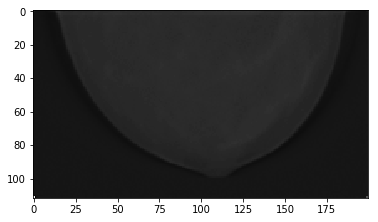

In [122]:
plt.imshow(x[40, :, :].astype('float32'), cmap='gray')

In [3]:
trainx = np.zeros([875, 80, 112, 208, 1], dtype='float16')
trainy = np.zeros([875, 80, 112, 208, 1], dtype='float16')
count = 0
for i in range(1, 176):
    for j in range(15):
        x = np.fromfile('/media/pranjal/BackupPlus/CEDBT/SIRT_DEEP/200x112x80-x-'+str(i)+'-'+str(j)+'.raw', dtype='float32')
        y = np.fromfile('/media/pranjal/BackupPlus/CEDBT/SIRT_DEEP/200x112x80-y-'+str(i)+'-'+str(j)+'.raw', dtype='float32')
        
        x = np.reshape(x, [80, 112, 200]).astype('float16')
        y = np.reshape(y, [80, 112, 200]).astype('float16')
        
        trainx[count, :, :, 4:-4, 0] = x
        trainy[count, :, :, 4:-4, 0] = y
        count = count+1

In [24]:
#model = unet_3d_relu_d()
model.fit(trainx, trainy, batch_size=8, validation_split=0.2, epochs=1000000, verbose=1)

Train on 700 samples, validate on 175 samples
Epoch 1/1000000
700/700 [==============================] - 64s 91ms/step - loss: 0.0312 - mean_squared_error: 0.0357 - val_loss: 0.0045 - val_mean_squared_error: 1.3195e-04
Epoch 2/1000000
700/700 [==============================] - 61s 87ms/step - loss: 0.0034 - mean_squared_error: 3.9143e-05 - val_loss: 0.0035 - val_mean_squared_error: 6.9231e-05
Epoch 3/1000000
700/700 [==============================] - 61s 87ms/step - loss: 0.0034 - mean_squared_error: 3.5033e-05 - val_loss: 0.0035 - val_mean_squared_error: 3.8912e-05
Epoch 4/1000000
700/700 [==============================] - 61s 87ms/step - loss: 0.0033 - mean_squared_error: 3.1147e-05 - val_loss: 0.0032 - val_mean_squared_error: 2.9069e-05
Epoch 5/1000000
700/700 [==============================] - 61s 87ms/step - loss: 0.0033 - mean_squared_error: 2.9551e-05 - val_loss: 0.0032 - val_mean_squared_error: 2.8529e-05
Epoch 6/1000000
700/700 [==============================] - 61s 87ms/step 

KeyboardInterrupt: 

In [19]:
fid = open('/media/pranjal/BackupPlus/CEDBT/'+str(trainx[0].shape[2])+'x'+str(trainx[0].shape[1])+'x'+str(trainx[0].shape[0])+'.raw', 'w')
np.array(np.abs(trainx[0] - trainy[0])).astype('float32').tofile(fid)

In [226]:
temp_back_25      = np.reshape(temp_back_25, [int(testvol.shape[0]), int(testvol.shape[1]), int(testvol.shape[2])])
print(temp_back_25.shape)

(160, 224, 400)


In [9]:
import odl


# Reconstruction space: discretized functions on the cube
# [-20, 20]^3 with 300 samples in x and y, and 100 samples in z direction.
reco_space = odl.uniform_discr(
    min_pt=[-20, -20, -20], max_pt=[20, 20, 20], shape=[300, 300, 100],
    dtype='float32')

# Make a 3d single-axis parallel beam geometry with flat detector
# Angles: uniformly spaced, n = 180, min = 0, max = pi
angle_partition = odl.uniform_partition(0, np.pi, 180)
# Detector: uniformly sampled, n = (500, 500), min = (-30, -30), max = (30, 30)
detector_partition = odl.uniform_partition([-30, -30], [30, 30], [500, 500])
geometry = odl.tomo.Parallel3dAxisGeometry(angle_partition, detector_partition)

# Ray transform (= forward projection).
ray_trafo = odl.tomo.RayTransform(reco_space, geometry)

# Create a discrete Shepp-Logan phantom (modified version)
phantom = odl.phantom.shepp_logan(reco_space, modified=True)

# Create projection data by calling the ray transform on the phantom
proj_data = ray_trafo(phantom)

# Back-projection can be done by simply calling the adjoint operator on the
# projection data (or any element in the projection space).
backproj = ray_trafo.adjoint(proj_data)


In [98]:
a       = sio.loadmat("/media/pranjal/BackupPlus/CEDBT/attenuation_values_cropped/LE/"+str(index)+".mat")["head"]
phantom = np.rollaxis(a, 2, 0)
phantom = np.moveaxis(phantom, [0, 1, 2], [0, 2, 1])
phantom = phantom[:, 224, :]
phantom = np.pad(phantom, ((480, 0), (0, 0)), 'constant', constant_values=(0, 0))
phantom = phantom.T
#phantom = ndimage.zoom(phantom, 0.5, order=0)
print(phantom.shape)

(800, 800)


In [105]:
# Reconstruction space: discretized functions on the rectangle
# [-20, 20]^2 with 300 samples per dimension.
reco_space = odl.uniform_discr(
    min_pt=[-20, -20], max_pt=[20, 20], shape=[800, 800], dtype='float32')

# Make a fan beam geometry with flat detector
# Angles: uniformly spaced, n = 360, min = 0, max = 2 * pi
angle_partition = odl.uniform_partition(-np.pi*65/180, np.pi*65/180, 65)
# Detector: uniformly sampled, n = 512, min = -30, max = 30
detector_partition = odl.uniform_partition(-30, 30, 512)
geometry = odl.tomo.FanFlatGeometry(angle_partition, detector_partition,
                                    src_radius=1000, det_radius=0)

# Ray transform (= forward projection).
ray_trafo = odl.tomo.RayTransform(reco_space, geometry)

# Create a discrete Shepp-Logan phantom (modified version)
#phantom = odl.phantom.shepp_logan(reco_space, modified=True)

# Create projection data by calling the ray transform on the phantom
proj_data = ray_trafo(phantom)


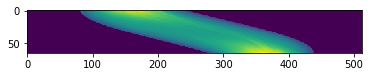

In [106]:
plt.imshow(proj_data)

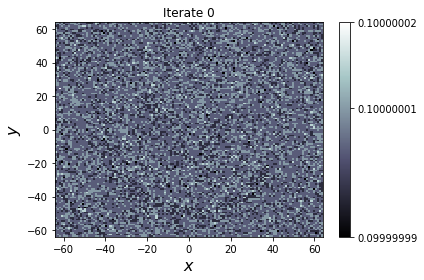

<Figure size 432x288 with 0 Axes>

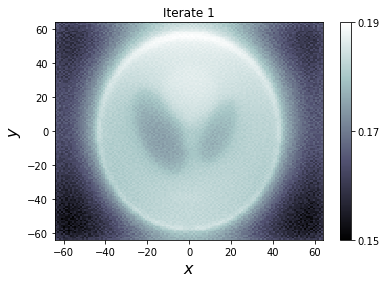

<Figure size 432x288 with 0 Axes>

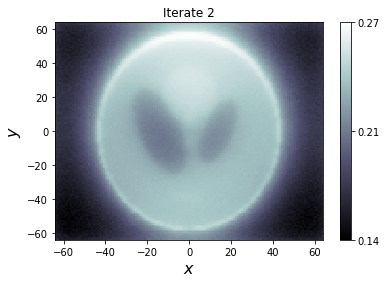

<Figure size 432x288 with 0 Axes>

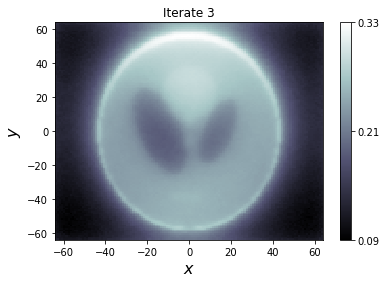

<Figure size 432x288 with 0 Axes>

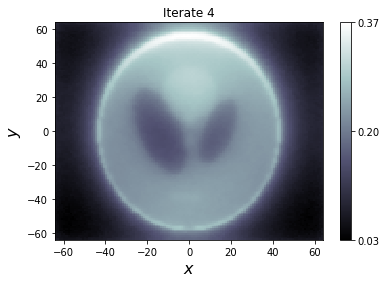

<Figure size 432x288 with 0 Axes>

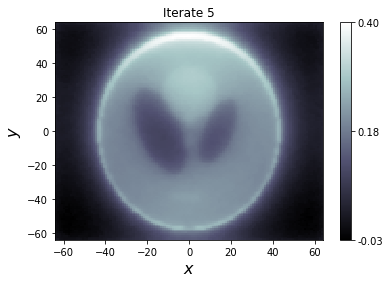

<Figure size 432x288 with 0 Axes>

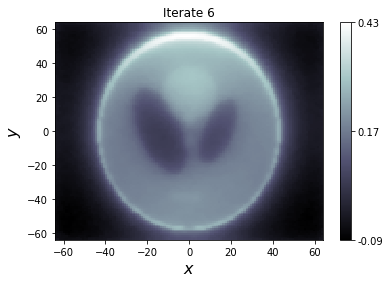

<Figure size 432x288 with 0 Axes>

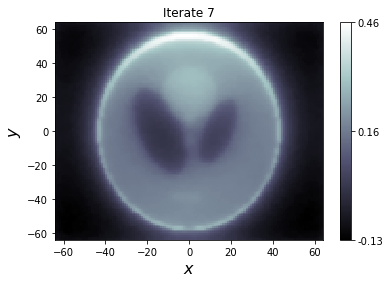

<Figure size 432x288 with 0 Axes>

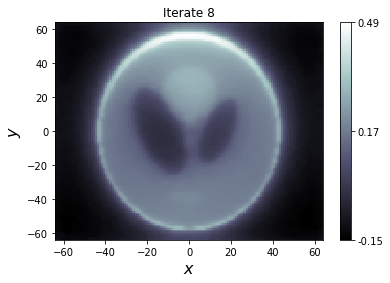

<Figure size 432x288 with 0 Axes>

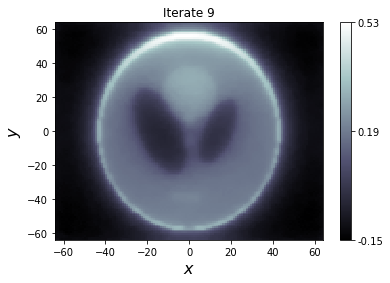

<Figure size 432x288 with 0 Axes>

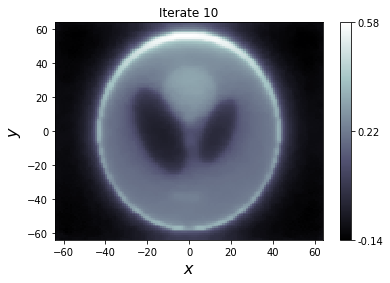

<Figure size 432x288 with 0 Axes>

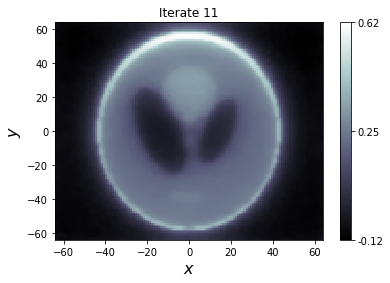

<Figure size 432x288 with 0 Axes>

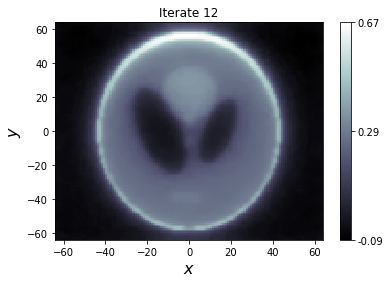

<Figure size 432x288 with 0 Axes>

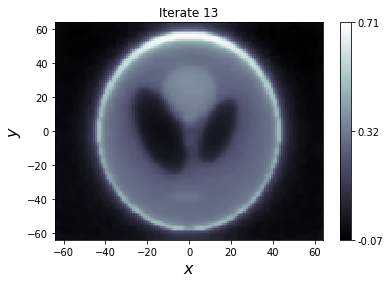

<Figure size 432x288 with 0 Axes>

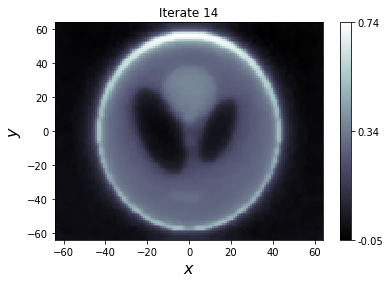

<Figure size 432x288 with 0 Axes>

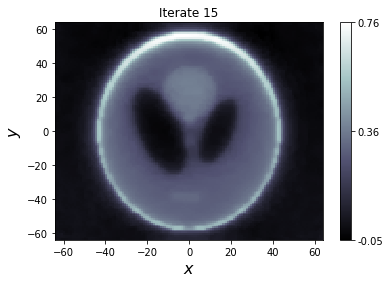

<Figure size 432x288 with 0 Axes>

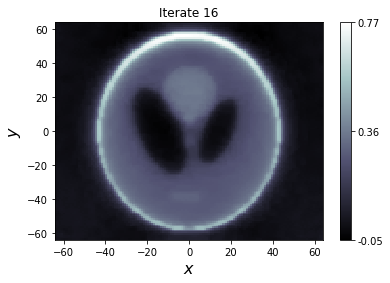

<Figure size 432x288 with 0 Axes>

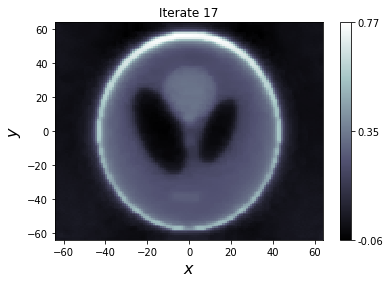

<Figure size 432x288 with 0 Axes>

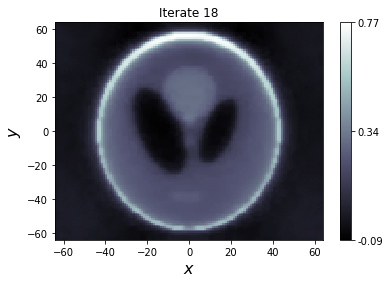

<Figure size 432x288 with 0 Axes>

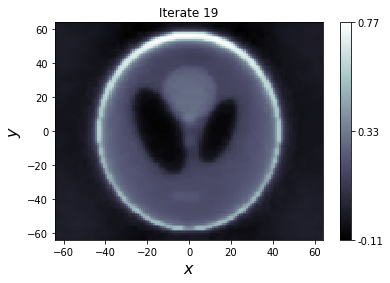

<Figure size 432x288 with 0 Axes>

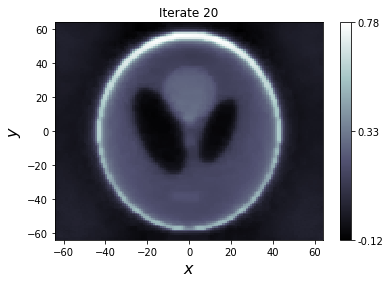

<Figure size 432x288 with 0 Axes>

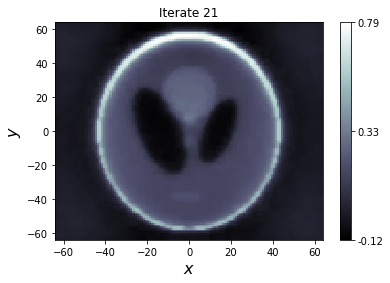

<Figure size 432x288 with 0 Axes>

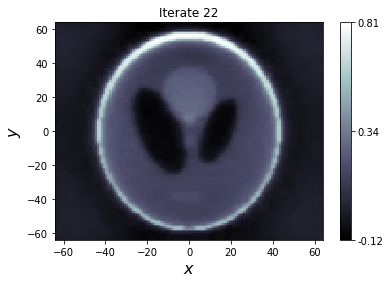

<Figure size 432x288 with 0 Axes>

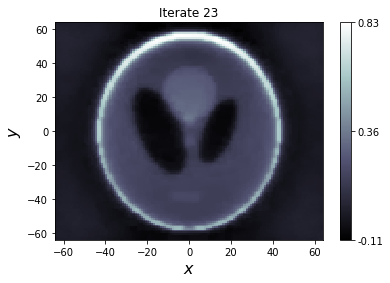

<Figure size 432x288 with 0 Axes>

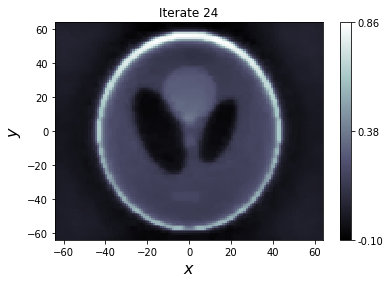

<Figure size 432x288 with 0 Axes>

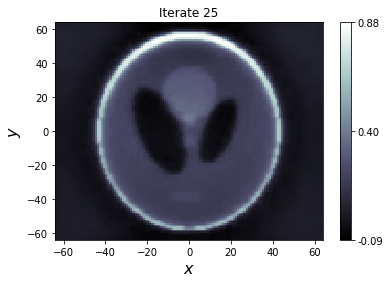

<Figure size 432x288 with 0 Axes>

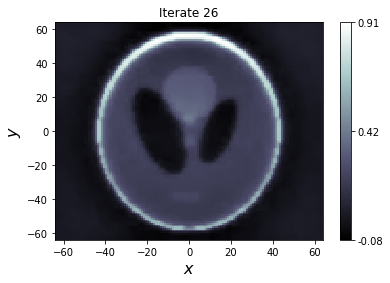

<Figure size 432x288 with 0 Axes>

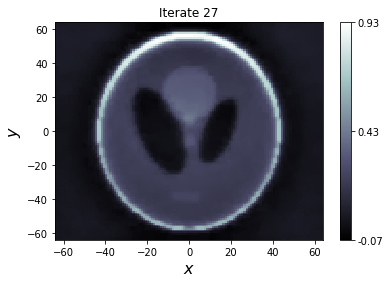

<Figure size 432x288 with 0 Axes>

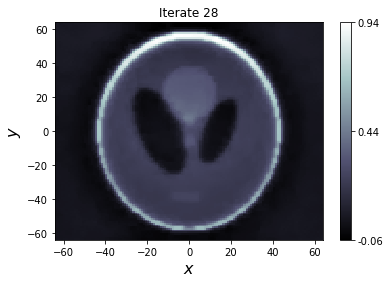

<Figure size 432x288 with 0 Axes>

KeyboardInterrupt: 

In [28]:
# Train using the ADAM optimizer
optimizer = tf.train.AdamOptimizer(1e-1).minimize(loss)

# Initialize all TF variables
tf.global_variables_initializer().run()

# Solve with an ODL callback to see what happens
callback = odl.solvers.CallbackShow()

for i in range(200):
    sess.run(optimizer)

    callback(space.element(x.eval()))

In [10]:
print(proj_data.shape)

(180, 500, 500)


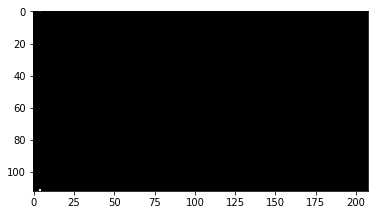

In [50]:
plt.imshow(trainx[10, 60, :, :, 0].astype('uint8'), cmap='gray')

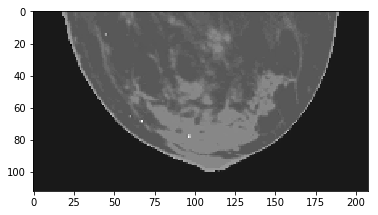

In [34]:
plt.imshow(trainy[10, 40, :, :, 0].astype('float32'), cmap='gray')

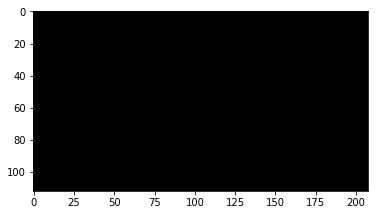

In [26]:
plt.imshow(result[10, 40, :, :, 0].astype('float32'), cmap='gray')

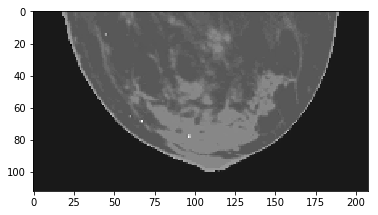

In [5]:
plt.imshow(trainy[10, 40, :, :, 0].astype('float32'), cmap='gray')

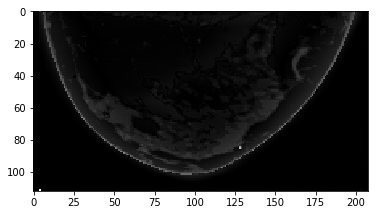

In [12]:
plt.imshow(10*np.abs(trainy[150, 40, :, :, 0] - trainx[150, 40, :, :, 0]).astype('float32'), cmap='gray')

In [25]:
result = model.predict(trainx, batch_size=16)
#result = np.argmax(result, axis=-1)
#trainy = np.argmax(trainy, axis=-1)
print(result.shape, trainy.shape)

(875, 80, 112, 208, 1) (875, 80, 112, 208, 1)


In [131]:
fid = open('/media/pranjal/BackupPlus/CEDBT/'+str(estimate_25.shape[2])+'x'+str(estimate_25.shape[1])+'x'+str(estimate_25.shape[0])+'-pred-25-10.raw', 'w')
np.array(estimate_25).astype('float32').tofile(fid)

In [7]:
#model.save('conv3d_classification.h5')

In [28]:
fid = open('/media/pranjal/BackupPlus/CEDBT/'+str(estimate_25.shape[2])+'x'+str(estimate_25.shape[1])+'x'+str(estimate_25.shape[0])+'-pred25-'+str(j)+'.raw', 'w')
np.array(estimate_25).astype('float32').tofile(fid)
fid = open('/media/pranjal/BackupPlus/CEDBT/'+str(estimate_55.shape[2])+'x'+str(estimate_55.shape[1])+'x'+str(estimate_55.shape[0])+'-pred55-'+str(j)+'.raw', 'w')
np.array(estimate_55).astype('float32').tofile(fid)

(array([ 78., 156., 130.,  72.,   6.,   7.,  21.,  22.,  11.,   9.]),
 array([0.006336, 0.00644 , 0.006542, 0.006645, 0.00675 , 0.00685 ,
        0.00695 , 0.007053, 0.007156, 0.00726 , 0.007362], dtype=float16),
 <a list of 10 Patch objects>)

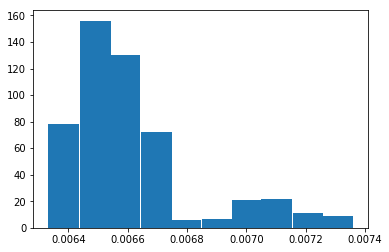

In [31]:
plt.hist(estimate_55[164-voxel_size:164+voxel_size, 245-voxel_size:245+voxel_size, 351-voxel_size:351+voxel_size].flatten(0))

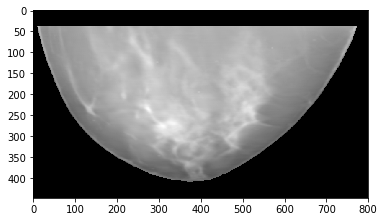

In [311]:
temp =  np.multiply(volume_mask, estimate_55)
plt.imshow(temp[index, :, :].astype('float32'), cmap='gray')

In [ ]:
# Plot the histogram


a       = sio.loadmat("/media/pranjal/BackupPlus/CEDBT/attenuation_values_cropped/LE/1.mat")["head"]
testvol = np.rollaxis(a, 2, 0)
testvol = np.moveaxis(testvol, [0, 1, 2], [0, 2, 1])
estimate_25 = testvol

index_array1 = []
for i in range(100):
    index_array1.append([random.randint(10, 320-10), random.randint(10, 448-10), random.randint(10, 800-10)])
#index_array = index_array1

index_array = index_array1#[[164, 245, 351]]#calci_array#np.load('/media/pranjal/BackupPlus/CEDBT/SIRT/CALCI/150.npy')
hist1 = []
hist2 = []
hist3 = []
hist4 = []
for j in range(100):
    hist1.append([])
    hist2.append([])
    hist3.append([])
    hist4.append([])

for i in range(10):
    print(i)
    a = np.fromfile('/media/pranjal/BackupPlus/CEDBT/CE05/ce.800x448x320.sirt'+str(i)+'.raw', dtype='float32')
    #a = e_25[i]#np.fromfile('/media/pranjal/BackupPlus/CEDBT/SIRT/RECON/800x448x320.sirt-150-'+str(i)+'.raw', dtype='float32')
    a = np.reshape(a, [estimate_25.shape[0], estimate_25.shape[1], estimate_25.shape[2]])
    
    #b = np.fromfile('/media/pranjal/BackupPlus/CEDBT/CE05/ce.800x448x320.sirt'+str(i)+'.raw', dtype='float32')
    #b = e_55[i]#np.fromfile('/media/pranjal/BackupPlus/CEDBT/SIRT/RECON/800x448x320.sirtno-150-'+str(i)+'.raw', dtype='float32')
    #b = np.reshape(b, [estimate_25.shape[0], estimate_25.shape[1], estimate_25.shape[2]])
    
    for j in range(len(index_array)):
        temp  = 0
        #for k1 in range(-2, 2):
        #    for k2 in range(-2, 2):
        #        for k3 in range(-2, 2):
        #            temp = temp + (a[index_array[j][0], index_array[j][1], index_array[j][2]]-a[index_array[j][0]+k1, index_array[j][1]+k2,   index_array[j][2]+k3])
        #temp  = a[index_array[j][0], index_array[j][1], index_array[j][2] ]
        #for k in range(-2, 2):
        #    temp = temp + a[index_array[j][0]+k, index_array[j][1],   index_array[j][2] ]
        #    temp = temp + a[index_array[j][0],   index_array[j][1]+k, index_array[j][2] ]
        #    temp = temp + a[index_array[j][0],   index_array[j][1],   index_array[j][2]+k ]
        #hist1[j].append(temp)
        hist1[j].append(a[index_array[j][0], index_array[j][1], index_array[j][2] ])
        #hist2[j].append(b[index_array[j][0], index_array[j][1], index_array[j][2] ])
        #hist3[j].append(a[index_array1[j][0], index_array1[j][1], index_array1[j][2] ])
        #hist4[j].append(b[index_array1[j][0], index_array1[j][1], index_array1[j][2] ])

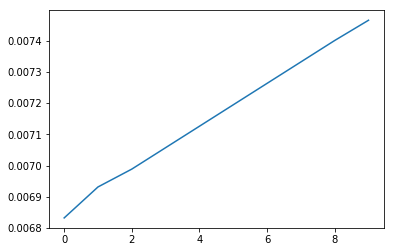

In [26]:
x       = np.arange(10)
plotted = []
for i in range(1):
    prob = np.random.uniform()#index_array[j][0]
    #s    = np.sum(np.abs(np.array(hist1[i])-np.array(hist2[i])))
    #print(s)
    #if s > 0.0001:
    plotted.append(i)
    plt.plot(x, np.array(hist1[i]))
    #plt.plot(x, (np.array(hist2[i])-np.array(hist1[i])))
    #plt.plot(x, np.abs(np.array(hist1[i])-np.array(hist2[i])))
plt.show()
#plt.plot(hist[202])

In [ ]:
# SART reconstruction

import astra
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import random
import time
import pydicom
import glob
from numba import jit
from skimage import filters


#a       = sio.loadmat("/media/dril/ubuntudata/DBT-NEW/attenuation_values_cropped/LE/1.mat")["head"]
#testvol = np.rollaxis(a, 2, 0)
#testvol = np.moveaxis(testvol, [0, 1, 2], [0, 2, 1])

testvol = np.zeros([320, 448, 800], dtype='uint8')

SOD       = 65/0.0255
ODD       = 4.5/0.0255
detWidth  = 0.0085/0.0255   # size of each detector pixel
detHeight = detWidth        # size of each detector pixel
detRows   = 3584
detCols   = 1100

proj_arr = np.zeros((25, detCols, detRows), dtype='float16')

testones     = np.ones(testvol.shape, dtype='uint8')
estimate     = np.zeros(testvol.shape, dtype='float32')

vol_geom = astra.create_vol_geom(testvol.shape[1], testvol.shape[2], testvol.shape[0])

theta   = np.arange(-5*5, 5*5, 2)*np.pi/180
l       = len(theta)
vectors = np.zeros((l, 12))


# Readng the Projections and getting the angles
x = []
y = []
proj_paths = glob.glob("/media/dril/BackupPlus/CEDBT/CE05/R_HE/*.IMA")
for p in proj_paths:
    a    = pydicom.dcmread(p)
    temp = a.pixel_array.T
    temp = np.log(2000)-np.log(temp)
    temp = temp[-detCols:, :]
    temp = np.flipud(temp)
    val = filters.threshold_otsu(temp)
    temp[temp < val] = 0
    x.append(temp)
    #x.append(temp)
    y.append(float(a[0x00181530].value))

z        = sorted(zip(y, x))
theta    = []
for i, t in enumerate(z):
    proj_arr[i, :, :] = t[1]
    theta.append(t[0])
theta    = np.array(theta)*np.pi/180
theta = theta[::-1]
#theta.reverse()

# For reconstructing real data
vectors[:, 0:3]  = np.transpose(np.array([np.sin(theta), np.zeros(l), np.cos(theta)])) * SOD        # S source to object
vectors[:,3:6]   = np.transpose(np.array([np.zeros(l), np.zeros(l),  -np.ones(l)*ODD]))             # D object to detector
vectors[:,6:9]   = np.transpose(np.array([np.ones(l)*detWidth, np.zeros(l), np.zeros(l)]));         # U
vectors[:,9:12]  = np.transpose(np.array([np.zeros(l), np.ones(l)*detWidth, np.zeros(l)]));        # V

# Creating the projection matrix
Gt = []
for i in range(25):
    temp             = np.expand_dims(vectors[i, :], 0)
    proj_geom        = astra.create_proj_geom('cone_vec', detCols, detRows, temp)
    proj_id          = astra.create_projector('cuda3d', proj_geom, vol_geom)
    W                = astra.OpTomo(proj_id)
    Gt.append(W)

niter = 5
nview = 25

#for i in range(0, niter):
# for i in range(0, 25):
#     print("Projection ", i)
#     G = Gt[i]
#     l = G*testones
    
#     l = np.reshape(l, [12, detCols, detRows])
#     l = l[0, :, :]
#     l[l< 1] = 1
#     l_arr[i, :, :] = l.astype('float16')

# estimate_array = []
# cost_arr = []
# diff_arr = []

print('Starting Recon')

@jit(nopython=True, parallel=True)
def my_divide(x, y):
    return np.divide(x, y)

@jit(nopython=True, parallel=True)
def my_add(x, y):
    return np.add(x, y)

@jit(nopython=True, parallel=True)
def my_mul(x, y):
    return np.multiply(x, y)

#estimate = np.fromfile("/media/dril/BackupPlus/CEDBT/gan-110-projections/1000x500x400.ce18.HE.raw", dtype='float32')
#estimate = np.reshape(estimate, [400, 500, 1000])
all_sart_proj = []

start = time.time()

for j in range(0, niter):
    print(j)
    #cost = 0
    q = list(range(0, 25))
    #random.shuffle(q)
    for i in q:#range(q):
        print('View Number ', i)
        G    = Gt[i]
        #t1 = time.time()
        p    = G*estimate
        #t2 = time.time()
        #print(t2-t1)
        
        p    = p.astype('float16')
        #print(p.nbytes/1024/1024/1024)
        #t1 = time.time()
        temp_back = G.T*np.ones(p.shape, dtype='uint8')
        #t2 = time.time()
        #print(t2-t1)
        temp_back = temp_back.astype('float32')
        #temp      = G.T*p
        
        p = np.reshape(p, [12, detCols, detRows])
        p = p[0, :, :]
        #all_sart_proj.append(p)
        
        pdif   = proj_arr[i] - p
        
#         #if j == 4:
#         #    diff_arr.append(pdif)
        
        #pdif1   = pdif.flatten()
        #cost =   np.sum(np.square(pdif1))
        #print(cost)
        #cost_arr.append(cost)
        denomi = temp_back#d_arr[i]
        
        # lmask = logical(l>5*dz)
        # Mask out too small l value to avoid blowup in y:
        # some l can be very small. When it is divided from p, 
        # the y value can be overamplified at the boundary(the 
        # boundary value could be 10 or 20 times larger than the
        # normal object value.
        
        #print(pdif.shape, l.shape)
        l       = G*testones
        l       = l.astype('float16')
        l       = np.reshape(l, [12, detCols, detRows])
        l       = l[0, :, :]
        l[l< 1] = 1
        y       = np.divide(pdif, l)
        l = None
        #temp    = np.isnan(y)
        #y[temp] = 0
        
        y1       = np.zeros([12, detCols*detRows], 'float16')
        #for k in range(12):
        y1[0, :] = np.reshape(y,  [detCols*detRows])
        y1       = np.reshape(y1, [12*detCols*detRows])
        
        #t1   = time.time()
        imgi = G.T*y1
        imgi = imgi.astype('float32')
        #t2   = time.time()
        #print(t2-t1)
        y1 = None
        
        #print(imgi.shape, denomi.shape)
        #t1   = time.time()
        imgj = my_divide(imgi, denomi)
        #t2   = time.time()
        #print(t2-t1)
        denomi = None
        #temp = np.isnan(imgj)
        #imgj[temp] = 0
        #imgi = np.reshape(imgi, np.shape(estimate))
        #t1 = time.time()
        estimate = my_add(estimate.flatten(), imgi*0.02*(5-j))
        estimate = np.reshape(estimate, testones.shape)
        #estimate   = estimate + 0.1*(5-j)*np.reshape(imgi, np.shape(estimate))/5
        #t2 = time.time()
        #print(t2-t1)
        imgj = None
        #if j == 0:
        #    estimate_array.append(estimate)
    estimate[estimate < 0] = 0
    #estimate_array.append(estimate)
    #print(cost)

endtime = time.time()

fid = open('/media/pranjal/2d33dff3-95f7-4dc0-9842-a9b18bcf1bf9/pranjal/DBT_data/ClinicalExample/CE-05_R/ce.'+str(testvol.shape[2])+'x'+str(testvol.shape[1])+'x'+str(testvol.shape[0])+'.05-le-sart.raw', 'w')
np.array(estimate).astype('float32').tofile(fid)

print(endtime-start)


In [3]:
# SIRT reconstruction for Real Data

import astra
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import random
import time
import pydicom
import glob
from numba import jit
from skimage import filters


#a       = sio.loadmat("/media/pranjal/Backup/DBT-NEW/attenuation_values_cropped/LE/1.mat")["head"]
#testvol = np.rollaxis(a, 2, 0)
#testvol = np.moveaxis(testvol, [0, 1, 2], [0, 2, 1])

testvol = np.zeros([400, 448*3, 800*3], dtype='uint8')

SOD       = 65/(0.0255/3)
ODD       = 3.5/(0.0255/3)#4.5/(0.0255/3)
detWidth  = 0.0085/(0.0255/3)   # size of each detector pixel
detHeight = detWidth        # size of each detector pixel
detRows   = 3584
detCols   = 1100

proj_arr = np.zeros((25, detCols, detRows), dtype='float16')

testones     = np.ones(testvol.shape, dtype='uint8')
estimate     = np.zeros(testvol.shape, dtype='float16')
#estimate = np.fromfile("/media/pranjal/2d33dff3-95f7-4dc0-9842-a9b18bcf1bf9/pranjal/DBT_data/ClinicalExample/CE-05_R/ce.800x448x320.05-le.raw", dtype='float32')
#estimate = np.reshape(estimate, [320, 448, 800])

vol_geom = astra.create_vol_geom(testvol.shape[1], testvol.shape[2], testvol.shape[0])

theta   = np.arange(-5*5, 5*5, 2)*np.pi/180
l       = len(theta)
vectors = np.zeros((l, 12))


# Readng the Projections and getting the angles
x = []
y = []
proj_paths = glob.glob("/media/pranjal/BackupPlus/CEDBT/CE05/R_LE/*.IMA")
for p in proj_paths:
    a    = pydicom.dcmread(p)
    temp = a.pixel_array.T
    temp = np.log(2000)-np.log(temp)
    temp = temp[-detCols:, :]
    temp = np.flipud(temp)
    val = filters.threshold_otsu(temp)
    temp[temp < val] = 0
    x.append(temp)
    #x.append(temp)
    y.append(float(a[0x00181530].value))

z        = sorted(zip(y, x))
theta    = []
for i, t in enumerate(z):
    proj_arr[i, :, :] = t[1]
    theta.append(t[0])
theta    = np.array(theta)*np.pi/180
theta = theta[::-1]
#theta.reverse()
print(theta)
# For reconstructing real data
vectors[:, 0:3]  = np.transpose(np.array([np.sin(theta), np.zeros(l), np.cos(theta)])) * SOD        # S source to object
vectors[:,3:6]   = np.transpose(np.array([np.zeros(l), np.zeros(l),  -np.ones(l)*ODD]))             # D object to detector
vectors[:,6:9]   = np.transpose(np.array([np.ones(l)*detWidth, np.zeros(l), np.zeros(l)]));         # U
vectors[:,9:12]  = np.transpose(np.array([np.zeros(l), np.ones(l)*detWidth, np.zeros(l)]));        # V

# Creating the projection matrix
proj_geom        = astra.create_proj_geom('cone_vec', detCols, detRows, vectors)
proj_id          = astra.create_projector('cuda3d',   proj_geom, vol_geom)
W                = astra.OpTomo(proj_id)
#Gt.append(W)

niter = 1

print('Starting Recon')

@jit(nopython=True, parallel=True)
def my_divide(x, y):
    return np.divide(x, y)

@jit(nopython=True, parallel=True)
def my_add(x, y):
    return np.add(x, y)

@jit(nopython=True, parallel=True)
def my_mul(x, y):
    return np.multiply(x, y)


start = time.time()
proj_arr = np.array(proj_arr).astype('float16')
proj_arr = np.rollaxis(proj_arr, 1, 0)
proj_arr = proj_arr.flatten()

niter = 3

for j in range(0, niter):
    print("Iteration ", j)
    p = W*estimate
    p = p.astype('float16')
    diff      = proj_arr - p
    diff      = diff.astype('float32')
    #print("max is ", np.max(diff))
    #cost = np.square(diff)
    #print("Cost is ", np.sum(cost))
    
    temp_R    = W*np.ones(estimate.shape, dtype='uint8')
    temp_R    = temp_R.astype('float32')
    
    diff      = my_divide(diff, temp_R)
    diff      = diff.astype('float16')
    
    temp_back = W.T*diff#np.ones(p.shape, dtype='uint8')
    temp_back = temp_back.astype('float32')
    
    temp_C    = W.T*np.ones(p.shape, dtype='uint8')
    temp_C    = temp_C.astype('float32')
    
    vol       = my_divide(temp_back, temp_C)
    vol       = vol.astype('float16')
    vol       = np.nan_to_num(vol)
    
    vol      = np.reshape(vol, [testvol.shape[0], testvol.shape[1], testvol.shape[2]])
    estimate = estimate+vol
    
fid = open('/media/pranjal/BackupPlus/CEDBT/CE05/ce.'+str(estimate.shape[2])+'x'+str(estimate.shape[1])+'x'+str(estimate.shape[0])+'.sirt1'+str(j)+'.raw', 'w')
np.array(estimate).astype('float32').tofile(fid)

[ 0.36983527  0.33423055  0.30194196  0.26965337  0.23806291  0.20682152
  0.17313666  0.13613568  0.10698868  0.06876597  0.03543018  0.00331613
 -0.03316126 -0.06702064 -0.09843657 -0.13334315 -0.16493361 -0.1993166
 -0.23230332 -0.26563911 -0.2989749  -0.33510322 -0.36704274 -0.40090213
 -0.43336525]
Starting Recon
Iteration  0
Iteration  1
Iteration  2


In [ ]:
# SIRT reconstruction Projection of Real Data

import astra
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import random
import time
import pydicom
import glob
from numba import jit
from skimage import filters


#a       = sio.loadmat("/media/pranjal/Backup/DBT-NEW/attenuation_values_cropped/LE/1.mat")["head"]
#testvol = np.rollaxis(a, 2, 0)
#testvol = np.moveaxis(testvol, [0, 1, 2], [0, 2, 1])

testvol = np.zeros([400, 448, 800], dtype='uint8')

SOD       = 65/(0.0255)
ODD       = 3.5/(0.0255)
detWidth  = 0.0085/(0.0255*0.44642857142857145)   # size of each detector pixel
detHeight = detWidth        # size of each detector pixel
detRows   = 1600
detCols   = 400

testones     = np.ones(testvol.shape, dtype='uint8')
estimate     = np.zeros(testvol.shape, dtype='float16')
#estimate = np.fromfile("/media/pranjal/2d33dff3-95f7-4dc0-9842-a9b18bcf1bf9/pranjal/DBT_data/ClinicalExample/CE-05_R/ce.800x448x320.05-le.raw", dtype='float32')
#estimate = np.reshape(estimate, [320, 448, 800])

vol_geom = astra.create_vol_geom(testvol.shape[1], testvol.shape[2], testvol.shape[0])


# Readng the Projections and getting the angles
x = []
y = []
proj_paths = glob.glob("/media/pranjal/BackupPlus/CEDBT/CE05/R_LE/*.IMA")
for p in proj_paths:
    a    = pydicom.dcmread(p)
    temp = a.pixel_array.T
    temp = np.log(2000)-np.log(temp)
    temp = temp[-detCols:, :]
    temp = np.flipud(temp)
    val = filters.threshold_otsu(temp)
    temp[temp < val] = 0
    #temp = ndimage.zoom(temp, 0.5)
    x.append(temp)
    #x.append(temp)
    y.append(float(a[0x00181530].value))

z        = sorted(zip(y, x))
theta    = []
for i, t in enumerate(z):
    theta.append(t[0])
theta    = np.array(theta)*np.pi/180
theta = theta[::-1]
#theta.reverse()
#print(theta)


suma = []
for i in range(1, 24):
    suma.append(theta[i-1]-theta[i])
suma = np.mean(suma)

theta = list(theta)
for i in range(15):
    theta.insert(0, theta[0]+suma)
for i in range(15):
    theta.append(theta[-1]-suma)
#print(theta)


vectors = np.zeros((len(theta), 12))
# For reconstructing real data
vectors[:, 0:3]  = np.transpose(np.array([np.sin(theta), np.zeros(len(theta)), np.cos(theta)])) * SOD        # S source to object
vectors[:,3:6]   = np.transpose(np.array([np.zeros(len(theta)), np.zeros(len(theta)),  -np.ones(len(theta))*ODD]))             # D object to detector
vectors[:,6:9]   = np.transpose(np.array([np.ones(len(theta))*detWidth, np.zeros(len(theta)), np.zeros(len(theta))]))         # U
vectors[:,9:12]  = np.transpose(np.array([np.zeros(len(theta)), np.ones(len(theta))*detWidth, np.zeros(len(theta))]))        # V

# Creating the projection matrix
proj_geom        = astra.create_proj_geom('cone_vec', detCols, detRows, vectors)
proj_id          = astra.create_projector('cuda3d',   proj_geom, vol_geom)
W                = astra.OpTomo(proj_id)
#Gt.append(W)

niter = 1

@jit(nopython=True, parallel=True)
def my_divide(x, y):
    return np.divide(x, y)

@jit(nopython=True, parallel=True)
def my_add(x, y):
    return np.add(x, y)

@jit(nopython=True, parallel=True)
def my_mul(x, y):
    return np.multiply(x, y)


estimate1 = np.fromfile("/media/pranjal/BackupPlus/CEDBT/CE05/ce.800x448x320.sirt9.raw", dtype='float32')
estimate  = np.reshape(estimate1, estimate.shape)

p = W*estimate
p = np.reshape(p, [detCols, 55, detRows])

allproj = []
for i in range(55):
    temp  = p[:, i, :]/3.0#ndimage.zoom(p[:, i, :], 0.5)
    allproj.append(temp)
allproj = np.array(allproj)


trainx = np.zeros((allproj[0].shape[0], 1600, 64,  1), dtype=np.single)
count_train = 0
for j in range(0, allproj[0].shape[0]):
    tempx = allproj[:, j, :]#trainx[:, j, :]
    tempx = np.fliplr(tempx)
    trainx[count_train, :, :, 0]  = np.pad(tempx, ((4, 5), (0, 0)), 'constant', constant_values = (0, 0)).T
    count_train = count_train +1

#plt.imshow(trainx[100, :, :, 0].T, cmap='gray')
result = model.predict(trainx, batch_size=16)
print(result.shape)

result_proj = np.zeros(allproj.shape)
count_train = 0

for j in range(0, allproj[0].shape[0]):
    tempx = result[count_train, :, :, 0]*3.0
    tempx = tempx.T
    tempx = tempx[4:-5, :]
    tempx = np.fliplr(tempx)
    result_proj[:, j, :] = tempx
    count_train = count_train +1


    
estimate  = np.zeros(estimate.shape, dtype='float16')

proj_arr = np.array(result_proj).astype('float16')
proj_arr = np.rollaxis(proj_arr, 1, 0)
proj_arr = proj_arr.flatten()

niter = 5

for j in range(0, 10):
    print("Iteration ", j)
    p = W*estimate
    p = p.astype('float16')
    diff      = proj_arr - p
    diff      = diff.astype('float32')
    #print("max is ", np.max(diff))
    #cost = np.square(diff)
    #print("Cost is ", np.sum(cost))
    
    temp_R    = W*np.ones(estimate.shape, dtype='uint8')
    temp_R    = temp_R.astype('float32')
    
    diff      = my_divide(diff, temp_R)
    diff      = diff.astype('float16')
    
    temp_back = W.T*diff#np.ones(p.shape, dtype='uint8')
    temp_back = temp_back.astype('float32')
    
    temp_C    = W.T*np.ones(p.shape, dtype='uint8')
    temp_C    = temp_C.astype('float32')
    
    vol       = my_divide(temp_back, temp_C)
    vol       = vol.astype('float16')
    vol       = np.nan_to_num(vol)
    
    vol      = np.reshape(vol, [testvol.shape[0], testvol.shape[1], testvol.shape[2]])
    estimate = estimate+vol
    
fid = open('/media/pranjal/BackupPlus/CEDBT/CE05/new.'+str(estimate.shape[2])+'x'+str(estimate.shape[1])+'x'+str(estimate.shape[0])+'.sirt'+str(j)+'.raw', 'w')
np.array(estimate).astype('float32').tofile(fid)

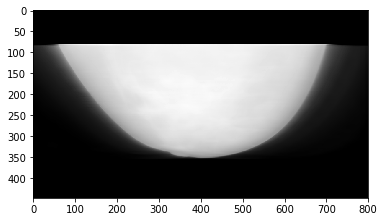

In [225]:
plt.imshow(estimate[120, :, :].astype('float32'), cmap='gray')

In [222]:
#t1 = 
t1 = np.rollaxis(result_proj, 1, 0)
print(t1.shape, result_proj.shape)
#proj_arr = proj_arr.flatten()

(400, 55, 1600) (55, 400, 1600)


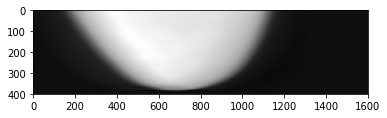

In [219]:
plt.imshow(allproj[12], cmap='gray')

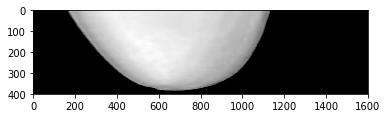

In [218]:
plt.imshow(result_proj[12], cmap='gray')

In [68]:



trainx = []

trainx  = np.zeros((slices_train, 1600, 64,  1), dtype=np.single)

count_train = 0
count_val   = 0


x = np.fromfile('/media/pranjal/BackupPlus/CEDBT/SIRT/PROJ/1600x400x55.'+str(i)+'-sirt.raw', dtype='single')
x = np.reshape(x, [55, 400, 1600])



[ 0.36983527  0.33423055  0.30194196  0.26965337  0.23806291  0.20682152
  0.17313666  0.13613568  0.10698868  0.06876597  0.03543018  0.00331613
 -0.03316126 -0.06702064 -0.09843657 -0.13334315 -0.16493361 -0.1993166
 -0.23230332 -0.26563911 -0.2989749  -0.33510322 -0.36704274 -0.40090213
 -0.43336525]


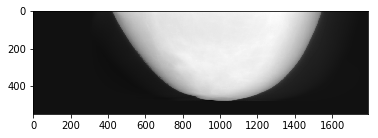

In [66]:
plt.imshow(allproj[24], cmap='gray')

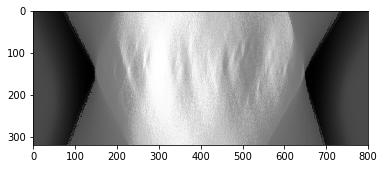

In [77]:
from skimage.exposure import equalize_hist
t1 = equalize_hist(t[:, 220, :])

plt.imshow(t1.astype('float32'), cmap='gray')

In [ ]:
# temporarty block

print(p.shape)
    print(j)
    #cost = 0
    q = list(range(0, 25))
    #random.shuffle(q)
    for i in q:#range(q):
        print('View Number ', i)
        G    = Gt[i]
        #t1 = time.time()
        p    = G*estimate
        #t2 = time.time()
        #print(t2-t1)
        
        p    = p.astype('float16')
        #print(p.nbytes/1024/1024/1024)
        #t1 = time.time()
        temp_back = G.T*np.ones(p.shape, dtype='uint8')
        #t2 = time.time()
        #print(t2-t1)
        temp_back = temp_back.astype('float32')
        #temp      = G.T*p
        
        p = np.reshape(p, [12, detCols, detRows])
        p = p[0, :, :]
        #all_sart_proj.append(p)
        
        pdif   = proj_arr[i] - p
        
#         #if j == 4:
#         #    diff_arr.append(pdif)
        
        #pdif1   = pdif.flatten()
        #cost =   np.sum(np.square(pdif1))
        #print(cost)
        #cost_arr.append(cost)
        denomi = temp_back#d_arr[i]
        
        # lmask = logical(l>5*dz)
        # Mask out too small l value to avoid blowup in y:
        # some l can be very small. When it is divided from p, 
        # the y value can be overamplified at the boundary(the 
        # boundary value could be 10 or 20 times larger than the
        # normal object value.
        
        #print(pdif.shape, l.shape)
        l       = G*testones
        l       = l.astype('float16')
        l       = np.reshape(l, [12, detCols, detRows])
        l       = l[0, :, :]
        l[l< 1] = 1
        y       = np.divide(pdif, l)
        l = None
        #temp    = np.isnan(y)
        #y[temp] = 0
        
        y1       = np.zeros([12, detCols*detRows], 'float16')
        #for k in range(12):
        y1[0, :] = np.reshape(y,  [detCols*detRows])
        y1       = np.reshape(y1, [12*detCols*detRows])
        
        #t1   = time.time()
        imgi = G.T*y1
        imgi = imgi.astype('float32')
        #t2   = time.time()
        #print(t2-t1)
        y1 = None
        
        #print(imgi.shape, denomi.shape)
        #t1   = time.time()
        imgj = my_divide(imgi, denomi)
        #t2   = time.time()
        #print(t2-t1)
        denomi = None
        #temp = np.isnan(imgj)
        #imgj[temp] = 0
        #imgi = np.reshape(imgi, np.shape(estimate))
        #t1 = time.time()
        estimate = my_add(estimate.flatten(), imgi*0.02*(5-j))
        estimate = np.reshape(estimate, testones.shape)
        #estimate   = estimate + 0.1*(5-j)*np.reshape(imgi, np.shape(estimate))/5
        #t2 = time.time()
        #print(t2-t1)
        imgj = None
        #if j == 0:
        #    estimate_array.append(estimate)
    estimate[estimate < 0] = 0
    #estimate_array.append(estimate)
    #print(cost)

endtime = time.time()

fid = open('/media/dril/BackupPlus/CEDBT/gan-110-projections/ce.'+str(testvol.shape[2])+'x'+str(testvol.shape[1])+'x'+str(testvol.shape[0])+'.05-he.raw', 'w')
np.array(estimate).astype('float32').tofile(fid)

print(endtime-start)

In [26]:
# For taking projections of SART volume and doing Recon using the result

import astra
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import random
import time
import pydicom
import glob
from numba import jit



#a       = sio.loadmat("/media/dril/ubuntudata/DBT-NEW/attenuation_values_cropped/LE/1.mat")["head"]
#testvol = np.rollaxis(a, 2, 0)
#testvol = np.moveaxis(testvol, [0, 1, 2], [0, 2, 1])

testvol = np.zeros([320, 448, 800], dtype='uint8')

SOD       = 65/0.0255
ODD       = 4.5/0.0255
detWidth  = 0.0085*4/0.0255   # size of each detector pixel
detHeight = detWidth        # size of each detector pixel
detRows   = 1000
detCols   = 300

proj_arr = np.zeros((55, detCols, detRows), dtype='float16')

testones     = np.ones(testvol.shape, dtype='uint8')
estimate     = np.zeros(testvol.shape, dtype='float32')

vol_geom = astra.create_vol_geom(testvol.shape[1], testvol.shape[2], testvol.shape[0])

#theta   = np.arange(-5*5, 5*5, 2)*np.pi/180



# Readng the Projections and getting the angles
theta = []
proj_paths = glob.glob("/media/pranjal/2d33dff3-95f7-4dc0-9842-a9b18bcf1bf9/pranjal/DBT_data/ClinicalExample/CE-05_R/LE/*.IMA")
for p in proj_paths:
    a    = pydicom.dcmread(p)
    theta.append(float(a[0x00181530].value))
theta.sort()
theta    = np.array(theta)*np.pi/180
theta = theta[::-1]
#theta.reverse()

theta = list(theta)
s = theta[0]
temp = s+2*np.pi/180.0
for j in range(15):
    theta.insert(0, temp)
    temp = temp+2*np.pi/180.0

temp = theta[-1]-2*np.pi/180.0
for j in range(15):
    theta.append(temp)
    temp = temp-2*np.pi/180.0
print(theta)


l       = len(theta)
vectors = np.zeros((l, 12))

# For reconstructing real data
vectors[:, 0:3]  = np.transpose(np.array([np.sin(theta), np.zeros(l), np.cos(theta)])) * SOD        # S source to object
vectors[:,3:6]   = np.transpose(np.array([np.zeros(l), np.zeros(l),  -np.ones(l)*ODD]))             # D object to detector
vectors[:,6:9]   = np.transpose(np.array([np.ones(l)*detWidth, np.zeros(l), np.zeros(l)]));         # U
vectors[:,9:12]  = np.transpose(np.array([np.zeros(l), np.ones(l)*detWidth, np.zeros(l)]));        # V

# Creating the projection matrix
proj_geom        = astra.create_proj_geom('cone_vec', detCols, detRows, vectors)
proj_id          = astra.create_projector('cuda3d', proj_geom, vol_geom)
W                = astra.OpTomo(proj_id)

print('Starting Recon')

@jit(nopython=True, parallel=True)
def my_divide(x, y):
    return np.divide(x, y)

@jit(nopython=True, parallel=True)
def my_add(x, y):
    return np.add(x, y)

@jit(nopython=True, parallel=True)
def my_mul(x, y):
    return np.multiply(x, y)

estimate = np.fromfile("/media/pranjal/2d33dff3-95f7-4dc0-9842-a9b18bcf1bf9/pranjal/DBT_data/ClinicalExample/CE-05_R/ce.800x448x320.05-le.raw", dtype='float32')
estimate = np.reshape(estimate, [320, 448, 800])
all_sart_proj = []

start = time.time()

p = W*estimate
p = np.reshape(p, [detCols, 55, detRows])
input_proj = copy.deepcopy(p)

print(p.shape)







testx = []
#print(p.shape)
for j in range(300):
    img = []
    for i in range(55):
        temp = p[j, i, :]
        img.append(temp)
    img = np.pad(img, [(4, 5), (12, 12)], 'constant', constant_values=(0, 0))/5#1.8
    testx.append(img.T)

testx = np.array(testx)
testx = np.expand_dims(testx, axis=-1)
print(testx.shape)


result = model.predict(testx, batch_size=8)*5#1.8
result = result[:, 12:-12, 4:-5, 0]
print(result.shape)


result_proj = []
for i in range(55):
    img = []
    for j in range(1000):
        img.append(result[:, j, i])
    result_proj.append(np.array(img))
result_proj = np.array(result_proj)
print(result_proj.shape)



# Creating the projection matrix
Gt = []
for i in range(55):
    temp             = np.expand_dims(vectors[i, :], 0)
    proj_geom        = astra.create_proj_geom('cone_vec', detCols, detRows, temp)
    proj_id          = astra.create_projector('cuda3d', proj_geom, vol_geom)
    W                = astra.OpTomo(proj_id)
    Gt.append(W)


niter = 0
for j in range(0, niter):
    print(j)
    #cost = 0
    q = list(range(0, 55))
    #random.shuffle(q)
    for i in q:#[15:-15]:#range(q):
        print('View Number ', i)
        G    = Gt[i]
        #t1 = time.time()
        p    = G*estimate
        #t2 = time.time()
        #print(t2-t1)
        
        p    = p.astype('float16')
        #print(p.nbytes/1024/1024/1024)
        #t1 = time.time()
        temp_back = G.T*np.ones(p.shape, dtype='uint8')
        #t2 = time.time()
        #print(t2-t1)
        temp_back = temp_back.astype('float32')
        #temp      = G.T*p
        
        p = np.reshape(p, [12, detCols, detRows])
        p = p[0, :, :]
        #all_sart_proj.append(p)
        
        pdif   = proj_arr[i] - p
        
#         #if j == 4:
#         #    diff_arr.append(pdif)
        
        #pdif1   = pdif.flatten()
        #cost =   np.sum(np.square(pdif1))
        #print(cost)
        #cost_arr.append(cost)
        denomi = temp_back#d_arr[i]
        
        # lmask = logical(l>5*dz)
        # Mask out too small l value to avoid blowup in y:
        # some l can be very small. When it is divided from p, 
        # the y value can be overamplified at the boundary(the 
        # boundary value could be 10 or 20 times larger than the
        # normal object value.
        
        #print(pdif.shape, l.shape)
        l       = G*testones
        l       = l.astype('float16')
        l       = np.reshape(l, [12, detCols, detRows])
        l       = l[0, :, :]
        l[l< 1] = 1
        y       = np.divide(pdif, l)
        l = None
        #temp    = np.isnan(y)
        #y[temp] = 0
        
        y1       = np.zeros([12, detCols*detRows], 'float16')
        #for k in range(12):
        y1[0, :] = np.reshape(y,  [detCols*detRows])
        y1       = np.reshape(y1, [12*detCols*detRows])
        
        #t1   = time.time()
        imgi = G.T*y1
        imgi = imgi.astype('float32')
        #t2   = time.time()
        #print(t2-t1)
        y1 = None
        
        #print(imgi.shape, denomi.shape)
        #t1   = time.time()
        imgj = my_divide(imgi, denomi)
        #t2   = time.time()
        #print(t2-t1)
        denomi = None
        #temp = np.isnan(imgj)
        #imgj[temp] = 0
        #imgi = np.reshape(imgi, np.shape(estimate))
        #t1 = time.time()
        estimate = my_add(estimate.flatten(), imgi*0.02*(5-j))
        estimate = np.reshape(estimate, testones.shape)
        #estimate   = estimate + 0.1*(5-j)*np.reshape(imgi, np.shape(estimate))/5
        #t2 = time.time()
        #print(t2-t1)
        imgj = None
        #if j == 0:
        #    estimate_array.append(estimate)
    estimate[estimate < 0] = 0
fid = open('/media/pranjal/2d33dff3-95f7-4dc0-9842-a9b18bcf1bf9/pranjal/DBT_data/ClinicalExample/CE-05_R/ce.'+str(testvol.shape[2])+'x'+str(testvol.shape[1])+'x'+str(testvol.shape[0])+'.05-le-new1.raw', 'w')
np.array(estimate).astype('float32').tofile(fid)

[0.8934340440958979, 0.8585274590560112, 0.8236208740161246, 0.788714288976238, 0.7538077039363513, 0.7189011188964647, 0.683994533856578, 0.6490879488166914, 0.6141813637768048, 0.5792747787369181, 0.5443681936970315, 0.5094616086571448, 0.4745550236172582, 0.4396484385773716, 0.40474185353748504, 0.36983526849759846, 0.3342305517569141, 0.301941960595019, 0.2696533694331239, 0.23806290997202653, 0.20682151636132803, 0.1731366617978375, 0.1361356816555577, 0.10698868314725239, 0.06876597252857658, 0.035430183815484885, 0.003316125578789226, -0.03316125578789226, -0.06702064327658225, -0.09843656981248018, -0.13334315485236678, -0.16493361431346412, -0.19931660057775244, -0.23230332344044527, -0.26563911215353697, -0.29897490086662865, -0.33510321638291124, -0.36704274169440754, -0.4009021291830974, -0.433365253270192, -0.46827183831007857, -0.5031784233499652, -0.5380850083898518, -0.5729915934297385, -0.6078981784696251, -0.6428047635095118, -0.6777113485493984, -0.712617933589285, -

In [15]:
model = load_model("/media/pranjal/2d33dff3-95f7-4dc0-9842-a9b18bcf1bf9/pranjal/DBT_data/ClinicalExample/sinogram-2-110-le-dril.h5", compile=False)
#print(model.summary())

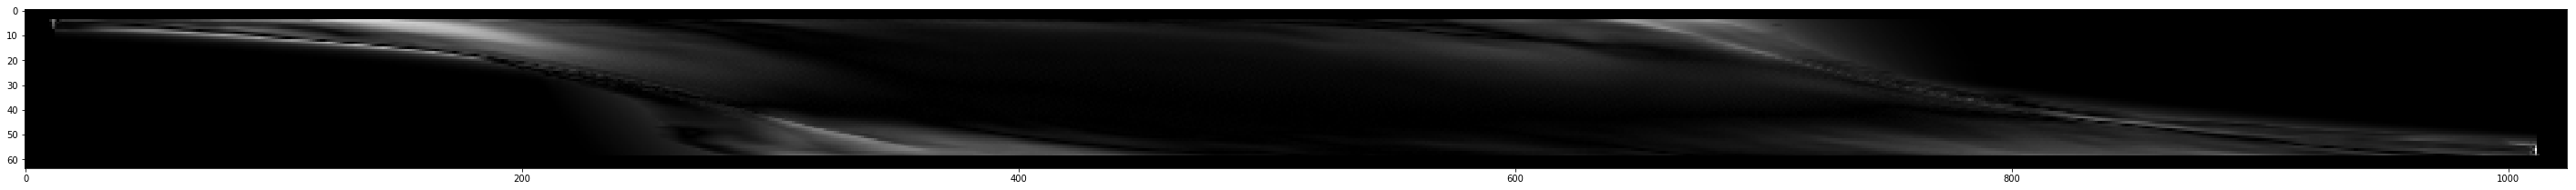

In [69]:
plt.figure(figsize=(50,100))
plt.imshow(np.abs(result[51][:, :, 0].T -  testx[51][:, :, 0].T)*100, cmap='gray')

In [100]:
result_proj = []
for i in range(55):
    img = []
    for j in range(1024):
        img.append(result[:, j, i])
    result_proj.append(np.array(img))
result_proj = np.array(result_proj)
print(result_proj.shape)

(55, 1024, 300)


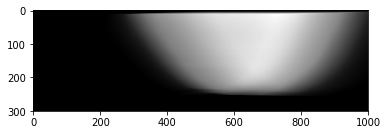

In [82]:
#print(p.shape)
plt.imshow(p[:, 50, :], cmap='gray')

2


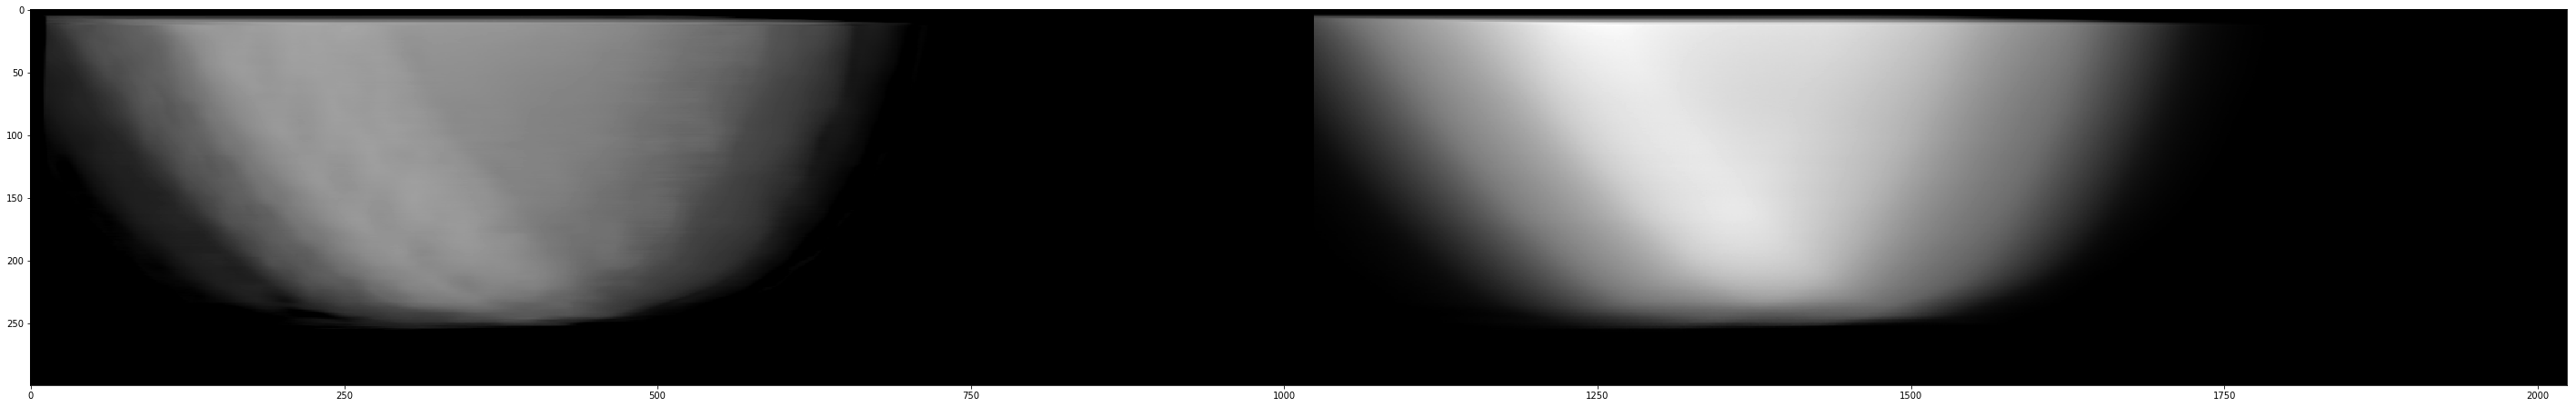

In [93]:
index = random.randint(0, 15)
print(index)
plt.figure(figsize=(50,100))
plt.imshow(np.concatenate([result_proj[index].T, p[:, index, :]], axis=-1), cmap='gray')

In [18]:
# Readng the Projections and getting the angles
x = []
y = []
proj_paths = glob.glob("/media/dril/BackupPlus/CEDBT/CE05/R_HE/*.IMA")
for p in proj_paths:
    a    = pydicom.dcmread(p)
    temp = a.pixel_array.T
    temp = np.log(2000)-np.log(temp)
    temp = temp[-detCols:, :]
    temp = np.flipud(temp)
    x.append(temp)
    #x.append(temp)
    y.append(float(a[0x00181530].value))

z        = sorted(zip(y, x))
theta    = []
for i, t in enumerate(z):
    proj_arr[i, :, :] = t[1]
    theta.append(t[0])
theta    = np.array(theta)*np.pi/180
theta = theta[::-1]
print(theta)

[ 0.36913714  0.33457962  0.30037116  0.26703538  0.23579398  0.20176006
  0.16877334  0.13456489  0.10384709  0.06649704  0.03508112  0.00244346
 -0.03333579 -0.06754424 -0.1007055  -0.13456489 -0.16632988 -0.201411
 -0.23352505 -0.26633724 -0.30141836 -0.33702308 -0.36826447 -0.40160026
 -0.43895031]


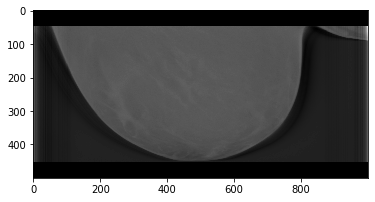

In [3]:
import astra
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import random
import time
import pydicom
import glob
from numba import jit

estimate = np.fromfile("/media/dril/BackupPlus/CEDBT/gan-110-projections/1000x500x400.ce18.LE.raw", dtype='float32')
estimate = np.reshape(estimate, [400, 500, 1000])
plt.imshow(estimate[200, :, :], cmap='gray')

In [98]:
a = pydicom.dcmread("/media/dril/ubuntudata/DBT_recon_data/CE18/LE_proj/CE-18.MG.CEDM+CEDBT_(BILATERAL_CC).0003.0012.2017.01.31.15.58.18.500000.52166478.IMA")
a = a.pixel_array.T

b = pydicom.dcmread("/media/dril/ubuntudata/DBT_recon_data/CE18/HE_proj/CE-18.MG.CEDM+CEDBT_(BILATERAL_CC).0006.0012.2017.01.31.15.58.18.500000.52168682.IMA")
b = b.pixel_array.T

d = b - 0.33*a


fid = open('/media/dril/BackupPlus/CEDBT/gan-110-projections/'+str(d.shape[1])+'x'+str(d.shape[0])+'x'+str(1)+'.diff.proj.raw', 'w')
d.astype('float32').tofile(fid)

In [ ]:
#lt.ims#

In [106]:
a = np.fromfile("/media/dril/BackupPlus/CEDBT/gan-110-projections/ce.1000x500x400.05-he.raw", dtype='float32')
a = np.reshape(a, [400, 500, 1000])
b = np.fromfile("/media/dril/BackupPlus/CEDBT/gan-110-projections/ce.1000x500x400.05-le.raw", dtype='float32')
b = np.reshape(b, [400, 500, 1000])

d = a - 0.193*b


fid = open('/media/dril/BackupPlus/CEDBT/gan-110-projections/'+str(testvol.shape[2])+'x'+str(testvol.shape[1])+'x'+str(testvol.shape[0])+'.diff.ce05.raw', 'w')
d.astype('float32').tofile(fid)
#print(a.shape)
#plt.imshow(a[])

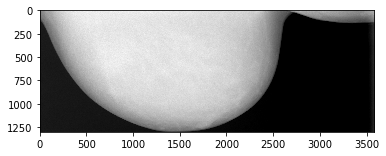

In [64]:
# Readng the Projections and getting the angles
x = []
y = []
proj_paths = glob.glob("/media/dril/ubuntudata/DBT_recon_data/CE18/LE_proj/*.IMA")
for p in proj_paths:
    a    = pydicom.dcmread(p)
    temp = a.pixel_array.T
    temp = np.log(10000)-np.log(temp)
    temp = temp[-detCols:, :]
    temp = np.flipud(temp)
    x.append(temp)
    #x.append(temp)
    y.append(float(a[0x00181530].value))

plt.imshow(x[0].astype('float32'), cmap='gray')

In [31]:
from skimage.util.shape import view_as_windows
from skimage.util.shape import view_as_blocks
import numpy as np
import copy

a  = copy.deepcopy(estimate)#np.arange(1000*600*400).reshape(1000,600,400)
a1 = np.copy(a)#[::2, ::2, ::2]

print(a.shape, a1.shape)

xl = 20

b = view_as_blocks(a,  (5, 5, 5))
c = view_as_blocks(a1, (xl, xl, xl))


d = np.reshape(b, [-1, 5,5,5])
e = np.reshape(c, [-1, xl,xl,xl])

print(d.shape, e.shape)
# c = np.reshape(b, (1000, 600, 400))
# f = np.reshape(e, (1000, 600, 400))

# print(a.shape, b.shape, c.shape, e.shape, f.shape)

# print(a.shape)
# print("        ")
# print(b.shape)
# print(c.shape)
# print(f.shape)

(400, 500, 1000) (400, 500, 1000)
(1600000, 5, 5, 5) (25000, 20, 20, 20)


In [13]:
i = 1
x = np.fromfile('/media/pranjal/BackupPlus/CEDBT/SIRT/PROJ/1600x400x55.'+str(i)+'-sirt.raw', dtype='single')
x = np.reshape(x, [55, 400, 1600])
print(x.shape)

(55, 400, 1600)


In [ ]:
# For reading the data for training the 2D U-Net model for sinogram completion

trainx = []
trainy = []
valx   = []
valy   = []

slices_train = 14000#int(37759/2+1) #31523
slices_val   = 3500#int(9447/2+1) #8133

trainx  = np.zeros((slices_train, 1600, 64,  1), dtype=np.single)
trainy  = np.zeros((slices_train, 1600, 64,  1), dtype=np.single)

valx   = np.zeros((slices_val, 1600, 64,  1), dtype=np.single)  # This is from sart
valy   = np.zeros((slices_val, 1600, 64, 1), dtype=np.single)


count_train = 0
count_val   = 0

tz = []
vz = []

for i in range(1, 176):
    #x = np.fromfile('/media/dril/a19fa9b7-846c-45a0-be8c-ef93fea1e48c/gan-110-projections-half/g_noi_sart'+str(i)+'.raw', dtype='single')
    x = np.fromfile('/media/pranjal/BackupPlus/CEDBT/SIRT/PROJ/1600x400x55.'+str(i)+'-sirt.raw', dtype='single')
    x = np.reshape(x, [55, 400, 1600])
    #x = loadmat('/media/dril/ubuntudata/DBT-NEW/gan-90-projections/projections/g_noi_sart_'+str(i)+'.mat', verify_compressed_data_integrity=False)
    #x = x['g_noi_nonoise']
    
    y = np.fromfile('/media/pranjal/BackupPlus/CEDBT/SIRT/PROJ/1600x400x55.'+str(i)+'-noise.raw', dtype='single')
    y = np.reshape(y, [55, 400, 1600])
    #y = loadmat('/media/dril/ubuntudata/DBT-NEW/gan-110-projections/projections/g_noi_nonoise_'+str(i)+'.mat', verify_compressed_data_integrity=False)
    #y = y['g_noi_nonoise']
    print(i, count_train, count_val)
    
    if i <= 140:
        for j in range(0, 400):
            tempx = x[:, j, :]
            tempy = y[:, j, :]
            
            if j%4 == 0 and np.count_nonzero(tempy.flatten()) > 0:
                trainx[count_train, :, :, 0]  = np.pad((tempx)/3.0, ((4, 5), (0, 0)), 'constant', constant_values = (0, 0)).T
                trainy[count_train, :, :, 0]  = np.pad((tempy)/3.0, ((4, 5), (0, 0)), 'constant', constant_values = (0, 0)).T
                count_train = count_train +1
                tz.append(np.count_nonzero(tempy.flatten()))
    else:
        for j in range(0, 400):
            tempx = x[:, j, :]
            tempy = y[:, j, :]
            
            if j%4 == 0 and np.count_nonzero(tempy.flatten()) > 0:
                valx[count_val, :, :, 0]  = np.pad((tempx)/3.0, ((4, 5), (0, 0)), 'constant', constant_values = (0, 0)).T
                valy[count_val, :, :, 0]  = np.pad((tempy)/3.0, ((4, 5), (0, 0)), 'constant', constant_values = (0, 0)).T
                count_val = count_val +1
                vz.append(np.count_nonzero(tempy.flatten()))
            
print(trainx.shape, trainy.shape, valx.shape, valy.shape, count_train, count_val)

In [ ]:
def unet_vanilla(input_size = (1600, 64, 1)):
    filter1 = 16
    filter2 = 32
    filter3 = 64
    filter4 = 128
    filter5 = 256
    
    inputs = Input(input_size)
    
    conv1 = Conv2D(filter1, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(filter1, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    conv1 = BatchNormalization()(conv1)
    
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    
    conv2 = Conv2D(filter2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(filter2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    conv2 = BatchNormalization()(conv2)
    
    pool2 = MaxPooling2D(pool_size=(2, 1))(conv2)
    
    conv3 = Conv2D(filter3, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(filter3, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    conv3 = BatchNormalization()(conv3)
    
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    
    conv4 = Conv2D(filter4, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(filter4, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    conv4 = BatchNormalization()(conv4)
    
    drop4 = conv4#Dropout(0.2)(conv4)
    pool4 = MaxPooling2D(pool_size=(4, 1))(drop4)

    conv5 = Conv2D(filter5, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = BatchNormalization()(conv5)
    conv5 = Conv2D(filter5, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    conv5 = BatchNormalization()(conv5)
    drop5 = conv5#Dropout(0.2)(conv5)

    up6   = Conv2D(filter4, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (4,1))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    
    conv6 = Conv2D(filter4, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = BatchNormalization()(conv6)
    conv6 = Conv2D(filter4, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)
    conv6 = BatchNormalization()(conv6)
    
    up7 = Conv2D(filter3, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    
    conv7 = Conv2D(filter3, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = BatchNormalization()(conv7)
    conv7 = Conv2D(filter3, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)
    conv7 = BatchNormalization()(conv7)
    
    up8    = Conv2D(filter2, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,1))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    
    conv8 = Conv2D(filter2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = BatchNormalization()(conv8)
    conv8 = Conv2D(filter2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)
    conv8 = BatchNormalization()(conv8)

    up9    = Conv2D(filter1, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    
    conv9  = Conv2D(filter1, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    #conv9  = BatchNormalization()(conv9)
    conv9  = Conv2D(filter1, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    #conv9  = BatchNormalization()(conv9)
    
    conv10 = Conv2D(1, 1, activation = 'relu')(conv9)
    #conv10 = PReLU()(conv10)
    
    
    #conv9 = Conv2D(filter1, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    #conv9 = Conv2D(filter1, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    #conv10 = Conv2D(1, 1, activation = 'relu')(conv9)

    model = Model(input = inputs, output = conv10)

    model.compile(optimizer = Adam(lr = 1e-3), loss = 'mse', metrics = ['mean_absolute_error'])
    return model


a = unet_vanilla()
print(a.summary())

In [33]:
# For training the U-Net model

# 31 is with L1 loss                             [0.002633739351092169,  5.250131192536668e-05]
# 32 is with L2 loss                             [5.219619599067065e-05, 0.0026246307205545854]
# 33 starts with 32 and then trains on odd lines [5.23863326888458e-05,  0.002626443004890068]

checkpoint  = ModelCheckpoint(filepath='/media/pranjal/BackupPlus/CEDBT/sinogram-3-110-le-cewit.h5', 
                              monitor='val_loss', period=1, 
                              verbose=1, save_best_only=True, mode='min')

class LossAndErrorPrintingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        index       = 2000
        temp        = np.expand_dims(valx[index], axis=0)
        temp_result = self.model.predict(temp)
        a = temp[0, :, :, 0]
        b = temp_result[0, :, :, 0]
        c = valy[index, :, :, 0]
        diff = np.abs(c-b)*100
        print(np.mean(np.mean(diff)))
        scipy.misc.imsave('/media/dril/a19fa9b7-846c-45a0-be8c-ef93fea1e48c/DBT-models/'+str(epoch)+'_diff.jpg', np.concatenate([diff.T, a.T], axis=0))
        #print('The average loss for epoch {} is {:7.2f} and mean absolute error is {:7.2f}.'.format(epoch, logs['loss'], logs['mae']))

#unet_vanilla()
model          = unet_vanilla()
#model.load_weights('/media/dril/ubuntudata/DBT-NEW/models/model-sinogram4-110-dril.h5')
#
#residual_train = trainx - trainy
#residual_val   = valx   - valy

model.fit(trainx, trainy, validation_data=(valx, valy), 
          batch_size=16, 
          epochs=100, callbacks=[checkpoint])

Train on 14000 samples, validate on 3500 samples
Epoch 1/100
14000/14000 [==============================] - 250s 18ms/step - loss: 0.0049 - mean_absolute_error: 0.0235 - val_loss: 7.1595e-04 - val_mean_absolute_error: 0.0124

Epoch 00001: val_loss improved from inf to 0.00072, saving model to /media/pranjal/BackupPlus/CEDBT/sinogram-3-110-le-cewit.h5
Epoch 2/100
14000/14000 [==============================] - 248s 18ms/step - loss: 0.0010 - mean_absolute_error: 0.0151 - val_loss: 9.8755e-04 - val_mean_absolute_error: 0.0148

Epoch 00002: val_loss did not improve from 0.00072
Epoch 3/100
14000/14000 [==============================] - 249s 18ms/step - loss: 8.6444e-04 - mean_absolute_error: 0.0139 - val_loss: 6.1645e-04 - val_mean_absolute_error: 0.0111

Epoch 00003: val_loss improved from 0.00072 to 0.00062, saving model to /media/pranjal/BackupPlus/CEDBT/sinogram-3-110-le-cewit.h5
Epoch 4/100
14000/14000 [==============================] - 252s 18ms/step - loss: 8.3429e-04 - mean_absolut

14000/14000 [==============================] - 248s 18ms/step - loss: 2.4405e-04 - mean_absolute_error: 0.0076 - val_loss: 2.6692e-04 - val_mean_absolute_error: 0.0076

Epoch 00033: val_loss improved from 0.00027 to 0.00027, saving model to /media/pranjal/BackupPlus/CEDBT/sinogram-3-110-le-cewit.h5
Epoch 34/100
14000/14000 [==============================] - 248s 18ms/step - loss: 2.4688e-04 - mean_absolute_error: 0.0076 - val_loss: 2.9256e-04 - val_mean_absolute_error: 0.0081

Epoch 00034: val_loss did not improve from 0.00027
Epoch 35/100
14000/14000 [==============================] - 248s 18ms/step - loss: 2.2607e-04 - mean_absolute_error: 0.0074 - val_loss: 2.6308e-04 - val_mean_absolute_error: 0.0075

Epoch 00035: val_loss improved from 0.00027 to 0.00026, saving model to /media/pranjal/BackupPlus/CEDBT/sinogram-3-110-le-cewit.h5
Epoch 36/100
14000/14000 [==============================] - 248s 18ms/step - loss: 2.3017e-04 - mean_absolute_error: 0.0074 - val_loss: 3.1615e-04 - val_m

KeyboardInterrupt: 

In [35]:
result = model.predict(valx, batch_size=16)
print(result.shape)

(3500, 1600, 64, 1)


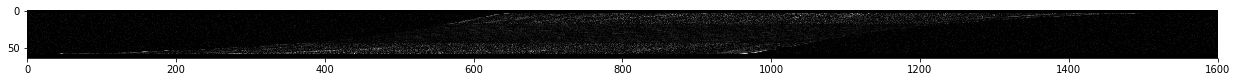

In [47]:
index = random.randint(0, len(valy))
plt.figure(figsize=(64/3,1600/3))
plt.imshow(10*np.abs(valy[index, :, :, 0]-result[index, :, :, 0]).T, cmap='gray')

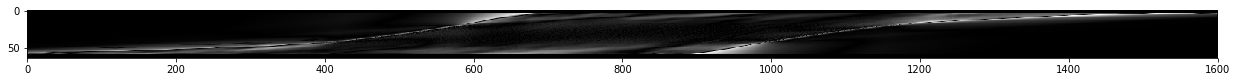

In [211]:
index = random.randint(0, len(trainx))
plt.figure(figsize=(64/3,1600/3))
plt.imshow(10*np.abs(trainx[index, :, :, 0]-result[index, :, :, 0]).T, cmap='gray')

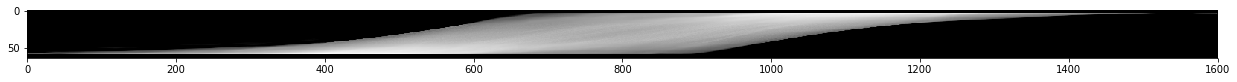

In [212]:
plt.figure(figsize=(64/3,1600/3))
plt.imshow(10*np.abs(result[index, :, :, 0]).T, cmap='gray')
#plt.imshow(10*np.abs(valx[index, :, :, 0]-valy[index, :, :, 0]).T, cmap='gray')

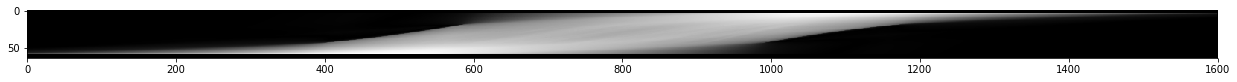

In [213]:
plt.figure(figsize=(64/3,1600/3))
plt.imshow(10*np.abs(trainx[index, :, :, 0]).T, cmap='gray')